In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import catboost as cat

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

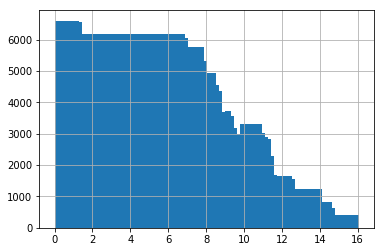

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
rawydf=ydf


In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


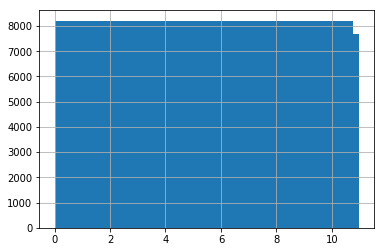

In [26]:
align_q(11).hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [29]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=408
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/408'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

In [34]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    train_pool=cat.Pool(Xtr,ytr,weight=Wtr)
    valid_pool=cat.Pool(Xte,yte)
    model = cat.CatBoostRegressor(iterations = 5000, thread_count = n_thread, **params)
    model.fit(train_pool,eval_set=valid_pool,use_best_model=True)
    make_sub(model,qno)
    a =  model.get_best_score()
    return a['validation_0']['MAE'], model.get_best_iteration()

In [35]:
params = {'objective':"RMSE",
          'max_depth':8, 
          'learning_rate':0.03,
          'border_count':128,
          'l2_leaf_reg':2,
           "colsample_bylevel":0.7,
            'leaf_estimation_method':'Gradient',
          #'min_data_in_leaf' : 1,
          'metric_period' : 100,
          'early_stopping_rounds': 100,
          'eval_metric':'MAE',
            #'fold_len_multiplier':[1.05,1.5,2], 
            #'bagging_temperature':[1,0.75,0.5]
            #,'random_strength':[0.5,1,1.5],
           }

In [36]:
best_mae=1e10

In [37]:
def lgbcv(learning_rate, border_count,l2_leaf_reg,max_depth,
          colsample_bylevel, random_seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['border_count']=int(border_count)
    newparams['max_depth']=int(max_depth)
    #newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [38]:
best={'border_count': 43.48353701986266,
 'colsample_bylevel': 0.7883483108536691,
 'l2_leaf_reg': 0.5928186050324619,
 'learning_rate': 0.005527761648103233,
 'max_depth': 9.37492102038154}

In [39]:
import time


In [40]:
while True:
    if os.path.exists("/mnt/done407"):
        break
    else:
        time.sleep(60) 

In [41]:
def objective(args):
    print args
    return lgbcv(**args)



In [42]:
scores={}
for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        print 'seed',randseed
        best['random_seed']=randseed
        a=lgbcv(**best)
        ascores.append(a)
    scores[targetno]=ascores

seed 10303585
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)


0:	learn: 5.6627976	test: 5.6612956	best: 5.6612956 (0)	total: 146ms	remaining: 12m 10s
100:	learn: 3.4449189	test: 3.3336697	best: 3.3336697 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 2.2790182	test: 2.2352694	best: 2.2352694 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6689160	test: 1.7613252	best: 1.7613252 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3572314	test: 1.5090877	best: 1.5090877 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.1951575	test: 1.3684758	best: 1.3684758 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1080784	test: 1.2939960	best: 1.2939960 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.0567579	test: 1.2544332	best: 1.2544332 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.0217745	test: 1.2352071	best: 1.2352071 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 0.9959133	test: 1.2262069	best: 1.2262069 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.9746579	test: 1.2220590	best: 1.2220590 (1000)	total: 1m 28s	remaining: 5m 53

0:	learn: 5.6624382	test: 5.6663820	best: 5.6663820 (0)	total: 94.5ms	remaining: 7m 52s
100:	learn: 3.4414426	test: 3.5363173	best: 3.5363173 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 2.2812748	test: 2.4267241	best: 2.4267241 (200)	total: 17.9s	remaining: 7m 7s
300:	learn: 1.6787061	test: 1.9002009	best: 1.9002009 (300)	total: 26.7s	remaining: 6m 56s
400:	learn: 1.3665610	test: 1.6471726	best: 1.6471726 (400)	total: 35.6s	remaining: 6m 48s
500:	learn: 1.2018970	test: 1.5154792	best: 1.5154792 (500)	total: 44.4s	remaining: 6m 38s
600:	learn: 1.1122139	test: 1.4425521	best: 1.4425521 (600)	total: 52.9s	remaining: 6m 27s
700:	learn: 1.0586986	test: 1.4015663	best: 1.4015663 (700)	total: 1m 1s	remaining: 6m 20s
800:	learn: 1.0234541	test: 1.3829157	best: 1.3829157 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.9953418	test: 1.3733516	best: 1.3733516 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.9719477	test: 1.3685801	best: 1.3685801 (1000)	total: 1m 27s	remaining: 5m 51s

0:	learn: 5.6628900	test: 5.6551055	best: 5.6551055 (0)	total: 103ms	remaining: 8m 37s
100:	learn: 3.4414294	test: 3.3030054	best: 3.3030054 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.2856052	test: 2.0375313	best: 2.0375313 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6911169	test: 1.3536890	best: 1.3536890 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.3839551	test: 1.0217293	best: 1.0217293 (400)	total: 37.1s	remaining: 7m 6s
500:	learn: 1.2217805	test: 0.8942505	best: 0.8942505 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.1330545	test: 0.8705896	best: 0.8704649 (598)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8704648687
bestIteration = 598

Shrink model to first 599 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q3_at_s10303585.csv
quake  3 (0.8704648686749553, 598)
valid quake 4
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.418391993

0:	learn: 5.6624984	test: 5.6663360	best: 5.6663360 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 3.4366835	test: 3.5630415	best: 3.5630415 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 2.2746355	test: 2.4662717	best: 2.4662717 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.6785860	test: 1.8785043	best: 1.8785043 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3749781	test: 1.5596163	best: 1.5596163 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.2169330	test: 1.3855169	best: 1.3855169 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1315294	test: 1.2929373	best: 1.2929373 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.0803989	test: 1.2436299	best: 1.2436299 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0448571	test: 1.2180530	best: 1.2180530 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0185615	test: 1.2052678	best: 1.2052373 (898)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.9965138	test: 1.1994860	best: 1.1994380 (992)	total: 1m 28s	remaining: 5m 53s


0:	learn: 5.6629294	test: 5.6493610	best: 5.6493610 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 3.4409623	test: 3.0589201	best: 3.0589201 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 2.2828322	test: 1.8020341	best: 1.8020341 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.6846257	test: 1.3202645	best: 1.3202645 (300)	total: 27.9s	remaining: 7m 14s
400:	learn: 1.3751076	test: 1.2385902	best: 1.2385902 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2108390	test: 1.2865075	best: 1.2385902 (400)	total: 46.1s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.238590183
bestIteration = 400

Shrink model to first 401 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q5_at_s10303585.csv
quake  5 (1.238590182907421, 400)
valid quake 6
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.0363

0:	learn: 5.6629871	test: 5.6466749	best: 5.6466749 (0)	total: 92.6ms	remaining: 7m 42s
100:	learn: 3.4405959	test: 3.2541100	best: 3.2541100 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 2.2827989	test: 2.1023687	best: 2.1023687 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6850498	test: 1.5643347	best: 1.5643347 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.3771286	test: 1.4108698	best: 1.4108698 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.2153394	test: 1.3896579	best: 1.3896579 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.1268290	test: 1.3967563	best: 1.3892694 (514)	total: 54.9s	remaining: 6m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.389269361
bestIteration = 514

Shrink model to first 515 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q6_at_s10303585.csv
quake  6 (1.3892693614078704, 514)
valid quake 7
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1

0:	learn: 5.6621780	test: 5.6705080	best: 5.6705080 (0)	total: 99.8ms	remaining: 8m 18s
100:	learn: 3.4428459	test: 3.5769703	best: 3.5769703 (100)	total: 9.11s	remaining: 7m 21s
200:	learn: 2.2858460	test: 2.4669569	best: 2.4669569 (200)	total: 18s	remaining: 7m 9s
300:	learn: 1.6834774	test: 1.9153570	best: 1.9153570 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 1.3673783	test: 1.6660069	best: 1.6660069 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 1.1994897	test: 1.5398269	best: 1.5398269 (500)	total: 44.3s	remaining: 6m 37s
600:	learn: 1.1070838	test: 1.4727353	best: 1.4727353 (600)	total: 52.8s	remaining: 6m 26s
700:	learn: 1.0516311	test: 1.4376904	best: 1.4376904 (700)	total: 1m 1s	remaining: 6m 15s
800:	learn: 1.0145433	test: 1.4193034	best: 1.4193034 (800)	total: 1m 9s	remaining: 6m 5s
900:	learn: 0.9868308	test: 1.4087558	best: 1.4087558 (900)	total: 1m 17s	remaining: 5m 54s
1000:	learn: 0.9632642	test: 1.4028718	best: 1.4028718 (1000)	total: 1m 26s	remaining: 5m 44s
11

0:	learn: 5.6629461	test: 5.6460536	best: 5.6460536 (0)	total: 105ms	remaining: 8m 46s
100:	learn: 3.4391963	test: 2.9498556	best: 2.9498556 (100)	total: 9.79s	remaining: 7m 54s
200:	learn: 2.2815912	test: 1.6903651	best: 1.6903651 (200)	total: 19.1s	remaining: 7m 36s
300:	learn: 1.6830500	test: 1.2608346	best: 1.2608346 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.3732437	test: 1.2134238	best: 1.2103794 (374)	total: 37.4s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.210379414
bestIteration = 374

Shrink model to first 375 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q8_at_s10303585.csv
quake  8 (1.210379414400524, 374)
valid quake 9
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(384759, 450) 

0:	learn: 5.6628747	test: 5.6568970	best: 5.6568970 (0)	total: 103ms	remaining: 8m 34s
100:	learn: 3.4413236	test: 3.3402760	best: 3.3402760 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 2.2853843	test: 2.1092990	best: 2.1092990 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6912223	test: 1.4427455	best: 1.4427455 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.3845218	test: 1.1237182	best: 1.1237182 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2218582	test: 1.0180404	best: 1.0180404 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.1335913	test: 0.9924754	best: 0.9924754 (600)	total: 55s	remaining: 6m 42s
700:	learn: 1.0812067	test: 0.9895867	best: 0.9892803 (695)	total: 1m 3s	remaining: 6m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9892802516
bestIteration = 695

Shrink model to first 696 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q9_at_s10303585.csv
quake  9 (0.9892802516419174, 695)
valid quake 10
align to  11.425

0:	learn: 5.6629077	test: 5.6624140	best: 5.6624140 (0)	total: 102ms	remaining: 8m 30s
100:	learn: 3.4390941	test: 3.4599996	best: 3.4599996 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.2835136	test: 2.3188588	best: 2.3188588 (200)	total: 18.3s	remaining: 7m 15s
300:	learn: 1.6928741	test: 1.7082130	best: 1.7082130 (300)	total: 27.4s	remaining: 7m 6s
400:	learn: 1.3915981	test: 1.3863867	best: 1.3863867 (400)	total: 36.3s	remaining: 6m 55s
500:	learn: 1.2332508	test: 1.2211250	best: 1.2211250 (500)	total: 45.1s	remaining: 6m 45s
600:	learn: 1.1464150	test: 1.1423705	best: 1.1423705 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0936848	test: 1.1043565	best: 1.1043565 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0581670	test: 1.0849084	best: 1.0849084 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.0312722	test: 1.0734928	best: 1.0734928 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.0104948	test: 1.0666257	best: 1.0666257 (1000)	total: 1m 28s	remaining: 5m 52s


0:	learn: 5.6630296	test: 5.6614063	best: 5.6614063 (0)	total: 105ms	remaining: 8m 47s
100:	learn: 3.4403202	test: 3.5008552	best: 3.5008552 (100)	total: 9.38s	remaining: 7m 34s
200:	learn: 2.2844743	test: 2.3594084	best: 2.3594084 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6920499	test: 1.7373856	best: 1.7373856 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3911074	test: 1.3956795	best: 1.3956795 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.2342617	test: 1.2135244	best: 1.2135244 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1482276	test: 1.1238120	best: 1.1238120 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.0950527	test: 1.0808913	best: 1.0808913 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0590088	test: 1.0602702	best: 1.0602702 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0311332	test: 1.0498240	best: 1.0497560 (899)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0084349	test: 1.0446245	best: 1.0446234 (991)	total: 1m 28s	remaining: 5m 55s
1100

0:	learn: 5.6629288	test: 5.6522128	best: 5.6522128 (0)	total: 101ms	remaining: 8m 22s
100:	learn: 3.4401339	test: 3.2203827	best: 3.2203827 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 2.2835959	test: 1.9142555	best: 1.9142555 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6890159	test: 1.2740110	best: 1.2740110 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.3808246	test: 1.0282648	best: 1.0282648 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2177626	test: 0.9714542	best: 0.9713773 (499)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.1299216	test: 0.9766206	best: 0.9695562 (522)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9695561762
bestIteration = 522

Shrink model to first 523 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q12_at_s10303585.csv
quake  12 (0.9695561762444925, 522)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.4183919

0:	learn: 5.6628923	test: 5.6514227	best: 5.6514227 (0)	total: 99.9ms	remaining: 8m 19s
100:	learn: 3.4419445	test: 3.1834952	best: 3.1834952 (100)	total: 9.44s	remaining: 7m 37s
200:	learn: 2.2852166	test: 1.8975207	best: 1.8975207 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6895182	test: 1.2773677	best: 1.2773677 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3790115	test: 1.1470064	best: 1.1470064 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.2153343	test: 1.1461973	best: 1.1416048 (440)	total: 45.6s	remaining: 6m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.141604832
bestIteration = 440

Shrink model to first 441 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q13_at_s10303585.csv
quake  13 (1.1416048322464012, 440)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1

0:	learn: 5.6623564	test: 5.6704569	best: 5.6704569 (0)	total: 94.2ms	remaining: 7m 50s
100:	learn: 3.4353393	test: 3.7250332	best: 3.7250332 (100)	total: 9.1s	remaining: 7m 21s
200:	learn: 2.2743400	test: 2.6951901	best: 2.6951901 (200)	total: 18s	remaining: 7m 10s
300:	learn: 1.6737640	test: 2.1348492	best: 2.1348492 (300)	total: 27s	remaining: 7m 2s
400:	learn: 1.3623786	test: 1.8312690	best: 1.8312690 (400)	total: 35.7s	remaining: 6m 50s
500:	learn: 1.1961225	test: 1.6585437	best: 1.6585437 (500)	total: 44.4s	remaining: 6m 39s
600:	learn: 1.1040917	test: 1.5618103	best: 1.5618103 (600)	total: 53s	remaining: 6m 27s
700:	learn: 1.0490164	test: 1.5082743	best: 1.5082743 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.0117708	test: 1.4780997	best: 1.4780997 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9829900	test: 1.4609416	best: 1.4609416 (900)	total: 1m 18s	remaining: 5m 59s
1000:	learn: 0.9598072	test: 1.4526388	best: 1.4526388 (1000)	total: 1m 27s	remaining: 5m 49s
1100:	

0:	learn: 5.6628714	test: 5.6556435	best: 5.6556435 (0)	total: 102ms	remaining: 8m 30s
100:	learn: 3.4393430	test: 3.2765208	best: 3.2765208 (100)	total: 9.52s	remaining: 7m 41s
200:	learn: 2.2804813	test: 2.1287081	best: 2.1287081 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.6846436	test: 1.5083819	best: 1.5083819 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.3781838	test: 1.2100164	best: 1.2100164 (400)	total: 37.4s	remaining: 7m 9s
500:	learn: 1.2168760	test: 1.1065047	best: 1.1065047 (500)	total: 46.4s	remaining: 6m 56s
600:	learn: 1.1285888	test: 1.0879468	best: 1.0875836 (593)	total: 55.5s	remaining: 6m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.087583584
bestIteration = 593

Shrink model to first 594 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q15_at_s10303585.csv
quake  15 (1.0875835837051648, 593)
mean score 1.1736146396571716
seed 10444548
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1

0:	learn: 5.6627760	test: 5.6612441	best: 5.6612441 (0)	total: 101ms	remaining: 8m 23s
100:	learn: 3.4460831	test: 3.3324338	best: 3.3324338 (100)	total: 9.59s	remaining: 7m 45s
200:	learn: 2.2814182	test: 2.2366418	best: 2.2366418 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6708366	test: 1.7648416	best: 1.7648416 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3577351	test: 1.5130412	best: 1.5130412 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.1954658	test: 1.3730621	best: 1.3730621 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1081664	test: 1.2982912	best: 1.2982912 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.0560119	test: 1.2590027	best: 1.2590027 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0218299	test: 1.2399545	best: 1.2399545 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.9957625	test: 1.2309108	best: 1.2309108 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.9742835	test: 1.2263285	best: 1.2263199 (998)	total: 1m 28s	remaining: 5m 55s
1100

0:	learn: 5.6624349	test: 5.6680050	best: 5.6680050 (0)	total: 102ms	remaining: 8m 31s
100:	learn: 3.4404893	test: 3.5352750	best: 3.5352750 (100)	total: 9.2s	remaining: 7m 26s
200:	learn: 2.2806671	test: 2.4281915	best: 2.4281915 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 1.6775562	test: 1.9006112	best: 1.9006112 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.3657423	test: 1.6467301	best: 1.6467301 (400)	total: 36.2s	remaining: 6m 54s
500:	learn: 1.2008291	test: 1.5150857	best: 1.5150857 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.1110732	test: 1.4428785	best: 1.4428785 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 1.0589088	test: 1.4041613	best: 1.4041613 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.0228446	test: 1.3823400	best: 1.3823400 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.9961861	test: 1.3722959	best: 1.3722959 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.9738289	test: 1.3668792	best: 1.3667268 (995)	total: 1m 27s	remaining: 5m 51s
1100:

0:	learn: 5.6628939	test: 5.6559941	best: 5.6559941 (0)	total: 101ms	remaining: 8m 22s
100:	learn: 3.4404669	test: 3.3050127	best: 3.3050127 (100)	total: 9.63s	remaining: 7m 46s
200:	learn: 2.2849622	test: 2.0345395	best: 2.0345395 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.6908358	test: 1.3504954	best: 1.3504954 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3841415	test: 1.0200480	best: 1.0200480 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2217741	test: 0.8942340	best: 0.8942340 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.1329768	test: 0.8713604	best: 0.8713604 (600)	total: 55.2s	remaining: 6m 44s
700:	learn: 1.0793076	test: 0.8803359	best: 0.8712783 (602)	total: 1m 4s	remaining: 6m 32s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8712782816
bestIteration = 602

Shrink model to first 603 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q3_at_s10444548.csv
quake  3 (0.8712782815522223, 602)
valid quake 4
align to  11.

0:	learn: 5.6624927	test: 5.6659107	best: 5.6659107 (0)	total: 93.5ms	remaining: 7m 47s
100:	learn: 3.4387920	test: 3.5651102	best: 3.5651102 (100)	total: 9.27s	remaining: 7m 29s
200:	learn: 2.2763478	test: 2.4696551	best: 2.4696551 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6783101	test: 1.8792389	best: 1.8792389 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.3745391	test: 1.5593952	best: 1.5593952 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.2165037	test: 1.3843582	best: 1.3843582 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1308354	test: 1.2915771	best: 1.2915771 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0794852	test: 1.2424254	best: 1.2424254 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0441183	test: 1.2178385	best: 1.2178385 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0165622	test: 1.2032575	best: 1.2032575 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 0.9945503	test: 1.1954002	best: 1.1953692 (999)	total: 1m 28s	remaining: 5m 53s


0:	learn: 5.6629203	test: 5.6493854	best: 5.6493854 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 3.4382037	test: 3.0522521	best: 3.0522521 (100)	total: 9.42s	remaining: 7m 36s
200:	learn: 2.2824575	test: 1.7995243	best: 1.7995243 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.6842306	test: 1.3180376	best: 1.3180376 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.3749799	test: 1.2421949	best: 1.2413445 (388)	total: 37s	remaining: 7m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.241344495
bestIteration = 388

Shrink model to first 389 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q5_at_s10444548.csv
quake  5 (1.241344494722345, 388)
valid quake 6
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(391376, 450) (391

0:	learn: 5.6629864	test: 5.6473259	best: 5.6473259 (0)	total: 95.3ms	remaining: 7m 56s
100:	learn: 3.4421693	test: 3.2604985	best: 3.2604985 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 2.2840522	test: 2.1048274	best: 2.1048274 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6857871	test: 1.5679784	best: 1.5679784 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3773880	test: 1.4150938	best: 1.4150938 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2156582	test: 1.3927210	best: 1.3926466 (497)	total: 46.1s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.392646606
bestIteration = 497

Shrink model to first 498 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q6_at_s10444548.csv
quake  6 (1.3926466061932872, 497)
valid quake 7
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03

0:	learn: 5.6621756	test: 5.6702773	best: 5.6702773 (0)	total: 102ms	remaining: 8m 30s
100:	learn: 3.4417587	test: 3.5786698	best: 3.5786698 (100)	total: 9.21s	remaining: 7m 26s
200:	learn: 2.2836045	test: 2.4677257	best: 2.4677257 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.6812529	test: 1.9146457	best: 1.9146457 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.3651796	test: 1.6668085	best: 1.6668085 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.1980430	test: 1.5413034	best: 1.5413034 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1054086	test: 1.4749774	best: 1.4749774 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.0499407	test: 1.4385757	best: 1.4385757 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0124619	test: 1.4213992	best: 1.4213992 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 0.9845046	test: 1.4103757	best: 1.4103757 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 0.9617220	test: 1.4039766	best: 1.4039766 (1000)	total: 1m 28s	remaining: 5m 53s
11

0:	learn: 5.6629684	test: 5.6461182	best: 5.6461182 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.4411625	test: 2.9568868	best: 2.9568868 (100)	total: 9.77s	remaining: 7m 54s
200:	learn: 2.2829127	test: 1.6924327	best: 1.6924327 (200)	total: 19.2s	remaining: 7m 37s
300:	learn: 1.6831475	test: 1.2617131	best: 1.2617131 (300)	total: 28.3s	remaining: 7m 22s
400:	learn: 1.3723750	test: 1.2149644	best: 1.2111219 (373)	total: 37.5s	remaining: 7m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.211121853
bestIteration = 373

Shrink model to first 374 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q8_at_s10444548.csv
quake  8 (1.2111218527899918, 373)
valid quake 9
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(384759, 450

0:	learn: 5.6628787	test: 5.6570027	best: 5.6570027 (0)	total: 102ms	remaining: 8m 32s
100:	learn: 3.4429161	test: 3.3398620	best: 3.3398620 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 2.2864812	test: 2.1084092	best: 2.1084092 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6918147	test: 1.4400702	best: 1.4400702 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3856228	test: 1.1209286	best: 1.1209286 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 1.2229390	test: 1.0159483	best: 1.0159483 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.1340715	test: 0.9902866	best: 0.9902866 (600)	total: 54.8s	remaining: 6m 41s
700:	learn: 1.0818457	test: 0.9864389	best: 0.9858396 (680)	total: 1m 3s	remaining: 6m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9858395896
bestIteration = 680

Shrink model to first 681 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q9_at_s10444548.csv
quake  9 (0.9858395896311322, 680)
valid quake 10
align to  11

0:	learn: 5.6628990	test: 5.6620609	best: 5.6620609 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.4389151	test: 3.4582299	best: 3.4582299 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 2.2833248	test: 2.3177999	best: 2.3177999 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.6930190	test: 1.7080138	best: 1.7080138 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3917137	test: 1.3849066	best: 1.3849066 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.2338058	test: 1.2202690	best: 1.2202690 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1462476	test: 1.1397906	best: 1.1397906 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.0935438	test: 1.1022447	best: 1.1022447 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0579405	test: 1.0830393	best: 1.0830393 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0308876	test: 1.0723144	best: 1.0723144 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0091710	test: 1.0667544	best: 1.0667544 (1000)	total: 1m 28s	remaining: 5m 53s
110

0:	learn: 5.6630270	test: 5.6620159	best: 5.6620159 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 3.4412401	test: 3.5025189	best: 3.5025189 (100)	total: 9.56s	remaining: 7m 43s
200:	learn: 2.2848985	test: 2.3607063	best: 2.3607063 (200)	total: 18.6s	remaining: 7m 25s
300:	learn: 1.6927952	test: 1.7381147	best: 1.7381147 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3915878	test: 1.3950013	best: 1.3950013 (400)	total: 36.5s	remaining: 6m 59s
500:	learn: 1.2338720	test: 1.2118236	best: 1.2118236 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.1482421	test: 1.1224853	best: 1.1224853 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.0950657	test: 1.0793849	best: 1.0793849 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0593250	test: 1.0574295	best: 1.0574295 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0320346	test: 1.0463629	best: 1.0463629 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0077391	test: 1.0410257	best: 1.0409975 (997)	total: 1m 28s	remaining: 5m 55s

0:	learn: 5.6629261	test: 5.6523126	best: 5.6523126 (0)	total: 99.5ms	remaining: 8m 17s
100:	learn: 3.4407955	test: 3.2138829	best: 3.2138829 (100)	total: 9.65s	remaining: 7m 47s
200:	learn: 2.2858673	test: 1.9117180	best: 1.9117180 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.6891373	test: 1.2715202	best: 1.2715202 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.3807485	test: 1.0267559	best: 1.0267559 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2180917	test: 0.9702858	best: 0.9702858 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.1294385	test: 0.9774355	best: 0.9686926 (530)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9686926384
bestIteration = 530

Shrink model to first 531 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q12_at_s10444548.csv
quake  12 (0.9686926383527412, 530)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.4183919

0:	learn: 5.6629251	test: 5.6523645	best: 5.6523645 (0)	total: 98.2ms	remaining: 8m 10s
100:	learn: 3.4421206	test: 3.1777114	best: 3.1777114 (100)	total: 9.4s	remaining: 7m 36s
200:	learn: 2.2857454	test: 1.8935904	best: 1.8935904 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6894032	test: 1.2745358	best: 1.2745358 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3794328	test: 1.1463206	best: 1.1463206 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.2158723	test: 1.1438230	best: 1.1403018 (448)	total: 45.8s	remaining: 6m 50s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.140301785
bestIteration = 448

Shrink model to first 449 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q13_at_s10444548.csv
quake  13 (1.1403017849385142, 448)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.

0:	learn: 5.6623737	test: 5.6704067	best: 5.6704067 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.4366306	test: 3.7214951	best: 3.7214951 (100)	total: 9.19s	remaining: 7m 25s
200:	learn: 2.2735310	test: 2.6917831	best: 2.6917831 (200)	total: 18.1s	remaining: 7m 13s
300:	learn: 1.6742432	test: 2.1339183	best: 2.1339183 (300)	total: 26.9s	remaining: 6m 59s
400:	learn: 1.3635316	test: 1.8289138	best: 1.8289138 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 1.1979431	test: 1.6586564	best: 1.6586564 (500)	total: 44.4s	remaining: 6m 38s
600:	learn: 1.1068502	test: 1.5624617	best: 1.5624617 (600)	total: 53.1s	remaining: 6m 28s
700:	learn: 1.0527088	test: 1.5090156	best: 1.5090156 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.0152588	test: 1.4792695	best: 1.4792695 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9864427	test: 1.4629396	best: 1.4629396 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9632409	test: 1.4546686	best: 1.4546686 (1000)	total: 1m 27s	remaining: 5m 49s

0:	learn: 5.6628805	test: 5.6543489	best: 5.6543489 (0)	total: 98.7ms	remaining: 8m 13s
100:	learn: 3.4392113	test: 3.2867941	best: 3.2867941 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 2.2798032	test: 2.1488337	best: 2.1488337 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6836883	test: 1.5278942	best: 1.5278942 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3771868	test: 1.2262939	best: 1.2262939 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2157910	test: 1.1161587	best: 1.1161587 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.1275919	test: 1.0965758	best: 1.0963577 (598)	total: 54.7s	remaining: 6m 40s
700:	learn: 1.0751498	test: 1.1127598	best: 1.0962823 (607)	total: 1m 3s	remaining: 6m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.096282269
bestIteration = 607

Shrink model to first 608 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/0/sub408_q15_at_s10444548.csv
quake  15 (1.0962822687904972, 607)
mean score 1.1733132477262

0:	learn: 6.2651944	test: 6.2632974	best: 6.2632974 (0)	total: 97.7ms	remaining: 8m 8s
100:	learn: 3.8119636	test: 3.6873954	best: 3.6873954 (100)	total: 9.34s	remaining: 7m 33s
200:	learn: 2.5230469	test: 2.4726651	best: 2.4726651 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8476657	test: 1.9478857	best: 1.9478857 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.5027015	test: 1.6687649	best: 1.6687649 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.3221684	test: 1.5164626	best: 1.5164626 (500)	total: 45.8s	remaining: 6m 50s
600:	learn: 1.2257250	test: 1.4337126	best: 1.4337126 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.1686049	test: 1.3906369	best: 1.3906369 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.1305904	test: 1.3705115	best: 1.3705115 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.1021048	test: 1.3611313	best: 1.3611313 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.0773162	test: 1.3561313	best: 1.3561313 (1000)	total: 1m 29s	remaining: 5m 55s
110

0:	learn: 6.2648211	test: 6.2704060	best: 6.2704060 (0)	total: 97.9ms	remaining: 8m 9s
100:	learn: 3.8073759	test: 3.9129851	best: 3.9129851 (100)	total: 9.19s	remaining: 7m 25s
200:	learn: 2.5232606	test: 2.6872354	best: 2.6872354 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.8565501	test: 2.1062794	best: 2.1062794 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.5111451	test: 1.8249209	best: 1.8249209 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 1.3290309	test: 1.6769215	best: 1.6769215 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.2299714	test: 1.5991289	best: 1.5991289 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.1711509	test: 1.5568945	best: 1.5568945 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.1313159	test: 1.5337622	best: 1.5337622 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.1011310	test: 1.5232342	best: 1.5232275 (899)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 1.0757698	test: 1.5177757	best: 1.5177638 (999)	total: 1m 27s	remaining: 5m 50s


0:	learn: 6.2653284	test: 6.2574411	best: 6.2574411 (0)	total: 98.8ms	remaining: 8m 13s
100:	learn: 3.8087094	test: 3.6593252	best: 3.6593252 (100)	total: 9.61s	remaining: 7m 46s
200:	learn: 2.5303460	test: 2.2549414	best: 2.2549414 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.8709433	test: 1.4984885	best: 1.4984885 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.5312870	test: 1.1297110	best: 1.1297110 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.3505238	test: 0.9884798	best: 0.9884798 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.2523171	test: 0.9616540	best: 0.9616540 (600)	total: 55.1s	remaining: 6m 43s
700:	learn: 1.1939058	test: 0.9724524	best: 0.9613151 (605)	total: 1m 3s	remaining: 6m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9613151376
bestIteration = 605

Shrink model to first 606 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q3_at_s10617274.csv
quake  3 (0.9613151375520458, 605)
valid quake 4
align to  12.6

0:	learn: 6.2648593	test: 6.2688310	best: 6.2688310 (0)	total: 94ms	remaining: 7m 49s
100:	learn: 3.8015838	test: 3.9437505	best: 3.9437505 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 2.5154864	test: 2.7268151	best: 2.7268151 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.8560927	test: 2.0777326	best: 2.0777326 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.5196024	test: 1.7217030	best: 1.7217030 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.3455159	test: 1.5298776	best: 1.5298776 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.2504156	test: 1.4277388	best: 1.4277388 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.1939616	test: 1.3751075	best: 1.3751075 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.1556647	test: 1.3472921	best: 1.3472921 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.1255810	test: 1.3315168	best: 1.3315168 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.1007900	test: 1.3233652	best: 1.3233652 (1000)	total: 1m 28s	remaining: 5m 54s
11

0:	learn: 6.2653738	test: 6.2500458	best: 6.2500458 (0)	total: 103ms	remaining: 8m 32s
100:	learn: 3.8043117	test: 3.3780503	best: 3.3780503 (100)	total: 9.6s	remaining: 7m 45s
200:	learn: 2.5245680	test: 1.9907505	best: 1.9907505 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.8634699	test: 1.4540907	best: 1.4540907 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.5199754	test: 1.3683467	best: 1.3671408 (388)	total: 37s	remaining: 7m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.367140758
bestIteration = 388

Shrink model to first 389 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q5_at_s10617274.csv
quake  5 (1.3671407583050283, 388)
valid quake 6
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(391376, 450) (39137

0:	learn: 6.2654234	test: 6.2477788	best: 6.2477788 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.8061639	test: 3.6108104	best: 3.6108104 (100)	total: 9.42s	remaining: 7m 36s
200:	learn: 2.5257929	test: 2.3302496	best: 2.3302496 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.8650579	test: 1.7324063	best: 1.7324063 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5236890	test: 1.5601013	best: 1.5601013 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.3435185	test: 1.5381481	best: 1.5377647 (495)	total: 46.2s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.537764685
bestIteration = 495

Shrink model to first 496 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q6_at_s10617274.csv
quake  6 (1.5377646850365256, 495)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.146

0:	learn: 6.2645326	test: 6.2742056	best: 6.2742056 (0)	total: 94.2ms	remaining: 7m 50s
100:	learn: 3.8092503	test: 3.9597149	best: 3.9597149 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 2.5284636	test: 2.7277953	best: 2.7277953 (200)	total: 18.3s	remaining: 7m 15s
300:	learn: 1.8621591	test: 2.1162016	best: 2.1162016 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.5126055	test: 1.8417947	best: 1.8417947 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.3268264	test: 1.7039632	best: 1.7039632 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.2249262	test: 1.6284808	best: 1.6284808 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.1627970	test: 1.5896600	best: 1.5896600 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.1218497	test: 1.5689250	best: 1.5689250 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.0910863	test: 1.5582243	best: 1.5582243 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 1.0661995	test: 1.5523276	best: 1.5523276 (1000)	total: 1m 27s	remaining: 5m 49s
11

0:	learn: 6.2653907	test: 6.2466730	best: 6.2466730 (0)	total: 103ms	remaining: 8m 35s
100:	learn: 3.8057031	test: 3.2625976	best: 3.2625976 (100)	total: 9.53s	remaining: 7m 42s
200:	learn: 2.5244816	test: 1.8677349	best: 1.8677349 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.8622135	test: 1.3989453	best: 1.3989453 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5181202	test: 1.3493824	best: 1.3440955 (374)	total: 37.3s	remaining: 7m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.344095522
bestIteration = 374

Shrink model to first 375 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q8_at_s10617274.csv
quake  8 (1.344095522092689, 374)
valid quake 9
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (3

0:	learn: 6.2653139	test: 6.2585608	best: 6.2585608 (0)	total: 104ms	remaining: 8m 37s
100:	learn: 3.8083387	test: 3.6940947	best: 3.6940947 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 2.5308291	test: 2.3314636	best: 2.3314636 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8734694	test: 1.5936293	best: 1.5936293 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.5333529	test: 1.2401762	best: 1.2401762 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.3535322	test: 1.1263839	best: 1.1263839 (500)	total: 45.8s	remaining: 6m 50s
600:	learn: 1.2548640	test: 1.0997283	best: 1.0997283 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.1961613	test: 1.0960134	best: 1.0955784 (671)	total: 1m 3s	remaining: 6m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.095578431
bestIteration = 671

Shrink model to first 672 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q9_at_s10617274.csv
quake  9 (1.095578431279241, 671)
valid quake 10
align to  12.6

0:	learn: 6.2653369	test: 6.2647336	best: 6.2647336 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.8055718	test: 3.8316931	best: 3.8316931 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.5252788	test: 2.5671924	best: 2.5671924 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8719671	test: 1.8946758	best: 1.8946758 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.5391563	test: 1.5381053	best: 1.5381053 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.3642133	test: 1.3536257	best: 1.3536257 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.2676666	test: 1.2656567	best: 1.2656567 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.2095011	test: 1.2243392	best: 1.2243392 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.1709678	test: 1.2028403	best: 1.2028403 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.1411548	test: 1.1895526	best: 1.1895526 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.1169526	test: 1.1826003	best: 1.1824297 (999)	total: 1m 28s	remaining: 5m 55s
1100

0:	learn: 6.2654866	test: 6.2637370	best: 6.2637370 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 3.8038007	test: 3.8715654	best: 3.8715654 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 2.5265888	test: 2.6078639	best: 2.6078639 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 1.8716962	test: 1.9205663	best: 1.9205663 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.5395696	test: 1.5406449	best: 1.5406449 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.3646468	test: 1.3396109	best: 1.3396109 (500)	total: 45.4s	remaining: 6m 48s
600:	learn: 1.2690859	test: 1.2388967	best: 1.2388967 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.2107326	test: 1.1904327	best: 1.1904327 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.1710740	test: 1.1679996	best: 1.1679996 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.1408239	test: 1.1564842	best: 1.1564842 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.1148182	test: 1.1514701	best: 1.1513977 (999)	total: 1m 28s	remaining: 5m 55s


0:	learn: 6.2653484	test: 6.2539230	best: 6.2539230 (0)	total: 102ms	remaining: 8m 30s
100:	learn: 3.8077572	test: 3.5629244	best: 3.5629244 (100)	total: 9.34s	remaining: 7m 32s
200:	learn: 2.5290935	test: 2.1240552	best: 2.1240552 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 1.8706665	test: 1.4148109	best: 1.4148109 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.5296247	test: 1.1418251	best: 1.1418251 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.3493157	test: 1.0795465	best: 1.0795465 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.2501271	test: 1.0866535	best: 1.0780780 (521)	total: 54.5s	remaining: 6m 39s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.078078007
bestIteration = 521

Shrink model to first 522 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q12_at_s10617274.csv
quake  12 (1.0780780068896363, 521)
valid quake 13
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879

0:	learn: 6.2653554	test: 6.2536377	best: 6.2536377 (0)	total: 95.2ms	remaining: 7m 56s
100:	learn: 3.8071407	test: 3.5202329	best: 3.5202329 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.5283877	test: 2.0993255	best: 2.0993255 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.8683897	test: 1.4144407	best: 1.4144407 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.5249713	test: 1.2706963	best: 1.2706963 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.3440808	test: 1.2671656	best: 1.2638955 (456)	total: 45.9s	remaining: 6m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.263895479
bestIteration = 456

Shrink model to first 457 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q13_at_s10617274.csv
quake  13 (1.2638954787314076, 456)
valid quake 14
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1

0:	learn: 6.2647508	test: 6.2737230	best: 6.2737230 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.8037829	test: 4.1192090	best: 4.1192090 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 2.5190749	test: 2.9779534	best: 2.9779534 (200)	total: 17.8s	remaining: 7m 5s
300:	learn: 1.8540972	test: 2.3582549	best: 2.3582549 (300)	total: 26.7s	remaining: 6m 57s
400:	learn: 1.5083940	test: 2.0197879	best: 2.0197879 (400)	total: 35.4s	remaining: 6m 45s
500:	learn: 1.3252305	test: 1.8330258	best: 1.8330258 (500)	total: 44s	remaining: 6m 35s
600:	learn: 1.2244971	test: 1.7266387	best: 1.7266387 (600)	total: 52.6s	remaining: 6m 25s
700:	learn: 1.1631110	test: 1.6681554	best: 1.6681554 (700)	total: 1m 1s	remaining: 6m 16s
800:	learn: 1.1217705	test: 1.6350110	best: 1.6350110 (800)	total: 1m 9s	remaining: 6m 6s
900:	learn: 1.0906004	test: 1.6175808	best: 1.6175808 (900)	total: 1m 18s	remaining: 5m 55s
1000:	learn: 1.0650877	test: 1.6082361	best: 1.6082361 (1000)	total: 1m 26s	remaining: 5m 45s
110

0:	learn: 6.2652988	test: 6.2552258	best: 6.2552258 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 3.8066921	test: 3.6262021	best: 3.6262021 (100)	total: 9.42s	remaining: 7m 36s
200:	learn: 2.5239487	test: 2.3640787	best: 2.3640787 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8645539	test: 1.6830539	best: 1.6830539 (300)	total: 28.1s	remaining: 7m 17s
400:	learn: 1.5254201	test: 1.3499162	best: 1.3499162 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.3458000	test: 1.2291805	best: 1.2291805 (500)	total: 46s	remaining: 6m 52s
600:	learn: 1.2483646	test: 1.2094237	best: 1.2079436 (587)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.207943602
bestIteration = 587

Shrink model to first 588 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q15_at_s10617274.csv
quake  15 (1.207943601797352, 587)
mean score 1.2991058670750755
seed 7396603
valid quake 1
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.4273

0:	learn: 6.2651988	test: 6.2633619	best: 6.2633619 (0)	total: 97.6ms	remaining: 8m 7s
100:	learn: 3.8117403	test: 3.6936817	best: 3.6936817 (100)	total: 9.73s	remaining: 7m 51s
200:	learn: 2.5227778	test: 2.4758214	best: 2.4758214 (200)	total: 19.4s	remaining: 7m 44s
300:	learn: 1.8468382	test: 1.9520876	best: 1.9520876 (300)	total: 28.4s	remaining: 7m 23s
400:	learn: 1.5015912	test: 1.6741024	best: 1.6741024 (400)	total: 37.4s	remaining: 7m 8s
500:	learn: 1.3217784	test: 1.5200412	best: 1.5200412 (500)	total: 46.3s	remaining: 6m 56s
600:	learn: 1.2251723	test: 1.4365730	best: 1.4365730 (600)	total: 55.1s	remaining: 6m 43s
700:	learn: 1.1676715	test: 1.3921807	best: 1.3921807 (700)	total: 1m 3s	remaining: 6m 31s
800:	learn: 1.1298440	test: 1.3698945	best: 1.3698945 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.1013819	test: 1.3605382	best: 1.3605382 (900)	total: 1m 21s	remaining: 6m 8s
1000:	learn: 1.0777720	test: 1.3563764	best: 1.3563520 (995)	total: 1m 29s	remaining: 5m 57s
1

0:	learn: 6.2647922	test: 6.2700300	best: 6.2700300 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 3.8070760	test: 3.9118298	best: 3.9118298 (100)	total: 9.21s	remaining: 7m 26s
200:	learn: 2.5236497	test: 2.6872638	best: 2.6872638 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.8569598	test: 2.1033950	best: 2.1033950 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 1.5120708	test: 1.8215226	best: 1.8215226 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 1.3292586	test: 1.6752765	best: 1.6752765 (500)	total: 45s	remaining: 6m 43s
600:	learn: 1.2300503	test: 1.5961861	best: 1.5961861 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 1.1699375	test: 1.5542311	best: 1.5542311 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.1301246	test: 1.5314808	best: 1.5314808 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.0999791	test: 1.5213574	best: 1.5213574 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.0747467	test: 1.5151989	best: 1.5151259 (999)	total: 1m 27s	remaining: 5m 51s
110

0:	learn: 6.2653265	test: 6.2566681	best: 6.2566681 (0)	total: 106ms	remaining: 8m 50s
100:	learn: 3.8073627	test: 3.6535867	best: 3.6535867 (100)	total: 9.71s	remaining: 7m 50s
200:	learn: 2.5305113	test: 2.2539551	best: 2.2539551 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.8721265	test: 1.4947020	best: 1.4947020 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.5320378	test: 1.1255622	best: 1.1255622 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.3520894	test: 0.9856225	best: 0.9856225 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.2536657	test: 0.9612605	best: 0.9610028 (586)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9610027682
bestIteration = 586

Shrink model to first 587 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q3_at_s7396603.csv
quake  3 (0.9610027682184755, 586)
valid quake 4
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1

0:	learn: 6.2648879	test: 6.2686072	best: 6.2686072 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 3.8028180	test: 3.9412268	best: 3.9412268 (100)	total: 9.33s	remaining: 7m 32s
200:	learn: 2.5167322	test: 2.7293086	best: 2.7293086 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.8577479	test: 2.0785662	best: 2.0785662 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.5216624	test: 1.7235720	best: 1.7235720 (400)	total: 36.3s	remaining: 6m 55s
500:	learn: 1.3477591	test: 1.5309333	best: 1.5309333 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.2525116	test: 1.4292924	best: 1.4292924 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 1.1954190	test: 1.3743797	best: 1.3743797 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.1573920	test: 1.3467596	best: 1.3467596 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.1265896	test: 1.3309921	best: 1.3309887 (899)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.1015471	test: 1.3229104	best: 1.3229104 (1000)	total: 1m 27s	remaining: 5m 50s

0:	learn: 6.2653676	test: 6.2502420	best: 6.2502420 (0)	total: 102ms	remaining: 8m 32s
100:	learn: 3.8057246	test: 3.3795885	best: 3.3795885 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 2.5245597	test: 1.9906619	best: 1.9906619 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.8647813	test: 1.4593151	best: 1.4593151 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5214166	test: 1.3724442	best: 1.3716057 (393)	total: 37.1s	remaining: 7m 5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.371605659
bestIteration = 393

Shrink model to first 394 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q5_at_s7396603.csv
quake  5 (1.3716056587515846, 393)
valid quake 6
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(391376, 450) (3

0:	learn: 6.2653969	test: 6.2466651	best: 6.2466651 (0)	total: 98.1ms	remaining: 8m 10s
100:	learn: 3.8083430	test: 3.6068461	best: 3.6068461 (100)	total: 9.44s	remaining: 7m 38s
200:	learn: 2.5264524	test: 2.3266895	best: 2.3266895 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.8653320	test: 1.7248338	best: 1.7248338 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.5238875	test: 1.5539717	best: 1.5539717 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.3441777	test: 1.5299696	best: 1.5298927 (499)	total: 46.1s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.529892733
bestIteration = 499

Shrink model to first 500 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q6_at_s7396603.csv
quake  6 (1.5298927330415393, 499)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.146

0:	learn: 6.2645345	test: 6.2736532	best: 6.2736532 (0)	total: 101ms	remaining: 8m 22s
100:	learn: 3.8095218	test: 3.9542362	best: 3.9542362 (100)	total: 8.94s	remaining: 7m 13s
200:	learn: 2.5284354	test: 2.7229312	best: 2.7229312 (200)	total: 17.9s	remaining: 7m 7s
300:	learn: 1.8630212	test: 2.1131035	best: 2.1131035 (300)	total: 27s	remaining: 7m 1s
400:	learn: 1.5143278	test: 1.8390035	best: 1.8390035 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.3279352	test: 1.7014723	best: 1.7014723 (500)	total: 44.4s	remaining: 6m 38s
600:	learn: 1.2254281	test: 1.6266205	best: 1.6266205 (600)	total: 53s	remaining: 6m 27s
700:	learn: 1.1632229	test: 1.5868174	best: 1.5868174 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.1222934	test: 1.5671971	best: 1.5671971 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 1.0915486	test: 1.5558866	best: 1.5558866 (900)	total: 1m 18s	remaining: 5m 57s
1000:	learn: 1.0655822	test: 1.5495280	best: 1.5495280 (1000)	total: 1m 26s	remaining: 5m 47s
1100:

0:	learn: 6.2653998	test: 6.2465760	best: 6.2465760 (0)	total: 102ms	remaining: 8m 31s
100:	learn: 3.8047860	test: 3.2658036	best: 3.2658036 (100)	total: 9.52s	remaining: 7m 41s
200:	learn: 2.5243961	test: 1.8675207	best: 1.8675207 (200)	total: 19.1s	remaining: 7m 35s
300:	learn: 1.8627677	test: 1.3937022	best: 1.3937022 (300)	total: 28.3s	remaining: 7m 22s
400:	learn: 1.5197253	test: 1.3390089	best: 1.3361232 (381)	total: 37.4s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.336123205
bestIteration = 381

Shrink model to first 382 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q8_at_s7396603.csv
quake  8 (1.336123205411106, 381)
valid quake 9
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (38

0:	learn: 6.2652883	test: 6.2588035	best: 6.2588035 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 3.8083556	test: 3.6981380	best: 3.6981380 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 2.5287631	test: 2.3311432	best: 2.3311432 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.8716228	test: 1.5910369	best: 1.5910369 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.5326542	test: 1.2376137	best: 1.2376137 (400)	total: 37.3s	remaining: 7m 8s
500:	learn: 1.3529744	test: 1.1236315	best: 1.1236315 (500)	total: 46.2s	remaining: 6m 55s
600:	learn: 1.2544473	test: 1.0980452	best: 1.0980452 (600)	total: 55.3s	remaining: 6m 45s
700:	learn: 1.1953885	test: 1.0929025	best: 1.0927688 (698)	total: 1m 4s	remaining: 6m 33s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.092768823
bestIteration = 698

Shrink model to first 699 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q9_at_s7396603.csv
quake  9 (1.0927688231247545, 698)
valid quake 10
align to  12.640

0:	learn: 6.2653298	test: 6.2642394	best: 6.2642394 (0)	total: 97.9ms	remaining: 8m 9s
100:	learn: 3.8044446	test: 3.8305205	best: 3.8305205 (100)	total: 9.33s	remaining: 7m 32s
200:	learn: 2.5250232	test: 2.5669879	best: 2.5669879 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 1.8721313	test: 1.8896905	best: 1.8896905 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.5389096	test: 1.5315658	best: 1.5315658 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.3642327	test: 1.3466734	best: 1.3466734 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.2681317	test: 1.2579546	best: 1.2579546 (600)	total: 54.2s	remaining: 6m 37s
700:	learn: 1.2097132	test: 1.2159810	best: 1.2159810 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.1703966	test: 1.1959701	best: 1.1959701 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.1403807	test: 1.1842047	best: 1.1842047 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.1159897	test: 1.1769672	best: 1.1769165 (997)	total: 1m 28s	remaining: 5m 54s
1

0:	learn: 6.2654711	test: 6.2641484	best: 6.2641484 (0)	total: 104ms	remaining: 8m 40s
100:	learn: 3.8029417	test: 3.8736177	best: 3.8736177 (100)	total: 9.33s	remaining: 7m 32s
200:	learn: 2.5255297	test: 2.6074082	best: 2.6074082 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.8716473	test: 1.9202987	best: 1.9202987 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.5388611	test: 1.5403945	best: 1.5403945 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.3651644	test: 1.3403730	best: 1.3403730 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.2697580	test: 1.2406536	best: 1.2406536 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.2116684	test: 1.1929607	best: 1.1929607 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.1710715	test: 1.1697920	best: 1.1697920 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.1415097	test: 1.1580976	best: 1.1580976 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1161355	test: 1.1531088	best: 1.1531088 (1000)	total: 1m 29s	remaining: 5m 56s
110

0:	learn: 6.2653513	test: 6.2536501	best: 6.2536501 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 3.8056814	test: 3.5594838	best: 3.5594838 (100)	total: 9.54s	remaining: 7m 42s
200:	learn: 2.5282403	test: 2.1185038	best: 2.1185038 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.8709115	test: 1.4102151	best: 1.4102151 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5293507	test: 1.1412743	best: 1.1412743 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.3492835	test: 1.0787475	best: 1.0787475 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.2504140	test: 1.0857256	best: 1.0767427 (524)	total: 54.9s	remaining: 6m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.076742742
bestIteration = 524

Shrink model to first 525 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q12_at_s7396603.csv
quake  12 (1.0767427419981939, 524)
valid quake 13
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879

0:	learn: 6.2653592	test: 6.2532321	best: 6.2532321 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 3.8080783	test: 3.5210184	best: 3.5210184 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 2.5299327	test: 2.1002136	best: 2.1002136 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 1.8701657	test: 1.4143076	best: 1.4143076 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5265910	test: 1.2724614	best: 1.2724614 (400)	total: 37.1s	remaining: 7m 6s
500:	learn: 1.3452577	test: 1.2693399	best: 1.2657892 (440)	total: 46.1s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.265789166
bestIteration = 440

Shrink model to first 441 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q13_at_s7396603.csv
quake  13 (1.2657891659312446, 440)
valid quake 14
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1

0:	learn: 6.2647438	test: 6.2734073	best: 6.2734073 (0)	total: 93.6ms	remaining: 7m 47s
100:	learn: 3.8000323	test: 4.1220985	best: 4.1220985 (100)	total: 9.1s	remaining: 7m 21s
200:	learn: 2.5168155	test: 2.9849845	best: 2.9849845 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 1.8519312	test: 2.3636430	best: 2.3636430 (300)	total: 27s	remaining: 7m 2s
400:	learn: 1.5075815	test: 2.0234546	best: 2.0234546 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.3242516	test: 1.8355582	best: 1.8355582 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.2236697	test: 1.7281711	best: 1.7281711 (600)	total: 53.3s	remaining: 6m 30s
700:	learn: 1.1626106	test: 1.6676140	best: 1.6676140 (700)	total: 1m 1s	remaining: 6m 20s
800:	learn: 1.1204694	test: 1.6341294	best: 1.6341294 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.0901100	test: 1.6159512	best: 1.6159512 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 1.0642560	test: 1.6072005	best: 1.6072005 (1000)	total: 1m 27s	remaining: 5m 50s
1

0:	learn: 6.2653135	test: 6.2564056	best: 6.2564056 (0)	total: 97.4ms	remaining: 8m 7s
100:	learn: 3.8057126	test: 3.6313303	best: 3.6313303 (100)	total: 9.65s	remaining: 7m 48s
200:	learn: 2.5243960	test: 2.3718479	best: 2.3718479 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.8643424	test: 1.6840029	best: 1.6840029 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.5246238	test: 1.3493772	best: 1.3493772 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.3455516	test: 1.2298461	best: 1.2298461 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.2482024	test: 1.2054227	best: 1.2048759 (571)	total: 54.8s	remaining: 6m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.204875871
bestIteration = 571

Shrink model to first 572 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/1/sub408_q15_at_s7396603.csv
quake  15 (1.2048758708439737, 571)
mean score 1.2971521288720038
seed 7909850
valid quake 1
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31

0:	learn: 5.7832741	test: 5.7816443	best: 5.7816443 (0)	total: 99.6ms	remaining: 8m 18s
100:	learn: 3.5173006	test: 3.4015858	best: 3.4015858 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.3277545	test: 2.2812822	best: 2.2812822 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.7040560	test: 1.7975285	best: 1.7975285 (300)	total: 28.5s	remaining: 7m 24s
400:	learn: 1.3852211	test: 1.5392878	best: 1.5392878 (400)	total: 37.7s	remaining: 7m 12s
500:	learn: 1.2196456	test: 1.3965179	best: 1.3965179 (500)	total: 46.6s	remaining: 6m 58s
600:	learn: 1.1301123	test: 1.3212975	best: 1.3212975 (600)	total: 55.4s	remaining: 6m 45s
700:	learn: 1.0779070	test: 1.2829604	best: 1.2829604 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.0426788	test: 1.2634182	best: 1.2634182 (800)	total: 1m 12s	remaining: 6m 22s
900:	learn: 1.0154698	test: 1.2539286	best: 1.2539286 (900)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 0.9927865	test: 1.2504750	best: 1.2504750 (1000)	total: 1m 30s	remaining: 6m
1

0:	learn: 5.7829252	test: 5.7885236	best: 5.7885236 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 3.5147530	test: 3.6115320	best: 3.6115320 (100)	total: 9.24s	remaining: 7m 28s
200:	learn: 2.3304617	test: 2.4781657	best: 2.4781657 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.7150718	test: 1.9413370	best: 1.9413370 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.3960090	test: 1.6816596	best: 1.6816596 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.2271180	test: 1.5475018	best: 1.5475018 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1362888	test: 1.4740919	best: 1.4740919 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.0821731	test: 1.4358662	best: 1.4358662 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0461844	test: 1.4147046	best: 1.4147046 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.0182029	test: 1.4041067	best: 1.4041067 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 0.9952952	test: 1.3989120	best: 1.3989120 (1000)	total: 1m 28s	remaining: 5m 53s


0:	learn: 5.7833732	test: 5.7746752	best: 5.7746752 (0)	total: 96.7ms	remaining: 8m 3s
100:	learn: 3.5141580	test: 3.3738870	best: 3.3738870 (100)	total: 9.42s	remaining: 7m 36s
200:	learn: 2.3343436	test: 2.0800703	best: 2.0800703 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.7263893	test: 1.3803013	best: 1.3803013 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.4136957	test: 1.0403222	best: 1.0403222 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.2478980	test: 0.9109108	best: 0.9109108 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.1568604	test: 0.8880973	best: 0.8879262 (588)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887926154
bestIteration = 588

Shrink model to first 589 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q3_at_s7909850.csv
quake  3 (0.8879261540279807, 588)
valid quake 4
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.

0:	learn: 5.7829739	test: 5.7860867	best: 5.7860867 (0)	total: 99.9ms	remaining: 8m 19s
100:	learn: 3.5103774	test: 3.6412149	best: 3.6412149 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 2.3235888	test: 2.5192122	best: 2.5192122 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.7127404	test: 1.9174455	best: 1.9174455 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.4022160	test: 1.5904359	best: 1.5904359 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.2410329	test: 1.4137408	best: 1.4137408 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.1531969	test: 1.3192212	best: 1.3192212 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.1011742	test: 1.2699698	best: 1.2699698 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0655517	test: 1.2436535	best: 1.2436535 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0383247	test: 1.2289403	best: 1.2289403 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0156068	test: 1.2223751	best: 1.2223751 (1000)	total: 1m 28s	remaining: 5m 54s


0:	learn: 5.7834276	test: 5.7695001	best: 5.7695001 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 3.5124499	test: 3.1200659	best: 3.1200659 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 2.3303445	test: 1.8357208	best: 1.8357208 (200)	total: 18.6s	remaining: 7m 25s
300:	learn: 1.7198753	test: 1.3443057	best: 1.3443057 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.4028456	test: 1.2647555	best: 1.2636290 (394)	total: 37s	remaining: 7m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.263628975
bestIteration = 394

Shrink model to first 395 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q5_at_s7909850.csv
quake  5 (1.263628975093019, 394)
valid quake 6
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(391376, 450) (39

0:	learn: 5.7834782	test: 5.7675829	best: 5.7675829 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.5128414	test: 3.3252419	best: 3.3252419 (100)	total: 9.71s	remaining: 7m 50s
200:	learn: 2.3318295	test: 2.1458581	best: 2.1458581 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.7219803	test: 1.5926776	best: 1.5926776 (300)	total: 28.2s	remaining: 7m 19s
400:	learn: 1.4067875	test: 1.4346283	best: 1.4346283 (400)	total: 37.4s	remaining: 7m 9s
500:	learn: 1.2403030	test: 1.4129746	best: 1.4129581 (474)	total: 46.5s	remaining: 6m 57s
600:	learn: 1.1502405	test: 1.4210714	best: 1.4129421 (503)	total: 55.4s	remaining: 6m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.412942141
bestIteration = 503

Shrink model to first 504 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q6_at_s7909850.csv
quake  6 (1.4129421410438443, 503)
valid quake 7
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 

0:	learn: 5.7826460	test: 5.7911790	best: 5.7911790 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 3.5152939	test: 3.6554626	best: 3.6554626 (100)	total: 9.24s	remaining: 7m 28s
200:	learn: 2.3326251	test: 2.5190594	best: 2.5190594 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 1.7178446	test: 1.9527861	best: 1.9527861 (300)	total: 27s	remaining: 7m 1s
400:	learn: 1.3949907	test: 1.6998113	best: 1.6998113 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 1.2235249	test: 1.5715195	best: 1.5715195 (500)	total: 44.4s	remaining: 6m 38s
600:	learn: 1.1280833	test: 1.5028204	best: 1.5028204 (600)	total: 52.9s	remaining: 6m 27s
700:	learn: 1.0710852	test: 1.4652842	best: 1.4652842 (700)	total: 1m 1s	remaining: 6m 16s
800:	learn: 1.0328172	test: 1.4459545	best: 1.4459545 (800)	total: 1m 9s	remaining: 6m 6s
900:	learn: 1.0041142	test: 1.4355390	best: 1.4355390 (900)	total: 1m 18s	remaining: 5m 56s
1000:	learn: 0.9806855	test: 1.4292650	best: 1.4292650 (1000)	total: 1m 26s	remaining: 5m 46s
110

0:	learn: 5.7834242	test: 5.7661595	best: 5.7661595 (0)	total: 103ms	remaining: 8m 33s
100:	learn: 3.5134088	test: 3.0149724	best: 3.0149724 (100)	total: 9.64s	remaining: 7m 47s
200:	learn: 2.3302048	test: 1.7245662	best: 1.7245662 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.7187987	test: 1.2876707	best: 1.2876707 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.4019751	test: 1.2411383	best: 1.2364011 (376)	total: 37.4s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.236401136
bestIteration = 376

Shrink model to first 377 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q8_at_s7909850.csv
quake  8 (1.2364011356248628, 376)
valid quake 9
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(384759, 450) 

0:	learn: 5.7833655	test: 5.7770398	best: 5.7770398 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.5155616	test: 3.4105581	best: 3.4105581 (100)	total: 9.34s	remaining: 7m 32s
200:	learn: 2.3358163	test: 2.1514711	best: 2.1514711 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.7283652	test: 1.4690262	best: 1.4690262 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.4149660	test: 1.1428805	best: 1.1428805 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.2491638	test: 1.0356068	best: 1.0356068 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.1590821	test: 1.0119986	best: 1.0119548 (599)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.1051921	test: 1.0089004	best: 1.0086879 (693)	total: 1m 3s	remaining: 6m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.008687893
bestIteration = 693

Shrink model to first 694 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q9_at_s7909850.csv
quake  9 (1.0086878931697663, 693)
valid quake 10
align to  11.66837

0:	learn: 5.7833905	test: 5.7820982	best: 5.7820982 (0)	total: 98.1ms	remaining: 8m 10s
100:	learn: 3.5114370	test: 3.5303691	best: 3.5303691 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 2.3312811	test: 2.3680711	best: 2.3680711 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.7274808	test: 1.7451388	best: 1.7451388 (300)	total: 27.7s	remaining: 7m 13s
400:	learn: 1.4193825	test: 1.4156731	best: 1.4156731 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.2574992	test: 1.2453745	best: 1.2453745 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1685936	test: 1.1653891	best: 1.1653891 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.1143865	test: 1.1278923	best: 1.1278923 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0778267	test: 1.1077858	best: 1.1077858 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0508232	test: 1.0959203	best: 1.0959203 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.0282144	test: 1.0891368	best: 1.0891277 (999)	total: 1m 29s	remaining: 5m 56s
110

0:	learn: 5.7835158	test: 5.7822350	best: 5.7822350 (0)	total: 99.8ms	remaining: 8m 19s
100:	learn: 3.5124241	test: 3.5724287	best: 3.5724287 (100)	total: 9.3s	remaining: 7m 30s
200:	learn: 2.3316811	test: 2.4042257	best: 2.4042257 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.7275719	test: 1.7676876	best: 1.7676876 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.4203374	test: 1.4175911	best: 1.4175911 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.2597698	test: 1.2335509	best: 1.2335509 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1713085	test: 1.1416777	best: 1.1416777 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.1174856	test: 1.0975746	best: 1.0975746 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0800151	test: 1.0764354	best: 1.0764354 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0514923	test: 1.0662573	best: 1.0662573 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0286644	test: 1.0620693	best: 1.0620091 (999)	total: 1m 28s	remaining: 5m 54s


0:	learn: 5.7834125	test: 5.7723936	best: 5.7723936 (0)	total: 103ms	remaining: 8m 37s
100:	learn: 3.5126449	test: 3.2852523	best: 3.2852523 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 2.3320609	test: 1.9532039	best: 1.9532039 (200)	total: 18.6s	remaining: 7m 25s
300:	learn: 1.7249584	test: 1.2994172	best: 1.2994172 (300)	total: 27.9s	remaining: 7m 14s
400:	learn: 1.4103180	test: 1.0490727	best: 1.0490727 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2438769	test: 0.9911222	best: 0.9911222 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.1532319	test: 0.9977016	best: 0.9890512 (533)	total: 54.9s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9890512303
bestIteration = 533

Shrink model to first 534 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q12_at_s7909850.csv
quake  12 (0.9890512303214553, 533)
valid quake 13
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054

0:	learn: 5.7833959	test: 5.7730570	best: 5.7730570 (0)	total: 98.3ms	remaining: 8m 11s
100:	learn: 3.5143681	test: 3.2476936	best: 3.2476936 (100)	total: 9.36s	remaining: 7m 33s
200:	learn: 2.3337093	test: 1.9342957	best: 1.9342957 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.7246644	test: 1.2998957	best: 1.2998957 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.4083718	test: 1.1694125	best: 1.1694125 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.2411672	test: 1.1662869	best: 1.1630519 (448)	total: 45.7s	remaining: 6m 50s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.163051891
bestIteration = 448

Shrink model to first 449 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q13_at_s7909850.csv
quake  13 (1.1630518910046184, 448)
valid quake 14
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.

0:	learn: 5.7828436	test: 5.7913333	best: 5.7913333 (0)	total: 98.1ms	remaining: 8m 10s
100:	learn: 3.5090534	test: 3.8018389	best: 3.8018389 (100)	total: 9.15s	remaining: 7m 23s
200:	learn: 2.3227130	test: 2.7513990	best: 2.7513990 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 1.7097104	test: 2.1803530	best: 2.1803530 (300)	total: 27.1s	remaining: 7m 3s
400:	learn: 1.3910803	test: 1.8684624	best: 1.8684624 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.2211743	test: 1.6960864	best: 1.6960864 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.1277225	test: 1.5984879	best: 1.5984879 (600)	total: 53.1s	remaining: 6m 28s
700:	learn: 1.0715236	test: 1.5433644	best: 1.5433644 (700)	total: 1m 1s	remaining: 6m 20s
800:	learn: 1.0334974	test: 1.5119284	best: 1.5119284 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 1.0043309	test: 1.4948698	best: 1.4948698 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9794401	test: 1.4855532	best: 1.4855532 (1000)	total: 1m 27s	remaining: 5m 49s

0:	learn: 5.7833330	test: 5.7760718	best: 5.7760718 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.5147435	test: 3.3425815	best: 3.3425815 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 2.3298252	test: 2.1837295	best: 2.1837295 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.7209612	test: 1.5526708	best: 1.5526708 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.4083055	test: 1.2501560	best: 1.2501560 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.2428773	test: 1.1427719	best: 1.1427719 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.1529234	test: 1.1242888	best: 1.1241655 (599)	total: 54.9s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.124165526
bestIteration = 599

Shrink model to first 600 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q15_at_s7909850.csv
quake  15 (1.1241655259566463, 599)
mean score 1.1982532873602252
seed 1566496
valid quake 1
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.3175

0:	learn: 5.7832821	test: 5.7815628	best: 5.7815628 (0)	total: 98ms	remaining: 8m 10s
100:	learn: 3.5169002	test: 3.4004056	best: 3.4004056 (100)	total: 9.58s	remaining: 7m 44s
200:	learn: 2.3275288	test: 2.2820935	best: 2.2820935 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.7041993	test: 1.7968317	best: 1.7968317 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3855275	test: 1.5415830	best: 1.5415830 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.2192886	test: 1.4001853	best: 1.4001853 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1300184	test: 1.3243051	best: 1.3243051 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.0773647	test: 1.2854121	best: 1.2854121 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0420325	test: 1.2649103	best: 1.2649103 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.0147984	test: 1.2556988	best: 1.2556988 (900)	total: 1m 20s	remaining: 6m 7s
1000:	learn: 0.9925007	test: 1.2517686	best: 1.2517686 (1000)	total: 1m 29s	remaining: 5m 58s
1

0:	learn: 5.7829165	test: 5.7881083	best: 5.7881083 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.5128865	test: 3.6038968	best: 3.6038968 (100)	total: 9.44s	remaining: 7m 37s
200:	learn: 2.3291264	test: 2.4773098	best: 2.4773098 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.7134786	test: 1.9418152	best: 1.9418152 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.3946001	test: 1.6813917	best: 1.6813917 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 1.2270268	test: 1.5465501	best: 1.5465501 (500)	total: 45s	remaining: 6m 43s
600:	learn: 1.1353186	test: 1.4727889	best: 1.4727889 (600)	total: 53.7s	remaining: 6m 32s
700:	learn: 1.0810834	test: 1.4358312	best: 1.4358312 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 1.0440810	test: 1.4146260	best: 1.4146260 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.0160758	test: 1.4035838	best: 1.4035838 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.9926007	test: 1.3979755	best: 1.3979755 (1000)	total: 1m 27s	remaining: 5m 51s
11

0:	learn: 5.7833845	test: 5.7757489	best: 5.7757489 (0)	total: 92.9ms	remaining: 7m 44s
100:	learn: 3.5149342	test: 3.3740261	best: 3.3740261 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.3346298	test: 2.0782343	best: 2.0782343 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.7271090	test: 1.3796448	best: 1.3796448 (300)	total: 27.9s	remaining: 7m 14s
400:	learn: 1.4144054	test: 1.0403656	best: 1.0403656 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.2490301	test: 0.9103238	best: 0.9103238 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1583015	test: 0.8887543	best: 0.8885020 (587)	total: 54.7s	remaining: 6m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8885020289
bestIteration = 587

Shrink model to first 588 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q3_at_s1566496.csv
quake  3 (0.8885020288987162, 587)
valid quake 4
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.4485705465

0:	learn: 5.7829713	test: 5.7865168	best: 5.7865168 (0)	total: 99.6ms	remaining: 8m 17s
100:	learn: 3.5096460	test: 3.6393388	best: 3.6393388 (100)	total: 9.32s	remaining: 7m 32s
200:	learn: 2.3229266	test: 2.5191902	best: 2.5191902 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.7135904	test: 1.9183177	best: 1.9183177 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 1.4028072	test: 1.5876543	best: 1.5876543 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.2409413	test: 1.4104647	best: 1.4104647 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1532501	test: 1.3165878	best: 1.3165878 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.1005755	test: 1.2667417	best: 1.2667417 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.0652976	test: 1.2411687	best: 1.2411687 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.0373216	test: 1.2285209	best: 1.2285209 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 1.0149273	test: 1.2203924	best: 1.2203924 (1000)	total: 1m 28s	remaining: 5m 53s

0:	learn: 5.7834071	test: 5.7690677	best: 5.7690677 (0)	total: 104ms	remaining: 8m 37s
100:	learn: 3.5131199	test: 3.1210809	best: 3.1210809 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 2.3307243	test: 1.8390564	best: 1.8390564 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.7205588	test: 1.3454069	best: 1.3454069 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.4036957	test: 1.2665413	best: 1.2657911 (395)	total: 37s	remaining: 7m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.265791082
bestIteration = 395

Shrink model to first 396 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q5_at_s1566496.csv
quake  5 (1.2657910816222087, 395)
valid quake 6
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(391376, 450) (391

0:	learn: 5.7834621	test: 5.7671101	best: 5.7671101 (0)	total: 103ms	remaining: 8m 34s
100:	learn: 3.5143695	test: 3.3320629	best: 3.3320629 (100)	total: 9.48s	remaining: 7m 40s
200:	learn: 2.3316269	test: 2.1495759	best: 2.1495759 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.7221411	test: 1.5943183	best: 1.5943183 (300)	total: 28.2s	remaining: 7m 19s
400:	learn: 1.4075386	test: 1.4367387	best: 1.4367387 (400)	total: 37.2s	remaining: 7m 7s
500:	learn: 1.2408619	test: 1.4167959	best: 1.4164755 (490)	total: 46.2s	remaining: 6m 55s
600:	learn: 1.1502318	test: 1.4249479	best: 1.4163044 (513)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.4163044
bestIteration = 513

Shrink model to first 514 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q6_at_s1566496.csv
quake  6 (1.4163044002849399, 513)
valid quake 7
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 

0:	learn: 5.7826361	test: 5.7901294	best: 5.7901294 (0)	total: 92ms	remaining: 7m 39s
100:	learn: 3.5143074	test: 3.6527343	best: 3.6527343 (100)	total: 9.21s	remaining: 7m 27s
200:	learn: 2.3315743	test: 2.5155767	best: 2.5155767 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 1.7178225	test: 1.9528830	best: 1.9528830 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 1.3956478	test: 1.7007886	best: 1.7007886 (400)	total: 36s	remaining: 6m 52s
500:	learn: 1.2239010	test: 1.5737568	best: 1.5737568 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.1291994	test: 1.5052980	best: 1.5052980 (600)	total: 53.3s	remaining: 6m 29s
700:	learn: 1.0718341	test: 1.4688494	best: 1.4688494 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.0340611	test: 1.4490560	best: 1.4490560 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.0057389	test: 1.4389170	best: 1.4389078 (899)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 0.9817457	test: 1.4330964	best: 1.4330964 (1000)	total: 1m 27s	remaining: 5m 48s
110

0:	learn: 5.7834283	test: 5.7659973	best: 5.7659973 (0)	total: 105ms	remaining: 8m 45s
100:	learn: 3.5135116	test: 3.0175420	best: 3.0175420 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 2.3307282	test: 1.7256960	best: 1.7256960 (200)	total: 19s	remaining: 7m 32s
300:	learn: 1.7192720	test: 1.2879702	best: 1.2879702 (300)	total: 28.4s	remaining: 7m 22s
400:	learn: 1.4028300	test: 1.2407899	best: 1.2370307 (375)	total: 37.5s	remaining: 7m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.237030729
bestIteration = 375

Shrink model to first 376 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q8_at_s1566496.csv
quake  8 (1.2370307287404052, 375)
valid quake 9
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(384759, 450) (

0:	learn: 5.7833667	test: 5.7772398	best: 5.7772398 (0)	total: 103ms	remaining: 8m 35s
100:	learn: 3.5131799	test: 3.4096361	best: 3.4096361 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 2.3331738	test: 2.1494570	best: 2.1494570 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.7259231	test: 1.4688239	best: 1.4688239 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.4137944	test: 1.1414832	best: 1.1414832 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.2486815	test: 1.0333673	best: 1.0333673 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1586979	test: 1.0085436	best: 1.0085436 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.1050506	test: 1.0060162	best: 1.0053349 (677)	total: 1m 3s	remaining: 6m 26s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.005334872
bestIteration = 677

Shrink model to first 678 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q9_at_s1566496.csv
quake  9 (1.005334872048233, 677)
valid quake 10
align to  11.66

0:	learn: 5.7833824	test: 5.7824221	best: 5.7824221 (0)	total: 96.1ms	remaining: 8m
100:	learn: 3.5116600	test: 3.5303798	best: 3.5303798 (100)	total: 9.36s	remaining: 7m 34s
200:	learn: 2.3315419	test: 2.3677378	best: 2.3677378 (200)	total: 18.6s	remaining: 7m 25s
300:	learn: 1.7284952	test: 1.7458827	best: 1.7458827 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.4211951	test: 1.4166094	best: 1.4166094 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.2590202	test: 1.2451283	best: 1.2451283 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1697956	test: 1.1650916	best: 1.1650916 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.1155896	test: 1.1272224	best: 1.1272224 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.0790615	test: 1.1071898	best: 1.1071898 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0510613	test: 1.0962734	best: 1.0962734 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0289085	test: 1.0888287	best: 1.0887472 (999)	total: 1m 28s	remaining: 5m 55s
110

0:	learn: 5.7835170	test: 5.7815360	best: 5.7815360 (0)	total: 94.7ms	remaining: 7m 53s
100:	learn: 3.5115590	test: 3.5728431	best: 3.5728431 (100)	total: 9.38s	remaining: 7m 34s
200:	learn: 2.3306492	test: 2.4064362	best: 2.4064362 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.7272665	test: 1.7721857	best: 1.7721857 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.4199144	test: 1.4227963	best: 1.4227963 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.2591789	test: 1.2377256	best: 1.2377256 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1708134	test: 1.1457901	best: 1.1457901 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 1.1167339	test: 1.1023046	best: 1.1023046 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.0798675	test: 1.0808342	best: 1.0808342 (800)	total: 1m 12s	remaining: 6m 18s
900:	learn: 1.0522599	test: 1.0696497	best: 1.0696497 (900)	total: 1m 20s	remaining: 6m 7s
1000:	learn: 1.0276644	test: 1.0643807	best: 1.0643807 (1000)	total: 1m 29s	remaining: 5m 58s

0:	learn: 5.7833997	test: 5.7727275	best: 5.7727275 (0)	total: 99.6ms	remaining: 8m 17s
100:	learn: 3.5115126	test: 3.2868156	best: 3.2868156 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 2.3308489	test: 1.9565632	best: 1.9565632 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.7233505	test: 1.3022654	best: 1.3022654 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.4087546	test: 1.0512403	best: 1.0512403 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.2426209	test: 0.9929917	best: 0.9929917 (500)	total: 46.2s	remaining: 6m 55s
600:	learn: 1.1520459	test: 0.9985493	best: 0.9900916 (531)	total: 55.3s	remaining: 6m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9900915804
bestIteration = 531

Shrink model to first 532 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q12_at_s1566496.csv
quake  12 (0.9900915803776649, 531)
valid quake 13
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.448570546

0:	learn: 5.7833903	test: 5.7723521	best: 5.7723521 (0)	total: 99ms	remaining: 8m 15s
100:	learn: 3.5120835	test: 3.2480631	best: 3.2480631 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.3329315	test: 1.9375009	best: 1.9375009 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.7256500	test: 1.3075603	best: 1.3075603 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.4094501	test: 1.1779494	best: 1.1779494 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2427367	test: 1.1741140	best: 1.1711421 (442)	total: 46.2s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.171142051
bestIteration = 442

Shrink model to first 443 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q13_at_s1566496.csv
quake  13 (1.1711420513590085, 442)
valid quake 14
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05

0:	learn: 5.7828304	test: 5.7903165	best: 5.7903165 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.5078634	test: 3.7994424	best: 3.7994424 (100)	total: 9.19s	remaining: 7m 25s
200:	learn: 2.3227231	test: 2.7481377	best: 2.7481377 (200)	total: 18.2s	remaining: 7m 13s
300:	learn: 1.7092651	test: 2.1758160	best: 2.1758160 (300)	total: 27s	remaining: 7m 1s
400:	learn: 1.3905525	test: 1.8665856	best: 1.8665856 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 1.2215639	test: 1.6949988	best: 1.6949988 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.1283203	test: 1.5969486	best: 1.5969486 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 1.0725946	test: 1.5413429	best: 1.5413429 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.0338546	test: 1.5112220	best: 1.5112220 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.0048528	test: 1.4943111	best: 1.4943111 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9811759	test: 1.4857153	best: 1.4857153 (1000)	total: 1m 27s	remaining: 5m 49s
11

0:	learn: 5.7833522	test: 5.7759042	best: 5.7759042 (0)	total: 95.2ms	remaining: 7m 56s
100:	learn: 3.5127467	test: 3.3507811	best: 3.3507811 (100)	total: 9.59s	remaining: 7m 44s
200:	learn: 2.3285910	test: 2.1806781	best: 2.1806781 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.7198917	test: 1.5496769	best: 1.5496769 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.4072029	test: 1.2475765	best: 1.2475765 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.2423438	test: 1.1333404	best: 1.1333404 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.1526732	test: 1.1128349	best: 1.1119204 (578)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.111920431
bestIteration = 578

Shrink model to first 579 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/2/sub408_q15_at_s1566496.csv
quake  15 (1.111920431015668, 578)
mean score 1.1980748932028495
seed 7593364
valid quake 1
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.7

0:	learn: 3.4940702	test: 3.4929296	best: 3.4929296 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 2.1255784	test: 2.0551902	best: 2.0551902 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 1.4069713	test: 1.3796433	best: 1.3796433 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 1.0301120	test: 1.0882119	best: 1.0882119 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 0.8372150	test: 0.9335043	best: 0.9335043 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 0.7372327	test: 0.8469019	best: 0.8469019 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 0.6832636	test: 0.8006197	best: 0.8006197 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 0.6511417	test: 0.7768683	best: 0.7768683 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 0.6302337	test: 0.7644203	best: 0.7644203 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.6139191	test: 0.7588156	best: 0.7588156 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.5999589	test: 0.7564349	best: 0.7564349 (1000)	total: 1m 29s	remaining: 5m 56s


0:	learn: 3.4938489	test: 3.4968089	best: 3.4968089 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 2.1222707	test: 2.1804058	best: 2.1804058 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 1.4069233	test: 1.4956215	best: 1.4956215 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.0349947	test: 1.1728006	best: 1.1728006 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 0.8424367	test: 1.0171133	best: 1.0171133 (400)	total: 36s	remaining: 6m 52s
500:	learn: 0.7408373	test: 0.9353054	best: 0.9353054 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 0.6852334	test: 0.8904730	best: 0.8904730 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 0.6523189	test: 0.8659127	best: 0.8659127 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 0.6300962	test: 0.8531394	best: 0.8531394 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.6129587	test: 0.8461316	best: 0.8461316 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.5994687	test: 0.8428369	best: 0.8427665 (993)	total: 1m 27s	remaining: 5m 50s
1100:	

0:	learn: 3.4941298	test: 3.4896186	best: 3.4896186 (0)	total: 114ms	remaining: 9m 29s
100:	learn: 2.1230258	test: 2.0378718	best: 2.0378718 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 1.4099578	test: 1.2565842	best: 1.2565842 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.0424442	test: 0.8349065	best: 0.8349065 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 0.8537319	test: 0.6299213	best: 0.6299213 (400)	total: 36.6s	remaining: 7m
500:	learn: 0.7534483	test: 0.5512342	best: 0.5512342 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 0.6987794	test: 0.5369132	best: 0.5367349 (595)	total: 54.5s	remaining: 6m 38s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5367348794
bestIteration = 595

Shrink model to first 596 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q3_at_s7593364.csv
quake  3 (0.5367348794057333, 595)
valid quake 4
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 

0:	learn: 3.4938761	test: 3.4962471	best: 3.4962471 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 2.1213232	test: 2.2002994	best: 2.2002994 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 1.4037676	test: 1.5240794	best: 1.5240794 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.0360249	test: 1.1602163	best: 1.1602163 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 0.8485637	test: 0.9612486	best: 0.9612486 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 0.7510184	test: 0.8538847	best: 0.8538847 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 0.6979515	test: 0.7971875	best: 0.7971875 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 0.6661516	test: 0.7680522	best: 0.7680522 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 0.6444992	test: 0.7524434	best: 0.7524434 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 0.6277914	test: 0.7447769	best: 0.7447769 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.6141427	test: 0.7408938	best: 0.7408938 (1000)	total: 1m 29s	remaining: 5m 58s

0:	learn: 3.4941249	test: 3.4854448	best: 3.4854448 (0)	total: 93.3ms	remaining: 7m 46s
100:	learn: 2.1226785	test: 1.8857727	best: 1.8857727 (100)	total: 9.67s	remaining: 7m 48s
200:	learn: 1.4085115	test: 1.1124458	best: 1.1124458 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 1.0396673	test: 0.8151131	best: 0.8151131 (300)	total: 28s	remaining: 7m 17s
400:	learn: 0.8476935	test: 0.7656285	best: 0.7655879 (398)	total: 37s	remaining: 7m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7655879049
bestIteration = 398

Shrink model to first 399 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q5_at_s7593364.csv
quake  5 (0.7655879048507084, 398)
valid quake 6
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(391376

0:	learn: 3.4941794	test: 3.4841338	best: 3.4841338 (0)	total: 99ms	remaining: 8m 14s
100:	learn: 2.1228395	test: 2.0114329	best: 2.0114329 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 1.4083236	test: 1.3003052	best: 1.3003052 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.0399589	test: 0.9664168	best: 0.9664168 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 0.8495165	test: 0.8699459	best: 0.8699459 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 0.7493639	test: 0.8580302	best: 0.8577514 (490)	total: 46.3s	remaining: 6m 55s
600:	learn: 0.6950652	test: 0.8615032	best: 0.8576380 (505)	total: 55.4s	remaining: 6m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8576379627
bestIteration = 505

Shrink model to first 506 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q6_at_s7593364.csv
quake  6 (0.8576379626947367, 505)
valid quake 7
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551

0:	learn: 3.4936828	test: 3.4985704	best: 3.4985704 (0)	total: 99.2ms	remaining: 8m 16s
100:	learn: 2.1235901	test: 2.2110831	best: 2.2110831 (100)	total: 9.36s	remaining: 7m 34s
200:	learn: 1.4090400	test: 1.5252777	best: 1.5252777 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 1.0378472	test: 1.1848936	best: 1.1848936 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 0.8431781	test: 1.0314230	best: 1.0314230 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 0.7397153	test: 0.9534151	best: 0.9534151 (500)	total: 45s	remaining: 6m 44s
600:	learn: 0.6823523	test: 0.9109571	best: 0.9109571 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 0.6479818	test: 0.8886706	best: 0.8886706 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 0.6247427	test: 0.8767144	best: 0.8767144 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.6071686	test: 0.8696228	best: 0.8696228 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.5928144	test: 0.8660128	best: 0.8659971 (998)	total: 1m 27s	remaining: 5m 49s
1100:

0:	learn: 3.4941686	test: 3.4840115	best: 3.4840115 (0)	total: 110ms	remaining: 9m 9s
100:	learn: 2.1232671	test: 1.8217157	best: 1.8217157 (100)	total: 9.64s	remaining: 7m 47s
200:	learn: 1.4084691	test: 1.0417203	best: 1.0417203 (200)	total: 19.1s	remaining: 7m 37s
300:	learn: 1.0386603	test: 0.7794626	best: 0.7794626 (300)	total: 28.4s	remaining: 7m 22s
400:	learn: 0.8473076	test: 0.7497843	best: 0.7478504 (381)	total: 37.3s	remaining: 7m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7478503892
bestIteration = 381

Shrink model to first 382 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q8_at_s7593364.csv
quake  8 (0.7478503892212354, 381)
valid quake 9
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(3847

0:	learn: 3.4941054	test: 3.4904654	best: 3.4904654 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 2.1227499	test: 2.0613478	best: 2.0613478 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 1.4101718	test: 1.3020708	best: 1.3020708 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.0432546	test: 0.8899614	best: 0.8899614 (300)	total: 28s	remaining: 7m 17s
400:	learn: 0.8537506	test: 0.6925464	best: 0.6925464 (400)	total: 37s	remaining: 7m 4s
500:	learn: 0.7537421	test: 0.6274376	best: 0.6274376 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 0.6994111	test: 0.6125794	best: 0.6125431 (599)	total: 54.9s	remaining: 6m 42s
700:	learn: 0.6668308	test: 0.6106075	best: 0.6105262 (692)	total: 1m 3s	remaining: 6m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6105261672
bestIteration = 692

Shrink model to first 693 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q9_at_s7593364.csv
quake  9 (0.6105261671633743, 692)
valid quake 10
align to  7.04964

0:	learn: 3.4941326	test: 3.4937764	best: 3.4937764 (0)	total: 107ms	remaining: 8m 57s
100:	learn: 2.1222651	test: 2.1359628	best: 2.1359628 (100)	total: 9.85s	remaining: 7m 57s
200:	learn: 1.4087528	test: 1.4306391	best: 1.4306391 (200)	total: 19s	remaining: 7m 32s
300:	learn: 1.0442400	test: 1.0546833	best: 1.0546833 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 0.8581526	test: 0.8556147	best: 0.8556147 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 0.7603120	test: 0.7531014	best: 0.7531014 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 0.7061874	test: 0.7046005	best: 0.7046005 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 0.6737776	test: 0.6810649	best: 0.6810649 (700)	total: 1m 3s	remaining: 6m 30s
800:	learn: 0.6518311	test: 0.6686185	best: 0.6686185 (800)	total: 1m 12s	remaining: 6m 18s
900:	learn: 0.6359161	test: 0.6617770	best: 0.6617770 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.6220064	test: 0.6573488	best: 0.6573488 (1000)	total: 1m 29s	remaining: 5m 56s
11

0:	learn: 3.4942017	test: 3.4934072	best: 3.4934072 (0)	total: 104ms	remaining: 8m 41s
100:	learn: 2.1207083	test: 2.1568150	best: 2.1568150 (100)	total: 9.38s	remaining: 7m 34s
200:	learn: 1.4082936	test: 1.4535484	best: 1.4535484 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.0432695	test: 1.0705764	best: 1.0705764 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 0.8580073	test: 0.8596742	best: 0.8596742 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 0.7609258	test: 0.7475572	best: 0.7475572 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 0.7077821	test: 0.6919857	best: 0.6919857 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 0.6752803	test: 0.6657739	best: 0.6657739 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 0.6530628	test: 0.6531820	best: 0.6531820 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.6360468	test: 0.6472681	best: 0.6472681 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.6220361	test: 0.6443857	best: 0.6443719 (995)	total: 1m 29s	remaining: 5m 56s


0:	learn: 3.4941407	test: 3.4877748	best: 3.4877748 (0)	total: 108ms	remaining: 8m 58s
100:	learn: 2.1219780	test: 1.9855497	best: 1.9855497 (100)	total: 9.56s	remaining: 7m 43s
200:	learn: 1.4093507	test: 1.1829950	best: 1.1829950 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.0421492	test: 0.7885517	best: 0.7885517 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 0.8523491	test: 0.6367780	best: 0.6367780 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 0.7522888	test: 0.6004919	best: 0.6004919 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 0.6972626	test: 0.6031941	best: 0.5991665 (538)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.599166466
bestIteration = 538

Shrink model to first 539 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q12_at_s7593364.csv
quake  12 (0.5991664660054467, 538)
valid quake 13
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038

0:	learn: 3.4941366	test: 3.4875548	best: 3.4875548 (0)	total: 92.9ms	remaining: 7m 44s
100:	learn: 2.1230915	test: 1.9608848	best: 1.9608848 (100)	total: 9.34s	remaining: 7m 33s
200:	learn: 1.4101023	test: 1.1686207	best: 1.1686207 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.0430623	test: 0.7855008	best: 0.7855008 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 0.8516868	test: 0.7069944	best: 0.7069944 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 0.7505759	test: 0.7052960	best: 0.7035927 (451)	total: 45.8s	remaining: 6m 51s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7035927183
bestIteration = 451

Shrink model to first 452 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q13_at_s7593364.csv
quake  13 (0.7035927182711181, 451)
valid quake 14
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607

0:	learn: 3.4938049	test: 3.4984526	best: 3.4984526 (0)	total: 104ms	remaining: 8m 40s
100:	learn: 2.1201788	test: 2.2959004	best: 2.2959004 (100)	total: 9.26s	remaining: 7m 28s
200:	learn: 1.4033535	test: 1.6619227	best: 1.6619227 (200)	total: 18.3s	remaining: 7m 15s
300:	learn: 1.0323236	test: 1.3158123	best: 1.3158123 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 0.8400824	test: 1.1281513	best: 1.1281513 (400)	total: 36s	remaining: 6m 52s
500:	learn: 0.7382118	test: 1.0236669	best: 1.0236669 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 0.6819885	test: 0.9641760	best: 0.9641760 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 0.6478497	test: 0.9305098	best: 0.9305098 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 0.6252758	test: 0.9119789	best: 0.9119789 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.6074202	test: 0.9020051	best: 0.9020051 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.5934388	test: 0.8962179	best: 0.8962179 (1000)	total: 1m 27s	remaining: 5m 51s
11

0:	learn: 3.4941100	test: 3.4897620	best: 3.4897620 (0)	total: 102ms	remaining: 8m 27s
100:	learn: 2.1221465	test: 2.0250072	best: 2.0250072 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 1.4067059	test: 1.3217176	best: 1.3217176 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.0390957	test: 0.9373074	best: 0.9373074 (300)	total: 28s	remaining: 7m 17s
400:	learn: 0.8500543	test: 0.7512299	best: 0.7512299 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 0.7506772	test: 0.6827647	best: 0.6827647 (500)	total: 46s	remaining: 6m 52s
600:	learn: 0.6962849	test: 0.6701773	best: 0.6699873 (594)	total: 54.8s	remaining: 6m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6699873217
bestIteration = 594

Shrink model to first 595 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q15_at_s7593364.csv
quake  15 (0.6699873217036592, 594)
mean score 0.724283089227775
seed 2142780
valid quake 1
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.79600

0:	learn: 3.4940557	test: 3.4931157	best: 3.4931157 (0)	total: 103ms	remaining: 8m 35s
100:	learn: 2.1251657	test: 2.0547873	best: 2.0547873 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 1.4064301	test: 1.3776710	best: 1.3776710 (200)	total: 18.8s	remaining: 7m 27s
300:	learn: 1.0300399	test: 1.0857209	best: 1.0857209 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 0.8369145	test: 0.9299410	best: 0.9299410 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 0.7368218	test: 0.8437974	best: 0.8437974 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 0.6829224	test: 0.7978131	best: 0.7978131 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 0.6514465	test: 0.7733331	best: 0.7733331 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 0.6299393	test: 0.7615807	best: 0.7615807 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.6137195	test: 0.7560988	best: 0.7560835 (899)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.6006833	test: 0.7540243	best: 0.7540230 (999)	total: 1m 29s	remaining: 5m 56s
1

0:	learn: 3.4938405	test: 3.4969045	best: 3.4969045 (0)	total: 100ms	remaining: 8m 19s
100:	learn: 2.1229956	test: 2.1853498	best: 2.1853498 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 1.4076005	test: 1.5010748	best: 1.5010748 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 1.0354152	test: 1.1745815	best: 1.1745815 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 0.8428002	test: 1.0173111	best: 1.0173111 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 0.7408521	test: 0.9350485	best: 0.9350485 (500)	total: 45s	remaining: 6m 43s
600:	learn: 0.6854977	test: 0.8908821	best: 0.8908821 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 0.6526560	test: 0.8661822	best: 0.8661822 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 0.6303125	test: 0.8540530	best: 0.8540530 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.6130473	test: 0.8479061	best: 0.8479061 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.5990620	test: 0.8442007	best: 0.8441869 (999)	total: 1m 27s	remaining: 5m 51s
110

0:	learn: 3.4941342	test: 3.4893243	best: 3.4893243 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 2.1240454	test: 2.0381508	best: 2.0381508 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 1.4107916	test: 1.2556922	best: 1.2556922 (200)	total: 19.1s	remaining: 7m 36s
300:	learn: 1.0434233	test: 0.8336322	best: 0.8336322 (300)	total: 28.7s	remaining: 7m 27s
400:	learn: 0.8542032	test: 0.6282837	best: 0.6282837 (400)	total: 37.7s	remaining: 7m 12s
500:	learn: 0.7538872	test: 0.5507320	best: 0.5507320 (500)	total: 46.7s	remaining: 6m 59s
600:	learn: 0.6989400	test: 0.5364969	best: 0.5362288 (587)	total: 55.6s	remaining: 6m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5362288242
bestIteration = 587

Shrink model to first 588 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q3_at_s2142780.csv
quake  3 (0.536228824155894, 587)
valid quake 4
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.87517803855

0:	learn: 3.4938892	test: 3.4962170	best: 3.4962170 (0)	total: 96ms	remaining: 7m 59s
100:	learn: 2.1208462	test: 2.1988788	best: 2.1988788 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 1.4036052	test: 1.5219166	best: 1.5219166 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 1.0353237	test: 1.1591456	best: 1.1591456 (300)	total: 27.7s	remaining: 7m 13s
400:	learn: 0.8479920	test: 0.9606333	best: 0.9606333 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 0.7507812	test: 0.8523748	best: 0.8523748 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 0.6977635	test: 0.7963831	best: 0.7963831 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 0.6659738	test: 0.7667411	best: 0.7667411 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 0.6442562	test: 0.7510173	best: 0.7510173 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 0.6275969	test: 0.7425063	best: 0.7424161 (899)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.6138436	test: 0.7382064	best: 0.7382064 (1000)	total: 1m 29s	remaining: 5m 55s


0:	learn: 3.4941457	test: 3.4854948	best: 3.4854948 (0)	total: 98.6ms	remaining: 8m 12s
100:	learn: 2.1228371	test: 1.8841952	best: 1.8841952 (100)	total: 9.61s	remaining: 7m 46s
200:	learn: 1.4087090	test: 1.1098922	best: 1.1098922 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.0397282	test: 0.8124910	best: 0.8124910 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 0.8482985	test: 0.7633170	best: 0.7628559 (397)	total: 36.9s	remaining: 7m 3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7628559155
bestIteration = 397

Shrink model to first 398 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q5_at_s2142780.csv
quake  5 (0.7628559154874217, 397)
valid quake 6
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(39

0:	learn: 3.4941896	test: 3.4849279	best: 3.4849279 (0)	total: 97.7ms	remaining: 8m 8s
100:	learn: 2.1235866	test: 2.0058956	best: 2.0058956 (100)	total: 9.6s	remaining: 7m 45s
200:	learn: 1.4089247	test: 1.2931515	best: 1.2931515 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.0406676	test: 0.9614875	best: 0.9614875 (300)	total: 28s	remaining: 7m 16s
400:	learn: 0.8501749	test: 0.8672782	best: 0.8672782 (400)	total: 37s	remaining: 7m 4s
500:	learn: 0.7495752	test: 0.8527377	best: 0.8526782 (499)	total: 46.2s	remaining: 6m 54s
600:	learn: 0.6951453	test: 0.8572605	best: 0.8524543 (515)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8524542812
bestIteration = 515

Shrink model to first 516 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q6_at_s2142780.csv
quake  6 (0.8524542812324858, 515)
valid quake 7
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0

0:	learn: 3.4936813	test: 3.4986464	best: 3.4986464 (0)	total: 95.4ms	remaining: 7m 56s
100:	learn: 2.1237592	test: 2.2068940	best: 2.2068940 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 1.4099130	test: 1.5212541	best: 1.5212541 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.0380860	test: 1.1805606	best: 1.1805606 (300)	total: 27.4s	remaining: 7m 6s
400:	learn: 0.8431347	test: 1.0275117	best: 1.0275117 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 0.7393401	test: 0.9506338	best: 0.9506338 (500)	total: 45s	remaining: 6m 44s
600:	learn: 0.6822185	test: 0.9088328	best: 0.9088328 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 0.6476779	test: 0.8862081	best: 0.8862081 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 0.6247370	test: 0.8744179	best: 0.8744179 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.6073663	test: 0.8681455	best: 0.8681227 (899)	total: 1m 18s	remaining: 5m 59s
1000:	learn: 0.5931317	test: 0.8644783	best: 0.8644760 (999)	total: 1m 27s	remaining: 5m 48s
11

0:	learn: 3.4941674	test: 3.4839648	best: 3.4839648 (0)	total: 106ms	remaining: 8m 49s
100:	learn: 2.1219750	test: 1.8213299	best: 1.8213299 (100)	total: 9.6s	remaining: 7m 45s
200:	learn: 1.4074802	test: 1.0419231	best: 1.0419231 (200)	total: 19s	remaining: 7m 32s
300:	learn: 1.0383836	test: 0.7791436	best: 0.7791436 (300)	total: 28.2s	remaining: 7m 19s
400:	learn: 0.8474397	test: 0.7506808	best: 0.7479768 (371)	total: 37.3s	remaining: 7m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.747976848
bestIteration = 371

Shrink model to first 372 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q8_at_s2142780.csv
quake  8 (0.7479768479772091, 371)
valid quake 9
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(384759,

0:	learn: 3.4941090	test: 3.4902362	best: 3.4902362 (0)	total: 92.7ms	remaining: 7m 43s
100:	learn: 2.1236046	test: 2.0633790	best: 2.0633790 (100)	total: 9.36s	remaining: 7m 33s
200:	learn: 1.4101965	test: 1.3013021	best: 1.3013021 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.0431274	test: 0.8883906	best: 0.8883906 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 0.8538184	test: 0.6910607	best: 0.6910607 (400)	total: 36.6s	remaining: 7m
500:	learn: 0.7541365	test: 0.6264249	best: 0.6264249 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 0.6994608	test: 0.6114065	best: 0.6114065 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 0.6671231	test: 0.6099910	best: 0.6096659 (675)	total: 1m 3s	remaining: 6m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6096658607
bestIteration = 675

Shrink model to first 676 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q9_at_s2142780.csv
quake  9 (0.609665860670068, 675)
valid quake 10
align to  7.0496

0:	learn: 3.4941272	test: 3.4936452	best: 3.4936452 (0)	total: 99.5ms	remaining: 8m 17s
100:	learn: 2.1209407	test: 2.1338001	best: 2.1338001 (100)	total: 9.32s	remaining: 7m 32s
200:	learn: 1.4077659	test: 1.4288803	best: 1.4288803 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.0432449	test: 1.0529919	best: 1.0529919 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 0.8572695	test: 0.8529230	best: 0.8529230 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 0.7605591	test: 0.7521167	best: 0.7521167 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 0.7064016	test: 0.7033101	best: 0.7033101 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 0.6735880	test: 0.6805649	best: 0.6805649 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 0.6522294	test: 0.6683565	best: 0.6683565 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 0.6356943	test: 0.6616591	best: 0.6616591 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.6221371	test: 0.6574815	best: 0.6574815 (1000)	total: 1m 28s	remaining: 5m 54

0:	learn: 3.4942102	test: 3.4933527	best: 3.4933527 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 2.1213557	test: 2.1608170	best: 2.1608170 (100)	total: 9.23s	remaining: 7m 27s
200:	learn: 1.4092249	test: 1.4549170	best: 1.4549170 (200)	total: 18.2s	remaining: 7m 13s
300:	learn: 1.0442616	test: 1.0704279	best: 1.0704279 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 0.8585649	test: 0.8581406	best: 0.8581406 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 0.7613130	test: 0.7471453	best: 0.7471453 (500)	total: 45s	remaining: 6m 44s
600:	learn: 0.7083108	test: 0.6918494	best: 0.6918494 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 0.6753082	test: 0.6661205	best: 0.6661205 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 0.6532486	test: 0.6533784	best: 0.6533784 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 0.6363688	test: 0.6471819	best: 0.6471819 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 0.6221628	test: 0.6441301	best: 0.6441301 (1000)	total: 1m 28s	remaining: 5m 52s
11

0:	learn: 3.4941447	test: 3.4879562	best: 3.4879562 (0)	total: 104ms	remaining: 8m 38s
100:	learn: 2.1230933	test: 1.9859216	best: 1.9859216 (100)	total: 9.56s	remaining: 7m 43s
200:	learn: 1.4095906	test: 1.1819990	best: 1.1819990 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.0422100	test: 0.7878306	best: 0.7878306 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 0.8518123	test: 0.6363847	best: 0.6363847 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 0.7515104	test: 0.6009689	best: 0.6009689 (500)	total: 46s	remaining: 6m 53s
600:	learn: 0.6970547	test: 0.6036925	best: 0.5996170 (534)	total: 54.9s	remaining: 6m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5996169527
bestIteration = 534

Shrink model to first 535 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q12_at_s2142780.csv
quake  12 (0.599616952687709, 534)
valid quake 13
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.87517803855

0:	learn: 3.4941279	test: 3.4876708	best: 3.4876708 (0)	total: 96.2ms	remaining: 8m
100:	learn: 2.1242887	test: 1.9634607	best: 1.9634607 (100)	total: 9.32s	remaining: 7m 32s
200:	learn: 1.4105476	test: 1.1708223	best: 1.1708223 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.0424178	test: 0.7867833	best: 0.7867833 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 0.8514872	test: 0.7082598	best: 0.7082598 (400)	total: 37s	remaining: 7m 4s
500:	learn: 0.7503140	test: 0.7069975	best: 0.7042936 (451)	total: 46s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7042936131
bestIteration = 451

Shrink model to first 452 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q13_at_s2142780.csv
quake  13 (0.7042936131325768, 451)
valid quake 14
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.63

0:	learn: 3.4938025	test: 3.4980459	best: 3.4980459 (0)	total: 98.1ms	remaining: 8m 10s
100:	learn: 2.1197470	test: 2.2974076	best: 2.2974076 (100)	total: 9.13s	remaining: 7m 22s
200:	learn: 1.4024554	test: 1.6622797	best: 1.6622797 (200)	total: 18s	remaining: 7m 10s
300:	learn: 1.0317810	test: 1.3148640	best: 1.3148640 (300)	total: 27s	remaining: 7m 1s
400:	learn: 0.8398643	test: 1.1263815	best: 1.1263815 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 0.7378583	test: 1.0216136	best: 1.0216136 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 0.6814806	test: 0.9628517	best: 0.9628517 (600)	total: 53.8s	remaining: 6m 33s
700:	learn: 0.6473417	test: 0.9295072	best: 0.9295072 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 0.6242117	test: 0.9112107	best: 0.9112107 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.6074371	test: 0.9016283	best: 0.9016283 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.5930642	test: 0.8960636	best: 0.8960636 (1000)	total: 1m 27s	remaining: 5m 50s
110

0:	learn: 3.4940982	test: 3.4897688	best: 3.4897688 (0)	total: 96.6ms	remaining: 8m 2s
100:	learn: 2.1223941	test: 2.0318063	best: 2.0318063 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 1.4078438	test: 1.3233144	best: 1.3233144 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.0397689	test: 0.9440477	best: 0.9440477 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 0.8503313	test: 0.7575690	best: 0.7575690 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 0.7509516	test: 0.6879065	best: 0.6879065 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 0.6967921	test: 0.6774090	best: 0.6773490 (592)	total: 54.5s	remaining: 6m 38s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6773490411
bestIteration = 592

Shrink model to first 593 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/3/sub408_q15_at_s2142780.csv
quake  15 (0.6773490411272081, 592)
mean score 0.7237702048186835
seed 8137029
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 

0:	learn: 5.6627959	test: 5.6608973	best: 5.6608973 (0)	total: 94.4ms	remaining: 7m 52s
100:	learn: 3.4447072	test: 3.3328102	best: 3.3328102 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.2791829	test: 2.2360550	best: 2.2360550 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.6695002	test: 1.7618392	best: 1.7618392 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3572673	test: 1.5099332	best: 1.5099332 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.1947606	test: 1.3719194	best: 1.3719194 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1071141	test: 1.2978176	best: 1.2978176 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.0554933	test: 1.2586765	best: 1.2586765 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0211888	test: 1.2384412	best: 1.2384412 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 0.9949732	test: 1.2296383	best: 1.2296383 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.9729435	test: 1.2251441	best: 1.2251441 (1000)	total: 1m 28s	remaining: 5m 54

0:	learn: 5.6624326	test: 5.6676888	best: 5.6676888 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.4398530	test: 3.5395718	best: 3.5395718 (100)	total: 9.22s	remaining: 7m 27s
200:	learn: 2.2802607	test: 2.4301341	best: 2.4301341 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 1.6776075	test: 1.9014693	best: 1.9014693 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 1.3654743	test: 1.6466875	best: 1.6466875 (400)	total: 36.1s	remaining: 6m 53s
500:	learn: 1.2015490	test: 1.5128138	best: 1.5128138 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.1111639	test: 1.4408452	best: 1.4408452 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.0585673	test: 1.4027848	best: 1.4027848 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.0230095	test: 1.3807475	best: 1.3807475 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.9958942	test: 1.3716372	best: 1.3716372 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9735950	test: 1.3662298	best: 1.3662105 (992)	total: 1m 27s	remaining: 5m 49s


0:	learn: 5.6628960	test: 5.6555332	best: 5.6555332 (0)	total: 97.9ms	remaining: 8m 9s
100:	learn: 3.4400276	test: 3.3024462	best: 3.3024462 (100)	total: 9.64s	remaining: 7m 47s
200:	learn: 2.2843598	test: 2.0311676	best: 2.0311676 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 1.6886966	test: 1.3464347	best: 1.3464347 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.3827848	test: 1.0173305	best: 1.0173305 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2204122	test: 0.8922061	best: 0.8922061 (500)	total: 46.4s	remaining: 6m 56s
600:	learn: 1.1314960	test: 0.8708851	best: 0.8706206 (579)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8706205704
bestIteration = 579

Shrink model to first 580 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q3_at_s8137029.csv
quake  3 (0.8706205704225954, 579)
valid quake 4
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.4183919935

0:	learn: 5.6625097	test: 5.6660574	best: 5.6660574 (0)	total: 97.6ms	remaining: 8m 7s
100:	learn: 3.4375037	test: 3.5648488	best: 3.5648488 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.2742230	test: 2.4700135	best: 2.4700135 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6773212	test: 1.8824464	best: 1.8824464 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3729947	test: 1.5590666	best: 1.5590666 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.2155814	test: 1.3844621	best: 1.3844621 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1301809	test: 1.2928313	best: 1.2928313 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.0787711	test: 1.2440191	best: 1.2440191 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0426360	test: 1.2187776	best: 1.2187776 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.0156131	test: 1.2052151	best: 1.2052151 (900)	total: 1m 20s	remaining: 6m 7s
1000:	learn: 0.9928427	test: 1.1979113	best: 1.1979113 (1000)	total: 1m 29s	remaining: 5m 59s

0:	learn: 5.6629282	test: 5.6489367	best: 5.6489367 (0)	total: 106ms	remaining: 8m 51s
100:	learn: 3.4401072	test: 3.0573802	best: 3.0573802 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 2.2816319	test: 1.8014733	best: 1.8014733 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6838200	test: 1.3213677	best: 1.3213677 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.3735409	test: 1.2442987	best: 1.2433830 (395)	total: 36.9s	remaining: 7m 3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.243382981
bestIteration = 395

Shrink model to first 396 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q5_at_s8137029.csv
quake  5 (1.2433829805100776, 395)
valid quake 6
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(391376, 450) 

0:	learn: 5.6629820	test: 5.6472837	best: 5.6472837 (0)	total: 98.6ms	remaining: 8m 12s
100:	learn: 3.4404745	test: 3.2619210	best: 3.2619210 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 2.2824501	test: 2.1054097	best: 2.1054097 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6858522	test: 1.5661052	best: 1.5661052 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3774352	test: 1.4090931	best: 1.4090931 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.2150186	test: 1.3872412	best: 1.3866672 (481)	total: 46.3s	remaining: 6m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.38666719
bestIteration = 481

Shrink model to first 482 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q6_at_s8137029.csv
quake  6 (1.3866671895670533, 481)
valid quake 7
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.0363

0:	learn: 5.6621870	test: 5.6706628	best: 5.6706628 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 3.4422891	test: 3.5792738	best: 3.5792738 (100)	total: 9.23s	remaining: 7m 27s
200:	learn: 2.2840656	test: 2.4676519	best: 2.4676519 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 1.6827283	test: 1.9165117	best: 1.9165117 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 1.3669973	test: 1.6674249	best: 1.6674249 (400)	total: 36s	remaining: 6m 53s
500:	learn: 1.1989834	test: 1.5427813	best: 1.5427813 (500)	total: 44.8s	remaining: 6m 41s
600:	learn: 1.1063444	test: 1.4741646	best: 1.4741646 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.0508406	test: 1.4379680	best: 1.4379680 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.0138008	test: 1.4182721	best: 1.4182721 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9851454	test: 1.4077837	best: 1.4077837 (900)	total: 1m 18s	remaining: 5m 59s
1000:	learn: 0.9620803	test: 1.4018656	best: 1.4018656 (1000)	total: 1m 27s	remaining: 5m 48s
11

0:	learn: 5.6629392	test: 5.6456277	best: 5.6456277 (0)	total: 103ms	remaining: 8m 35s
100:	learn: 3.4392270	test: 2.9529984	best: 2.9529984 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 2.2814541	test: 1.6882024	best: 1.6882024 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6827952	test: 1.2603611	best: 1.2603611 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.3722724	test: 1.2148258	best: 1.2107818 (378)	total: 36.9s	remaining: 7m 2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.210781798
bestIteration = 378

Shrink model to first 379 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q8_at_s8137029.csv
quake  8 (1.2107817981983118, 378)
valid quake 9
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(384759, 450) (3

0:	learn: 5.6628732	test: 5.6567454	best: 5.6567454 (0)	total: 101ms	remaining: 8m 22s
100:	learn: 3.4409204	test: 3.3420567	best: 3.3420567 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 2.2854688	test: 2.1103667	best: 2.1103667 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.6919587	test: 1.4414021	best: 1.4414021 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3854028	test: 1.1221324	best: 1.1221324 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2227967	test: 1.0174845	best: 1.0174845 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.1338001	test: 0.9928331	best: 0.9928331 (600)	total: 55.1s	remaining: 6m 42s
700:	learn: 1.0811168	test: 0.9891377	best: 0.9890337 (692)	total: 1m 3s	remaining: 6m 31s
800:	learn: 1.0458372	test: 0.9907185	best: 0.9890229 (716)	total: 1m 12s	remaining: 6m 20s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9890229059
bestIteration = 716

Shrink model to first 717 iterations.
write to /home/hadoop/lanlep2019/input/sub/408

0:	learn: 5.6628921	test: 5.6616317	best: 5.6616317 (0)	total: 99.5ms	remaining: 8m 17s
100:	learn: 3.4382130	test: 3.4535591	best: 3.4535591 (100)	total: 9.25s	remaining: 7m 28s
200:	learn: 2.2818600	test: 2.3126708	best: 2.3126708 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6922660	test: 1.7042429	best: 1.7042429 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3904362	test: 1.3804971	best: 1.3804971 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.2332268	test: 1.2150828	best: 1.2150828 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1456755	test: 1.1354824	best: 1.1354824 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.0919743	test: 1.0985111	best: 1.0985111 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.0571269	test: 1.0786793	best: 1.0786793 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0298102	test: 1.0674078	best: 1.0674078 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0079475	test: 1.0606377	best: 1.0606208 (999)	total: 1m 28s	remaining: 5m 54s
1

0:	learn: 5.6630287	test: 5.6617428	best: 5.6617428 (0)	total: 105ms	remaining: 8m 46s
100:	learn: 3.4388043	test: 3.5036965	best: 3.5036965 (100)	total: 9.3s	remaining: 7m 31s
200:	learn: 2.2829608	test: 2.3605439	best: 2.3605439 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 1.6920577	test: 1.7359592	best: 1.7359592 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3914428	test: 1.3936370	best: 1.3936370 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.2337340	test: 1.2096406	best: 1.2096406 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.1476334	test: 1.1184774	best: 1.1184774 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.0949492	test: 1.0755324	best: 1.0755324 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0590579	test: 1.0547769	best: 1.0547769 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.0315607	test: 1.0448445	best: 1.0448445 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.0079762	test: 1.0399638	best: 1.0399638 (1000)	total: 1m 29s	remaining: 5m 58s


0:	learn: 5.6629186	test: 5.6527071	best: 5.6527071 (0)	total: 104ms	remaining: 8m 41s
100:	learn: 3.4393688	test: 3.2193406	best: 3.2193406 (100)	total: 9.55s	remaining: 7m 43s
200:	learn: 2.2835055	test: 1.9184875	best: 1.9184875 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.6884492	test: 1.2776521	best: 1.2776521 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.3800918	test: 1.0308142	best: 1.0308142 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2172917	test: 0.9727271	best: 0.9727271 (500)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.1280637	test: 0.9789598	best: 0.9705443 (526)	total: 54.9s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9705443037
bestIteration = 526

Shrink model to first 527 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q12_at_s8137029.csv
quake  12 (0.9705443036710967, 526)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.4183919

0:	learn: 5.6629053	test: 5.6522937	best: 5.6522937 (0)	total: 103ms	remaining: 8m 34s
100:	learn: 3.4384149	test: 3.1736919	best: 3.1736919 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 2.2835944	test: 1.8892326	best: 1.8892326 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.6875446	test: 1.2705323	best: 1.2705323 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.3780078	test: 1.1469103	best: 1.1469103 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.2147629	test: 1.1443631	best: 1.1403010 (453)	total: 46s	remaining: 6m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.140301036
bestIteration = 453

Shrink model to first 454 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q13_at_s8137029.csv
quake  13 (1.1403010364190225, 453)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.0363487

0:	learn: 5.6623675	test: 5.6697037	best: 5.6697037 (0)	total: 101ms	remaining: 8m 23s
100:	learn: 3.4354360	test: 3.7222089	best: 3.7222089 (100)	total: 9.07s	remaining: 7m 19s
200:	learn: 2.2735703	test: 2.6941992	best: 2.6941992 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 1.6728995	test: 2.1340887	best: 2.1340887 (300)	total: 26.9s	remaining: 7m
400:	learn: 1.3620718	test: 1.8287139	best: 1.8287139 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 1.1965686	test: 1.6571793	best: 1.6571793 (500)	total: 44.3s	remaining: 6m 37s
600:	learn: 1.1051185	test: 1.5606783	best: 1.5606783 (600)	total: 53.1s	remaining: 6m 28s
700:	learn: 1.0500352	test: 1.5063621	best: 1.5063621 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.0128548	test: 1.4763958	best: 1.4763958 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 0.9841240	test: 1.4606545	best: 1.4606545 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 0.9608218	test: 1.4513983	best: 1.4513983 (1000)	total: 1m 27s	remaining: 5m 49s
110

0:	learn: 5.6628786	test: 5.6564145	best: 5.6564145 (0)	total: 96.8ms	remaining: 8m 3s
100:	learn: 3.4396563	test: 3.2806476	best: 3.2806476 (100)	total: 9.66s	remaining: 7m 48s
200:	learn: 2.2806918	test: 2.1402316	best: 2.1402316 (200)	total: 19s	remaining: 7m 32s
300:	learn: 1.6848491	test: 1.5255770	best: 1.5255770 (300)	total: 28.1s	remaining: 7m 17s
400:	learn: 1.3783737	test: 1.2268103	best: 1.2268103 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.2168402	test: 1.1186908	best: 1.1186908 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.1285722	test: 1.0975627	best: 1.0966240 (588)	total: 54.7s	remaining: 6m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.096623985
bestIteration = 588

Shrink model to first 589 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q15_at_s8137029.csv
quake  15 (1.096623985473105, 588)
mean score 1.1733118094361004
seed 9237207
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.290082

0:	learn: 5.6627983	test: 5.6612911	best: 5.6612911 (0)	total: 104ms	remaining: 8m 37s
100:	learn: 3.4457115	test: 3.3339861	best: 3.3339861 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 2.2803440	test: 2.2353699	best: 2.2353699 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6688697	test: 1.7616743	best: 1.7616743 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3565512	test: 1.5080495	best: 1.5080495 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.1936307	test: 1.3680591	best: 1.3680591 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.1060402	test: 1.2937197	best: 1.2937197 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.0544581	test: 1.2552336	best: 1.2552336 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.0192201	test: 1.2364456	best: 1.2364456 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 0.9923485	test: 1.2281243	best: 1.2281243 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.9706691	test: 1.2241454	best: 1.2241297 (999)	total: 1m 28s	remaining: 5m 55s
1

0:	learn: 5.6624420	test: 5.6673466	best: 5.6673466 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 3.4412640	test: 3.5386563	best: 3.5386563 (100)	total: 9.21s	remaining: 7m 26s
200:	learn: 2.2815106	test: 2.4338661	best: 2.4338661 (200)	total: 18.1s	remaining: 7m 13s
300:	learn: 1.6781120	test: 1.9055433	best: 1.9055433 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 1.3653481	test: 1.6520565	best: 1.6520565 (400)	total: 36s	remaining: 6m 53s
500:	learn: 1.2000040	test: 1.5193456	best: 1.5193456 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.1098864	test: 1.4463626	best: 1.4463626 (600)	total: 53.3s	remaining: 6m 30s
700:	learn: 1.0567743	test: 1.4067748	best: 1.4067748 (700)	total: 1m 1s	remaining: 6m 20s
800:	learn: 1.0202890	test: 1.3858906	best: 1.3858906 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9931629	test: 1.3762012	best: 1.3762012 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9707623	test: 1.3699199	best: 1.3699199 (1000)	total: 1m 27s	remaining: 5m 49s
11

0:	learn: 5.6628989	test: 5.6550601	best: 5.6550601 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 3.4408150	test: 3.3019485	best: 3.3019485 (100)	total: 9.62s	remaining: 7m 46s
200:	learn: 2.2851259	test: 2.0334269	best: 2.0334269 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6904441	test: 1.3501916	best: 1.3501916 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3834350	test: 1.0206095	best: 1.0206095 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2207168	test: 0.8922706	best: 0.8922706 (500)	total: 46.3s	remaining: 6m 56s
600:	learn: 1.1318030	test: 0.8696266	best: 0.8695411 (596)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8695410804
bestIteration = 596

Shrink model to first 597 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q3_at_s9237207.csv
quake  3 (0.8695410803874379, 596)
valid quake 4
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.4183919935

0:	learn: 5.6625129	test: 5.6659017	best: 5.6659017 (0)	total: 104ms	remaining: 8m 37s
100:	learn: 3.4381655	test: 3.5666213	best: 3.5666213 (100)	total: 9.99s	remaining: 8m 4s
200:	learn: 2.2746146	test: 2.4698746	best: 2.4698746 (200)	total: 19.1s	remaining: 7m 36s
300:	learn: 1.6781552	test: 1.8828819	best: 1.8828819 (300)	total: 28.3s	remaining: 7m 22s
400:	learn: 1.3741780	test: 1.5604867	best: 1.5604867 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.2164842	test: 1.3876948	best: 1.3876948 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.1310665	test: 1.2945412	best: 1.2945412 (600)	total: 54.8s	remaining: 6m 41s
700:	learn: 1.0795090	test: 1.2470536	best: 1.2470536 (700)	total: 1m 3s	remaining: 6m 31s
800:	learn: 1.0446157	test: 1.2218844	best: 1.2218844 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.0180461	test: 1.2088300	best: 1.2088300 (900)	total: 1m 21s	remaining: 6m 8s
1000:	learn: 0.9957128	test: 1.2009919	best: 1.2009919 (1000)	total: 1m 29s	remaining: 5m 57s
1

0:	learn: 5.6629172	test: 5.6487234	best: 5.6487234 (0)	total: 105ms	remaining: 8m 43s
100:	learn: 3.4411108	test: 3.0568746	best: 3.0568746 (100)	total: 9.63s	remaining: 7m 46s
200:	learn: 2.2827210	test: 1.8022166	best: 1.8022166 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6850095	test: 1.3198781	best: 1.3198781 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.3753770	test: 1.2415830	best: 1.2412690 (391)	total: 37.2s	remaining: 7m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.241268971
bestIteration = 391

Shrink model to first 392 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q5_at_s9237207.csv
quake  5 (1.2412689708228308, 391)
valid quake 6
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(391376, 450) (3

0:	learn: 5.6629903	test: 5.6477780	best: 5.6477780 (0)	total: 104ms	remaining: 8m 40s
100:	learn: 3.4413509	test: 3.2633476	best: 3.2633476 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 2.2820772	test: 2.1039280	best: 2.1039280 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.6851703	test: 1.5636087	best: 1.5636087 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3766103	test: 1.4107890	best: 1.4107890 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2139876	test: 1.3870474	best: 1.3868662 (498)	total: 46.1s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.386866223
bestIteration = 498

Shrink model to first 499 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q6_at_s9237207.csv
quake  6 (1.3868662226074029, 498)
valid quake 7
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.0363

0:	learn: 5.6621873	test: 5.6692489	best: 5.6692489 (0)	total: 97ms	remaining: 8m 4s
100:	learn: 3.4425789	test: 3.5763774	best: 3.5763774 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 2.2845320	test: 2.4656378	best: 2.4656378 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.6827055	test: 1.9102534	best: 1.9102534 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 1.3670140	test: 1.6625302	best: 1.6625302 (400)	total: 36s	remaining: 6m 52s
500:	learn: 1.1992434	test: 1.5375275	best: 1.5375275 (500)	total: 44.8s	remaining: 6m 42s
600:	learn: 1.1067492	test: 1.4701240	best: 1.4701240 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.0508119	test: 1.4347498	best: 1.4347498 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.0132216	test: 1.4169332	best: 1.4169332 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9854704	test: 1.4076009	best: 1.4076009 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9618736	test: 1.4019385	best: 1.4019385 (1000)	total: 1m 27s	remaining: 5m 49s
1100

0:	learn: 5.6629575	test: 5.6462174	best: 5.6462174 (0)	total: 101ms	remaining: 8m 27s
100:	learn: 3.4379972	test: 2.9478136	best: 2.9478136 (100)	total: 9.55s	remaining: 7m 43s
200:	learn: 2.2805179	test: 1.6845543	best: 1.6845543 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.6828687	test: 1.2600009	best: 1.2600009 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3722181	test: 1.2162908	best: 1.2117787 (371)	total: 37.4s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.211778658
bestIteration = 371

Shrink model to first 372 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q8_at_s9237207.csv
quake  8 (1.2117786583783592, 371)
valid quake 9
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(384759, 450) 

0:	learn: 5.6628541	test: 5.6566422	best: 5.6566422 (0)	total: 96.2ms	remaining: 8m 1s
100:	learn: 3.4410079	test: 3.3423370	best: 3.3423370 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 2.2853030	test: 2.1137642	best: 2.1137642 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6913707	test: 1.4467087	best: 1.4467087 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.3847211	test: 1.1251261	best: 1.1251261 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2221081	test: 1.0193672	best: 1.0193672 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.1335182	test: 0.9946166	best: 0.9946166 (600)	total: 55.1s	remaining: 6m 43s
700:	learn: 1.0807770	test: 0.9913643	best: 0.9909398 (685)	total: 1m 3s	remaining: 6m 32s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9909397679
bestIteration = 685

Shrink model to first 686 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q9_at_s9237207.csv
quake  9 (0.9909397679429932, 685)
valid quake 10
align to  11.42

0:	learn: 5.6629043	test: 5.6618153	best: 5.6618153 (0)	total: 94.2ms	remaining: 7m 51s
100:	learn: 3.4377794	test: 3.4599100	best: 3.4599100 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 2.2824708	test: 2.3207922	best: 2.3207922 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6911180	test: 1.7116690	best: 1.7116690 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.3907940	test: 1.3881688	best: 1.3881688 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.2320874	test: 1.2214561	best: 1.2214561 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1447834	test: 1.1417792	best: 1.1417792 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.0926823	test: 1.1038148	best: 1.1038148 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0565585	test: 1.0834206	best: 1.0834206 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0298975	test: 1.0724301	best: 1.0724301 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0086406	test: 1.0664032	best: 1.0664032 (1000)	total: 1m 28s	remaining: 5m 55

0:	learn: 5.6629910	test: 5.6623633	best: 5.6623633 (0)	total: 100ms	remaining: 8m 19s
100:	learn: 3.4394295	test: 3.4975296	best: 3.4975296 (100)	total: 9.32s	remaining: 7m 32s
200:	learn: 2.2835767	test: 2.3561129	best: 2.3561129 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6920600	test: 1.7341342	best: 1.7341342 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3910231	test: 1.3917983	best: 1.3917983 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.2345162	test: 1.2103808	best: 1.2103808 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1483336	test: 1.1211513	best: 1.1211513 (600)	total: 54.2s	remaining: 6m 37s
700:	learn: 1.0956058	test: 1.0782228	best: 1.0782228 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0594505	test: 1.0572538	best: 1.0572538 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0317847	test: 1.0470155	best: 1.0469657 (899)	total: 1m 21s	remaining: 6m 8s
1000:	learn: 1.0095130	test: 1.0418380	best: 1.0418380 (1000)	total: 1m 29s	remaining: 5m 58s

0:	learn: 5.6629194	test: 5.6521920	best: 5.6521920 (0)	total: 104ms	remaining: 8m 40s
100:	learn: 3.4407356	test: 3.2200113	best: 3.2200113 (100)	total: 9.58s	remaining: 7m 44s
200:	learn: 2.2841493	test: 1.9144795	best: 1.9144795 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6888874	test: 1.2745239	best: 1.2745239 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.3811918	test: 1.0277173	best: 1.0277173 (400)	total: 37.3s	remaining: 7m 8s
500:	learn: 1.2189766	test: 0.9697696	best: 0.9697696 (500)	total: 46.3s	remaining: 6m 56s
600:	learn: 1.1296643	test: 0.9757053	best: 0.9669959 (524)	total: 55.2s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9669959257
bestIteration = 524

Shrink model to first 525 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q12_at_s9237207.csv
quake  12 (0.9669959257416854, 524)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.4183919

0:	learn: 5.6629140	test: 5.6522754	best: 5.6522754 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 3.4400007	test: 3.1762817	best: 3.1762817 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.2834504	test: 1.8960804	best: 1.8960804 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6889728	test: 1.2764068	best: 1.2764068 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3793464	test: 1.1500205	best: 1.1500205 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.2156377	test: 1.1485942	best: 1.1442512 (447)	total: 46.1s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.144251183
bestIteration = 447

Shrink model to first 448 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q13_at_s9237207.csv
quake  13 (1.1442511832628013, 447)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.0

0:	learn: 5.6623528	test: 5.6698772	best: 5.6698772 (0)	total: 98.5ms	remaining: 8m 12s
100:	learn: 3.4353626	test: 3.7237153	best: 3.7237153 (100)	total: 9.17s	remaining: 7m 24s
200:	learn: 2.2742544	test: 2.6927473	best: 2.6927473 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 1.6739785	test: 2.1340879	best: 2.1340879 (300)	total: 26.9s	remaining: 7m
400:	learn: 1.3621877	test: 1.8303872	best: 1.8303872 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.1965693	test: 1.6612332	best: 1.6612332 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.1053507	test: 1.5643448	best: 1.5643448 (600)	total: 53.3s	remaining: 6m 29s
700:	learn: 1.0505929	test: 1.5094252	best: 1.5094252 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.0132999	test: 1.4793225	best: 1.4793225 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9855100	test: 1.4628448	best: 1.4628448 (900)	total: 1m 18s	remaining: 5m 59s
1000:	learn: 0.9623321	test: 1.4551899	best: 1.4551899 (1000)	total: 1m 27s	remaining: 5m 49s
11

0:	learn: 5.6628716	test: 5.6548841	best: 5.6548841 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 3.4382926	test: 3.2829532	best: 3.2829532 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 2.2781914	test: 2.1436630	best: 2.1436630 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 1.6830994	test: 1.5262372	best: 1.5262372 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3771983	test: 1.2242748	best: 1.2242748 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.2148941	test: 1.1132638	best: 1.1132638 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.1270160	test: 1.0902589	best: 1.0898663 (591)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.089866304
bestIteration = 591

Shrink model to first 592 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/4/sub408_q15_at_s9237207.csv
quake  15 (1.089866304204701, 591)
mean score 1.1740915039215207
seed 1684842
valid quake 1
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.8665

0:	learn: 8.1929827	test: 8.1906418	best: 8.1906418 (0)	total: 98.8ms	remaining: 8m 13s
100:	learn: 4.9829071	test: 4.8179770	best: 4.8179770 (100)	total: 9.4s	remaining: 7m 35s
200:	learn: 3.2992013	test: 3.2291975	best: 3.2291975 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 2.4166123	test: 2.5436321	best: 2.5436321 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.9646206	test: 2.1786287	best: 2.1786287 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.7306715	test: 1.9799874	best: 1.9799874 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.6037386	test: 1.8722199	best: 1.8722199 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.5290273	test: 1.8148775	best: 1.8148775 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.4789841	test: 1.7872606	best: 1.7872606 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.4409890	test: 1.7742632	best: 1.7742632 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.4091296	test: 1.7686706	best: 1.7685617 (995)	total: 1m 28s	remaining: 5m 55s
1

0:	learn: 8.1924452	test: 8.1981672	best: 8.1981672 (0)	total: 99.2ms	remaining: 8m 15s
100:	learn: 4.9786284	test: 5.1114134	best: 5.1114134 (100)	total: 9.22s	remaining: 7m 27s
200:	learn: 3.2999038	test: 3.5119868	best: 3.5119868 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 2.4303683	test: 2.7500396	best: 2.7500396 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 1.9774233	test: 2.3837808	best: 2.3837808 (400)	total: 36.2s	remaining: 6m 54s
500:	learn: 1.7387716	test: 2.1912739	best: 2.1912739 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.6081649	test: 2.0868220	best: 2.0868220 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.5308937	test: 2.0310120	best: 2.0310120 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.4786718	test: 2.0005256	best: 2.0005256 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.4388456	test: 1.9854440	best: 1.9854440 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 1.4050693	test: 1.9798621	best: 1.9797548 (997)	total: 1m 27s	remaining: 5m 50s
110

0:	learn: 8.1931223	test: 8.1819781	best: 8.1819781 (0)	total: 102ms	remaining: 8m 31s
100:	learn: 4.9801899	test: 4.7800669	best: 4.7800669 (100)	total: 9.65s	remaining: 7m 48s
200:	learn: 3.3072547	test: 2.9431438	best: 2.9431438 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 2.4471625	test: 1.9566432	best: 1.9566432 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 2.0027058	test: 1.4764578	best: 1.4764578 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.7680673	test: 1.2911011	best: 1.2911011 (500)	total: 46.4s	remaining: 6m 56s
600:	learn: 1.6398280	test: 1.2566654	best: 1.2566654 (600)	total: 55.3s	remaining: 6m 44s
700:	learn: 1.5633536	test: 1.2715389	best: 1.2565215 (601)	total: 1m 4s	remaining: 6m 33s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.256521473
bestIteration = 601

Shrink model to first 602 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q3_at_s1684842.csv
quake  3 (1.2565214725682197, 601)
valid quake 4
align to  16.53

0:	learn: 8.1925594	test: 8.1970472	best: 8.1970472 (0)	total: 103ms	remaining: 8m 36s
100:	learn: 4.9717984	test: 5.1545238	best: 5.1545238 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 3.2902864	test: 3.5683480	best: 3.5683480 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 2.4260334	test: 2.7177662	best: 2.7177662 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.9870430	test: 2.2546735	best: 2.2546735 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.7591532	test: 2.0036980	best: 2.0036980 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.6355290	test: 1.8715742	best: 1.8715742 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.5610399	test: 1.8014864	best: 1.8014864 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.5103523	test: 1.7629720	best: 1.7629720 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.4714416	test: 1.7425589	best: 1.7425589 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.4389660	test: 1.7311445	best: 1.7311445 (1000)	total: 1m 28s	remaining: 5m 54s

0:	learn: 8.1931525	test: 8.1737218	best: 8.1737218 (0)	total: 102ms	remaining: 8m 31s
100:	learn: 4.9773313	test: 4.4186323	best: 4.4186323 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 3.3032424	test: 2.6002100	best: 2.6002100 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 2.4362825	test: 1.9039288	best: 1.9039288 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.9875524	test: 1.7943541	best: 1.7931376 (392)	total: 37.2s	remaining: 7m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.793137612
bestIteration = 392

Shrink model to first 393 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q5_at_s1684842.csv
quake  5 (1.7931376116858622, 392)
valid quake 6
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(391376, 450) (391

0:	learn: 8.1932524	test: 8.1704753	best: 8.1704753 (0)	total: 96.3ms	remaining: 8m 1s
100:	learn: 4.9762955	test: 4.7206792	best: 4.7206792 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 3.3027112	test: 3.0482830	best: 3.0482830 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 2.4391240	test: 2.2653606	best: 2.2653606 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.9926041	test: 2.0413176	best: 2.0413176 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.7581895	test: 2.0070676	best: 2.0068969 (498)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.6299370	test: 2.0170915	best: 2.0068044 (507)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.006804383
bestIteration = 507

Shrink model to first 508 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q6_at_s1684842.csv
quake  6 (2.0068043825466155, 507)
valid quake 7
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34

0:	learn: 8.1920859	test: 8.2025685	best: 8.2025685 (0)	total: 99.6ms	remaining: 8m 18s
100:	learn: 4.9799194	test: 5.1758073	best: 5.1758073 (100)	total: 9.2s	remaining: 7m 26s
200:	learn: 3.3056952	test: 3.5709932	best: 3.5709932 (200)	total: 18.2s	remaining: 7m 13s
300:	learn: 2.4335405	test: 2.7712382	best: 2.7712382 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.9773556	test: 2.4107404	best: 2.4107404 (400)	total: 36.1s	remaining: 6m 53s
500:	learn: 1.7344507	test: 2.2273900	best: 2.2273900 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.6016710	test: 2.1304663	best: 2.1304663 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 1.5212117	test: 2.0780993	best: 2.0780993 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.4671909	test: 2.0518105	best: 2.0518105 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.4269657	test: 2.0377959	best: 2.0377959 (900)	total: 1m 18s	remaining: 5m 57s
1000:	learn: 1.3930285	test: 2.0285542	best: 2.0285542 (1000)	total: 1m 27s	remaining: 5m 48s


0:	learn: 8.1932133	test: 8.1684024	best: 8.1684024 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 4.9771395	test: 4.2700645	best: 4.2700645 (100)	total: 9.59s	remaining: 7m 45s
200:	learn: 3.3009559	test: 2.4429446	best: 2.4429446 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 2.4345084	test: 1.8272471	best: 1.8272471 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.9860022	test: 1.7625116	best: 1.7560557 (372)	total: 37.4s	remaining: 7m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.756055659
bestIteration = 372

Shrink model to first 373 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q8_at_s1684842.csv
quake  8 (1.7560556593093226, 372)
valid quake 9
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (384

0:	learn: 8.1930837	test: 8.1849460	best: 8.1849460 (0)	total: 102ms	remaining: 8m 27s
100:	learn: 4.9801355	test: 4.8329906	best: 4.8329906 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 3.3063858	test: 3.0487114	best: 3.0487114 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 2.4465648	test: 2.0815760	best: 2.0815760 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 2.0030367	test: 1.6171103	best: 1.6171103 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.7693368	test: 1.4649029	best: 1.4649029 (500)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.6410418	test: 1.4333880	best: 1.4333254 (597)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.5644224	test: 1.4276957	best: 1.4270529 (685)	total: 1m 3s	remaining: 6m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.427052875
bestIteration = 685

Shrink model to first 686 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q9_at_s1684842.csv
quake  9 (1.427052875272377, 685)
valid quake 10
align to  16.53

0:	learn: 8.1931404	test: 8.1914586	best: 8.1914586 (0)	total: 96.7ms	remaining: 8m 3s
100:	learn: 4.9756853	test: 5.0051513	best: 5.0051513 (100)	total: 9.59s	remaining: 7m 45s
200:	learn: 3.3024450	test: 3.3532581	best: 3.3532581 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 2.4481821	test: 2.4747889	best: 2.4747889 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 2.0127422	test: 2.0093518	best: 2.0093518 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.7834507	test: 1.7685999	best: 1.7685999 (500)	total: 45.7s	remaining: 6m 49s
600:	learn: 1.6562851	test: 1.6525673	best: 1.6525673 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.5800579	test: 1.5995887	best: 1.5995887 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.5291808	test: 1.5705517	best: 1.5705517 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.4909954	test: 1.5547320	best: 1.5547320 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.4600583	test: 1.5452138	best: 1.5452138 (1000)	total: 1m 28s	remaining: 5m 55s
110

0:	learn: 8.1933203	test: 8.1909773	best: 8.1909773 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 4.9753821	test: 5.0629780	best: 5.0629780 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 3.3031889	test: 3.4103529	best: 3.4103529 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 2.4478561	test: 2.5106363	best: 2.5106363 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 2.0127636	test: 2.0131532	best: 2.0131532 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.7849704	test: 1.7494251	best: 1.7494251 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.6599197	test: 1.6173919	best: 1.6173919 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.5839277	test: 1.5552612	best: 1.5552612 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.5308021	test: 1.5249308	best: 1.5249308 (800)	total: 1m 12s	remaining: 6m 17s
900:	learn: 1.4921014	test: 1.5106606	best: 1.5106051 (899)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.4585333	test: 1.5023488	best: 1.5023488 (1000)	total: 1m 29s	remaining: 5m 56s


0:	learn: 8.1931510	test: 8.1781748	best: 8.1781748 (0)	total: 98.1ms	remaining: 8m 10s
100:	learn: 4.9761154	test: 4.6570369	best: 4.6570369 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 3.3043339	test: 2.7717436	best: 2.7717436 (200)	total: 18.6s	remaining: 7m 25s
300:	learn: 2.4416471	test: 1.8456971	best: 1.8456971 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.9972074	test: 1.4933614	best: 1.4933614 (400)	total: 37s	remaining: 7m 3s
500:	learn: 1.7624702	test: 1.4071901	best: 1.4071901 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.6336687	test: 1.4135933	best: 1.4035102 (532)	total: 54.7s	remaining: 6m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.403510188
bestIteration = 532

Shrink model to first 533 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q12_at_s1684842.csv
quake  12 (1.4035101876297054, 532)
valid quake 13
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764


0:	learn: 8.1931501	test: 8.1773872	best: 8.1773872 (0)	total: 99.5ms	remaining: 8m 17s
100:	learn: 4.9791392	test: 4.6041465	best: 4.6041465 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 3.3075051	test: 2.7460588	best: 2.7460588 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 2.4459153	test: 1.8487109	best: 1.8487109 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.9969270	test: 1.6622907	best: 1.6622907 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.7600309	test: 1.6581341	best: 1.6525856 (448)	total: 46s	remaining: 6m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.652585585
bestIteration = 448

Shrink model to first 449 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q13_at_s1684842.csv
quake  13 (1.6525855850957831, 448)
valid quake 14
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.499398224

0:	learn: 8.1923529	test: 8.2033352	best: 8.2033352 (0)	total: 99.4ms	remaining: 8m 17s
100:	learn: 4.9710452	test: 5.3878163	best: 5.3878163 (100)	total: 9.17s	remaining: 7m 24s
200:	learn: 3.2901804	test: 3.9003038	best: 3.9003038 (200)	total: 18.3s	remaining: 7m 15s
300:	learn: 2.4215401	test: 3.0913262	best: 3.0913262 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.9715906	test: 2.6515994	best: 2.6515994 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 1.7320233	test: 2.4053891	best: 2.4053891 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.5994725	test: 2.2645771	best: 2.2645771 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.5205175	test: 2.1870951	best: 2.1870951 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 1.4662330	test: 2.1434720	best: 2.1434720 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.4252184	test: 2.1196270	best: 2.1196270 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 1.3905211	test: 2.1066573	best: 2.1066573 (1000)	total: 1m 28s	remaining: 5m 51s
11

0:	learn: 8.1930652	test: 8.1816866	best: 8.1816866 (0)	total: 97.6ms	remaining: 8m 7s
100:	learn: 4.9753410	test: 4.7516012	best: 4.7516012 (100)	total: 9.44s	remaining: 7m 37s
200:	learn: 3.2979118	test: 3.0940716	best: 3.0940716 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4366296	test: 2.2011212	best: 2.2011212 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.9930645	test: 1.7722328	best: 1.7722328 (400)	total: 37s	remaining: 7m 3s
500:	learn: 1.7598129	test: 1.6133880	best: 1.6133880 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.6317832	test: 1.5870584	best: 1.5852259 (581)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.585225893
bestIteration = 581

Shrink model to first 582 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q15_at_s1684842.csv
quake  15 (1.5852258929951366, 581)
mean score 1.6969518609925827
seed 2095520
valid quake 1
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650

0:	learn: 8.1929677	test: 8.1905899	best: 8.1905899 (0)	total: 103ms	remaining: 8m 36s
100:	learn: 4.9824748	test: 4.8205575	best: 4.8205575 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 3.2985969	test: 3.2317506	best: 3.2317506 (200)	total: 18.6s	remaining: 7m 25s
300:	learn: 2.4153005	test: 2.5445994	best: 2.5445994 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.9633239	test: 2.1810293	best: 2.1810293 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.7280198	test: 1.9790390	best: 1.9790390 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.6007577	test: 1.8709139	best: 1.8709139 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.5262740	test: 1.8155660	best: 1.8155660 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.4765618	test: 1.7878316	best: 1.7878316 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.4388546	test: 1.7743551	best: 1.7743551 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.4069100	test: 1.7676856	best: 1.7676856 (1000)	total: 1m 28s	remaining: 5m 53s
110

0:	learn: 8.1924564	test: 8.1998566	best: 8.1998566 (0)	total: 98ms	remaining: 8m 10s
100:	learn: 4.9761792	test: 5.1177635	best: 5.1177635 (100)	total: 9.42s	remaining: 7m 37s
200:	learn: 3.2978227	test: 3.5180787	best: 3.5180787 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 2.4258443	test: 2.7552851	best: 2.7552851 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 1.9743587	test: 2.3819839	best: 2.3819839 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.7362058	test: 2.1923272	best: 2.1923272 (500)	total: 45.1s	remaining: 6m 45s
600:	learn: 1.6064218	test: 2.0884268	best: 2.0884268 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 1.5290009	test: 2.0327134	best: 2.0327134 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.4771480	test: 2.0010374	best: 2.0010374 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.4374393	test: 1.9857741	best: 1.9857273 (899)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.4052105	test: 1.9785629	best: 1.9784579 (996)	total: 1m 28s	remaining: 5m 52s
11

0:	learn: 8.1931282	test: 8.1816959	best: 8.1816959 (0)	total: 93.3ms	remaining: 7m 46s
100:	learn: 4.9813669	test: 4.7873786	best: 4.7873786 (100)	total: 9.27s	remaining: 7m 29s
200:	learn: 3.3076186	test: 2.9496142	best: 2.9496142 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 2.4465044	test: 1.9555824	best: 1.9555824 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 2.0023911	test: 1.4785454	best: 1.4785454 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.7677026	test: 1.2955280	best: 1.2955280 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.6389029	test: 1.2643480	best: 1.2643480 (600)	total: 55s	remaining: 6m 42s
700:	learn: 1.5625757	test: 1.2769730	best: 1.2642110 (616)	total: 1m 3s	remaining: 6m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.264210978
bestIteration = 616

Shrink model to first 617 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q3_at_s2095520.csv
quake  3 (1.2642109781978763, 616)
valid quake 4
align to  16.530

0:	learn: 8.1925592	test: 8.1968279	best: 8.1968279 (0)	total: 95.7ms	remaining: 7m 58s
100:	learn: 4.9728800	test: 5.1623963	best: 5.1623963 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 3.2908072	test: 3.5772701	best: 3.5772701 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 2.4275329	test: 2.7190764	best: 2.7190764 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.9877707	test: 2.2491699	best: 2.2491699 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.7601452	test: 2.0006049	best: 2.0006049 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.6358625	test: 1.8652391	best: 1.8652391 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.5612475	test: 1.7937914	best: 1.7937914 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.5111857	test: 1.7583669	best: 1.7583669 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.4722075	test: 1.7404665	best: 1.7404665 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.4392135	test: 1.7287501	best: 1.7287501 (1000)	total: 1m 28s	remaining: 5m 54s
1

0:	learn: 8.1931616	test: 8.1739654	best: 8.1739654 (0)	total: 105ms	remaining: 8m 45s
100:	learn: 4.9787300	test: 4.4211143	best: 4.4211143 (100)	total: 9.6s	remaining: 7m 45s
200:	learn: 3.3025710	test: 2.6049772	best: 2.6049772 (200)	total: 19s	remaining: 7m 33s
300:	learn: 2.4360039	test: 1.9028999	best: 1.9028999 (300)	total: 28.7s	remaining: 7m 28s
400:	learn: 1.9872711	test: 1.7917466	best: 1.7908929 (394)	total: 38.1s	remaining: 7m 16s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.790892934
bestIteration = 394

Shrink model to first 395 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q5_at_s2095520.csv
quake  5 (1.79089293446718, 394)
valid quake 6
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(391376, 450) (391376,

0:	learn: 8.1932340	test: 8.1691047	best: 8.1691047 (0)	total: 102ms	remaining: 8m 31s
100:	learn: 4.9768092	test: 4.7243316	best: 4.7243316 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 3.3028603	test: 3.0502942	best: 3.0502942 (200)	total: 19s	remaining: 7m 32s
300:	learn: 2.4394771	test: 2.2715792	best: 2.2715792 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.9933578	test: 2.0463226	best: 2.0463226 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.7580708	test: 2.0165501	best: 2.0164258 (495)	total: 46.3s	remaining: 6m 56s
600:	learn: 1.6305682	test: 2.0241706	best: 2.0160100 (508)	total: 55.5s	remaining: 6m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.016010002
bestIteration = 508

Shrink model to first 509 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q6_at_s2095520.csv
quake  6 (2.016010002429257, 508)
valid quake 7
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34

0:	learn: 8.1920920	test: 8.2035699	best: 8.2035699 (0)	total: 97.4ms	remaining: 8m 6s
100:	learn: 4.9793890	test: 5.1770604	best: 5.1770604 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 3.3036214	test: 3.5687969	best: 3.5687969 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 2.4325782	test: 2.7696136	best: 2.7696136 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 1.9768477	test: 2.4108805	best: 2.4108805 (400)	total: 36s	remaining: 6m 52s
500:	learn: 1.7340982	test: 2.2295117	best: 2.2295117 (500)	total: 44.8s	remaining: 6m 41s
600:	learn: 1.6006172	test: 2.1310591	best: 2.1310591 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.5210542	test: 2.0795701	best: 2.0795701 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.4679146	test: 2.0528010	best: 2.0528010 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.4288616	test: 2.0370490	best: 2.0370490 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 1.3957020	test: 2.0288345	best: 2.0288345 (1000)	total: 1m 27s	remaining: 5m 48s
11

0:	learn: 8.1932177	test: 8.1685746	best: 8.1685746 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 4.9792725	test: 4.2703415	best: 4.2703415 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 3.3025467	test: 2.4391416	best: 2.4391416 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 2.4357013	test: 1.8256457	best: 1.8256457 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.9874999	test: 1.7629110	best: 1.7554631 (371)	total: 37.3s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.755463058
bestIteration = 371

Shrink model to first 372 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q8_at_s2095520.csv
quake  8 (1.7554630580457498, 371)
valid quake 9
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (384

0:	learn: 8.1931006	test: 8.1836056	best: 8.1836056 (0)	total: 93.1ms	remaining: 7m 45s
100:	learn: 4.9810872	test: 4.8297226	best: 4.8297226 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 3.3069764	test: 3.0483866	best: 3.0483866 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 2.4470655	test: 2.0842971	best: 2.0842971 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 2.0037278	test: 1.6193610	best: 1.6193610 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.7687160	test: 1.4688076	best: 1.4688076 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.6404100	test: 1.4348905	best: 1.4348905 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.5650125	test: 1.4290174	best: 1.4283254 (691)	total: 1m 3s	remaining: 6m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.428325413
bestIteration = 691

Shrink model to first 692 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q9_at_s2095520.csv
quake  9 (1.4283254129831098, 691)
valid quake 10
align to  16.

0:	learn: 8.1931372	test: 8.1918865	best: 8.1918865 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 4.9736011	test: 5.0077150	best: 5.0077150 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 3.3021767	test: 3.3588518	best: 3.3588518 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 2.4478057	test: 2.4767634	best: 2.4767634 (300)	total: 27.5s	remaining: 7m 10s
400:	learn: 2.0119830	test: 2.0088787	best: 2.0088787 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.7835325	test: 1.7669391	best: 1.7669391 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.6568509	test: 1.6498692	best: 1.6498692 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.5811324	test: 1.5958085	best: 1.5958085 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.5303706	test: 1.5660250	best: 1.5660250 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.4914750	test: 1.5502013	best: 1.5502013 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.4596770	test: 1.5401245	best: 1.5401245 (1000)	total: 1m 28s	remaining: 5m 55s

0:	learn: 8.1933049	test: 8.1909431	best: 8.1909431 (0)	total: 104ms	remaining: 8m 42s
100:	learn: 4.9772734	test: 5.0592215	best: 5.0592215 (100)	total: 9.58s	remaining: 7m 44s
200:	learn: 3.3060426	test: 3.4072998	best: 3.4072998 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4498680	test: 2.5091492	best: 2.5091492 (300)	total: 28s	remaining: 7m 16s
400:	learn: 2.0142002	test: 2.0127390	best: 2.0127390 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.7876658	test: 1.7505122	best: 1.7505122 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.6629205	test: 1.6190379	best: 1.6190379 (600)	total: 55.1s	remaining: 6m 43s
700:	learn: 1.5864351	test: 1.5577040	best: 1.5577040 (700)	total: 1m 3s	remaining: 6m 31s
800:	learn: 1.5336913	test: 1.5297671	best: 1.5297671 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.4937459	test: 1.5140441	best: 1.5140441 (900)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 1.4602825	test: 1.5067358	best: 1.5064938 (990)	total: 1m 29s	remaining: 5m 59s
1100

0:	learn: 8.1931642	test: 8.1785346	best: 8.1785346 (0)	total: 96.1ms	remaining: 8m
100:	learn: 4.9774839	test: 4.6564628	best: 4.6564628 (100)	total: 9.59s	remaining: 7m 45s
200:	learn: 3.3053135	test: 2.7694179	best: 2.7694179 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 2.4435883	test: 1.8438777	best: 1.8438777 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.9978662	test: 1.4872905	best: 1.4872905 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.7624702	test: 1.4055566	best: 1.4055566 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.6337536	test: 1.4133744	best: 1.4014503 (533)	total: 54.6s	remaining: 6m 39s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.401450318
bestIteration = 533

Shrink model to first 534 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q12_at_s2095520.csv
quake  12 (1.4014503179382523, 533)
valid quake 13
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 

0:	learn: 8.1931676	test: 8.1778201	best: 8.1778201 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 4.9777090	test: 4.6053564	best: 4.6053564 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 3.3058841	test: 2.7462839	best: 2.7462839 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4436599	test: 1.8476403	best: 1.8476403 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.9951770	test: 1.6613361	best: 1.6613361 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.7587201	test: 1.6612163	best: 1.6544378 (435)	total: 46.2s	remaining: 6m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.654437758
bestIteration = 435

Shrink model to first 436 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q13_at_s2095520.csv
quake  13 (1.654437758428678, 435)
valid quake 14
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822

0:	learn: 8.1923525	test: 8.2031290	best: 8.2031290 (0)	total: 112ms	remaining: 9m 21s
100:	learn: 4.9708946	test: 5.3766723	best: 5.3766723 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 3.2893493	test: 3.8906706	best: 3.8906706 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 2.4203895	test: 3.0820415	best: 3.0820415 (300)	total: 27s	remaining: 7m 1s
400:	learn: 1.9696986	test: 2.6442103	best: 2.6442103 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 1.7296098	test: 2.3995305	best: 2.3995305 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.5977568	test: 2.2625273	best: 2.2625273 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 1.5187063	test: 2.1832153	best: 2.1832153 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.4642290	test: 2.1395714	best: 2.1395714 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.4237584	test: 2.1157892	best: 2.1157892 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 1.3890045	test: 2.1047537	best: 2.1047537 (1000)	total: 1m 27s	remaining: 5m 49s
1

0:	learn: 8.1930795	test: 8.1829250	best: 8.1829250 (0)	total: 97.8ms	remaining: 8m 8s
100:	learn: 4.9782840	test: 4.7459411	best: 4.7459411 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 3.2987189	test: 3.1030783	best: 3.1030783 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 2.4367227	test: 2.2128853	best: 2.2128853 (300)	total: 27.7s	remaining: 7m 13s
400:	learn: 1.9932499	test: 1.7743521	best: 1.7743521 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.7598748	test: 1.6094893	best: 1.6094893 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.6331023	test: 1.5816563	best: 1.5800890 (574)	total: 54.8s	remaining: 6m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.580089013
bestIteration = 574

Shrink model to first 575 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/5/sub408_q15_at_s2095520.csv
quake  15 (1.5800890125202103, 574)
mean score 1.6974994033081925
seed 1045354
valid quake 1
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.097

0:	learn: 4.8193970	test: 4.8181640	best: 4.8181640 (0)	total: 97.2ms	remaining: 8m 5s
100:	learn: 2.9331479	test: 2.8366959	best: 2.8366959 (100)	total: 9.38s	remaining: 7m 34s
200:	learn: 1.9402108	test: 1.9019208	best: 1.9019208 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.4207455	test: 1.4986080	best: 1.4986080 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.1546750	test: 1.2848475	best: 1.2848475 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.0162556	test: 1.1670975	best: 1.1670975 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 0.9419302	test: 1.1032090	best: 1.1032090 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 0.8980102	test: 1.0707381	best: 1.0707381 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 0.8680498	test: 1.0546897	best: 1.0546897 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 0.8452841	test: 1.0470571	best: 1.0470571 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.8273190	test: 1.0434718	best: 1.0433548 (999)	total: 1m 28s	remaining: 5m 55s
1

0:	learn: 4.8190922	test: 4.8240037	best: 4.8240037 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 2.9280182	test: 3.0195730	best: 3.0195730 (100)	total: 9.2s	remaining: 7m 26s
200:	learn: 1.9404036	test: 2.0768282	best: 2.0768282 (200)	total: 18.1s	remaining: 7m 11s
300:	learn: 1.4278593	test: 1.6234609	best: 1.6234609 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.1620668	test: 1.4044079	best: 1.4044079 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.0221361	test: 1.2907479	best: 1.2907479 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 0.9457087	test: 1.2287764	best: 1.2287764 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 0.9002679	test: 1.1964314	best: 1.1964314 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 0.8698071	test: 1.1784458	best: 1.1784458 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 0.8462747	test: 1.1689096	best: 1.1689096 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 0.8272393	test: 1.1646685	best: 1.1646626 (999)	total: 1m 27s	remaining: 5m 48s
1

0:	learn: 4.8194937	test: 4.8127358	best: 4.8127358 (0)	total: 97.3ms	remaining: 8m 6s
100:	learn: 2.9281635	test: 2.8094061	best: 2.8094061 (100)	total: 9.27s	remaining: 7m 29s
200:	learn: 1.9442893	test: 1.7291464	best: 1.7291464 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.4379693	test: 1.1483770	best: 1.1483770 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.1774666	test: 0.8665535	best: 0.8665535 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.0390515	test: 0.7586852	best: 0.7586852 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 0.9632065	test: 0.7390196	best: 0.7387562 (593)	total: 54.7s	remaining: 6m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.738756213
bestIteration = 593

Shrink model to first 594 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q3_at_s1045354.csv
quake  3 (0.738756212992541, 593)
valid quake 4
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 

0:	learn: 4.8191635	test: 4.8225838	best: 4.8225838 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 2.9238702	test: 3.0315224	best: 3.0315224 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 1.9360689	test: 2.0979115	best: 2.0979115 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 1.4280183	test: 1.5968799	best: 1.5968799 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.1693448	test: 1.3238972	best: 1.3238972 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.0346805	test: 1.1769399	best: 1.1769399 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 0.9615670	test: 1.0983940	best: 1.0983940 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 0.9180197	test: 1.0568057	best: 1.0568057 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 0.8884179	test: 1.0360532	best: 1.0360532 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 0.8657885	test: 1.0246276	best: 1.0246276 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.8466507	test: 1.0184194	best: 1.0183876 (998)	total: 1m 28s	remaining: 5m 54s

0:	learn: 4.8195136	test: 4.8080997	best: 4.8080997 (0)	total: 104ms	remaining: 8m 38s
100:	learn: 2.9272585	test: 2.6012118	best: 2.6012118 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 1.9428314	test: 1.5340824	best: 1.5340824 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.4339419	test: 1.1211602	best: 1.1211602 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.1695776	test: 1.0535378	best: 1.0534790 (394)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.0300588	test: 1.0936831	best: 1.0534538 (402)	total: 45.9s	remaining: 6m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.0534538
bestIteration = 402

Shrink model to first 403 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q5_at_s1045354.csv
quake  5 (1.0534537995767819, 402)
valid quake 6
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998

0:	learn: 4.8195665	test: 4.8061417	best: 4.8061417 (0)	total: 92.9ms	remaining: 7m 44s
100:	learn: 2.9278010	test: 2.7741627	best: 2.7741627 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 1.9416318	test: 1.7861041	best: 1.7861041 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.4334905	test: 1.3274929	best: 1.3274929 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.1711024	test: 1.2018207	best: 1.2018207 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.0335060	test: 1.1831500	best: 1.1827180 (495)	total: 45.8s	remaining: 6m 51s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.182717968
bestIteration = 495

Shrink model to first 496 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q6_at_s1045354.csv
quake  6 (1.1827179678362334, 495)
valid quake 7
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.88199

0:	learn: 4.8188562	test: 4.8252921	best: 4.8252921 (0)	total: 95.8ms	remaining: 7m 59s
100:	learn: 2.9284498	test: 3.0407587	best: 3.0407587 (100)	total: 9.24s	remaining: 7m 28s
200:	learn: 1.9436208	test: 2.0977552	best: 2.0977552 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.4316545	test: 1.6285100	best: 1.6285100 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.1628921	test: 1.4178499	best: 1.4178499 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.0194759	test: 1.3113457	best: 1.3113457 (500)	total: 45s	remaining: 6m 43s
600:	learn: 0.9407933	test: 1.2536833	best: 1.2536833 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 0.8935426	test: 1.2231170	best: 1.2231170 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 0.8621386	test: 1.2074057	best: 1.2074057 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.8382389	test: 1.1996738	best: 1.1996738 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.8183952	test: 1.1934177	best: 1.1934177 (1000)	total: 1m 27s	remaining: 5m 50s
1100

0:	learn: 4.8195399	test: 4.8046867	best: 4.8046867 (0)	total: 106ms	remaining: 8m 49s
100:	learn: 2.9283175	test: 2.5119090	best: 2.5119090 (100)	total: 9.69s	remaining: 7m 50s
200:	learn: 1.9429914	test: 1.4356084	best: 1.4356084 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.4327866	test: 1.0699593	best: 1.0699593 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.1683588	test: 1.0331890	best: 1.0287044 (372)	total: 37.3s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.028704423
bestIteration = 372

Shrink model to first 373 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q8_at_s1045354.csv
quake  8 (1.028704422714358, 372)
valid quake 9
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(384759, 450) (3

0:	learn: 4.8194673	test: 4.8142608	best: 4.8142608 (0)	total: 97.2ms	remaining: 8m 5s
100:	learn: 2.9291093	test: 2.8422981	best: 2.8422981 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 1.9461275	test: 1.7934818	best: 1.7934818 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.4390829	test: 1.2254809	best: 1.2254809 (300)	total: 28.5s	remaining: 7m 24s
400:	learn: 1.1787144	test: 0.9539325	best: 0.9539325 (400)	total: 37.8s	remaining: 7m 13s
500:	learn: 1.0399318	test: 0.8641653	best: 0.8641653 (500)	total: 46.8s	remaining: 7m
600:	learn: 0.9646045	test: 0.8428781	best: 0.8428781 (600)	total: 55.9s	remaining: 6m 49s
700:	learn: 0.9191354	test: 0.8404718	best: 0.8403145 (692)	total: 1m 4s	remaining: 6m 37s
800:	learn: 0.8892895	test: 0.8424177	best: 0.8403017 (710)	total: 1m 13s	remaining: 6m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8403017084
bestIteration = 710

Shrink model to first 711 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/

0:	learn: 4.8195009	test: 4.8186984	best: 4.8186984 (0)	total: 98.3ms	remaining: 8m 11s
100:	learn: 2.9248486	test: 2.9427292	best: 2.9427292 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 1.9417924	test: 1.9743277	best: 1.9743277 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.4392074	test: 1.4561557	best: 1.4561557 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.1826457	test: 1.1797941	best: 1.1797941 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.0483158	test: 1.0380441	best: 1.0380441 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 0.9734826	test: 0.9708353	best: 0.9708353 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 0.9290861	test: 0.9392538	best: 0.9392538 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 0.8986466	test: 0.9227901	best: 0.9227901 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 0.8758461	test: 0.9132130	best: 0.9132130 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.8579325	test: 0.9075889	best: 0.9075889 (1000)	total: 1m 28s	remaining: 5m 53

0:	learn: 4.8195741	test: 4.8185385	best: 4.8185385 (0)	total: 104ms	remaining: 8m 37s
100:	learn: 2.9275201	test: 2.9788082	best: 2.9788082 (100)	total: 9.4s	remaining: 7m 36s
200:	learn: 1.9439225	test: 2.0055902	best: 2.0055902 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.4396632	test: 1.4762524	best: 1.4762524 (300)	total: 27.7s	remaining: 7m 13s
400:	learn: 1.1836644	test: 1.1845984	best: 1.1845984 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.0494525	test: 1.0298644	best: 1.0298644 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 0.9759829	test: 0.9522266	best: 0.9522266 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 0.9313483	test: 0.9155196	best: 0.9155196 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 0.9006028	test: 0.8978246	best: 0.8978246 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.8773104	test: 0.8890712	best: 0.8890712 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.8576733	test: 0.8848819	best: 0.8848675 (999)	total: 1m 29s	remaining: 5m 55s
1100:

0:	learn: 4.8194937	test: 4.8102988	best: 4.8102988 (0)	total: 105ms	remaining: 8m 43s
100:	learn: 2.9271224	test: 2.7390360	best: 2.7390360 (100)	total: 9.48s	remaining: 7m 40s
200:	learn: 1.9435895	test: 1.6291084	best: 1.6291084 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.4369040	test: 1.0846040	best: 1.0846040 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.1753032	test: 0.8777348	best: 0.8777348 (400)	total: 37.2s	remaining: 7m 7s
500:	learn: 1.0370831	test: 0.8287342	best: 0.8287342 (500)	total: 46.2s	remaining: 6m 55s
600:	learn: 0.9617761	test: 0.8335003	best: 0.8266608 (526)	total: 55.2s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8266607929
bestIteration = 526

Shrink model to first 527 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q12_at_s1045354.csv
quake  12 (0.8266607929474923, 526)
valid quake 13
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.207142122

0:	learn: 4.8194967	test: 4.8100753	best: 4.8100753 (0)	total: 105ms	remaining: 8m 42s
100:	learn: 2.9284524	test: 2.7052421	best: 2.7052421 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 1.9445427	test: 1.6105727	best: 1.6105727 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.4370301	test: 1.0840142	best: 1.0840142 (300)	total: 27.7s	remaining: 7m 13s
400:	learn: 1.1734865	test: 0.9783564	best: 0.9783564 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.0349147	test: 0.9759867	best: 0.9731696 (442)	total: 45.7s	remaining: 6m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9731695807
bestIteration = 442

Shrink model to first 443 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q13_at_s1045354.csv
quake  13 (0.9731695806508146, 442)
valid quake 14
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.

0:	learn: 4.8190305	test: 4.8253506	best: 4.8253506 (0)	total: 103ms	remaining: 8m 34s
100:	learn: 2.9239381	test: 3.1642944	best: 3.1642944 (100)	total: 9.13s	remaining: 7m 22s
200:	learn: 1.9346661	test: 2.2892745	best: 2.2892745 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 1.4237996	test: 1.8134033	best: 1.8134033 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.1588737	test: 1.5550073	best: 1.5550073 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.0176404	test: 1.4110508	best: 1.4110508 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 0.9402299	test: 1.3297409	best: 1.3297409 (600)	total: 53.3s	remaining: 6m 30s
700:	learn: 0.8935185	test: 1.2837148	best: 1.2837148 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 0.8618040	test: 1.2585445	best: 1.2585445 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.8374543	test: 1.2443345	best: 1.2443345 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.8178963	test: 1.2365094	best: 1.2365094 (1000)	total: 1m 27s	remaining: 5m 50s
110

0:	learn: 4.8194807	test: 4.8128730	best: 4.8128730 (0)	total: 98.4ms	remaining: 8m 11s
100:	learn: 2.9261654	test: 2.8009332	best: 2.8009332 (100)	total: 9.53s	remaining: 7m 42s
200:	learn: 1.9406817	test: 1.8276846	best: 1.8276846 (200)	total: 19.2s	remaining: 7m 39s
300:	learn: 1.4339497	test: 1.2986712	best: 1.2986712 (300)	total: 28.9s	remaining: 7m 30s
400:	learn: 1.1726838	test: 1.0426564	best: 1.0426564 (400)	total: 37.9s	remaining: 7m 14s
500:	learn: 1.0353592	test: 0.9494769	best: 0.9494769 (500)	total: 46.8s	remaining: 7m
600:	learn: 0.9603574	test: 0.9353599	best: 0.9332131 (577)	total: 55.9s	remaining: 6m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9332130838
bestIteration = 577

Shrink model to first 578 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q15_at_s1045354.csv
quake  15 (0.9332130838124325, 577)
mean score 0.99893140482955
seed 3758538
valid quake 1
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.0979

0:	learn: 4.8193980	test: 4.8180382	best: 4.8180382 (0)	total: 95.6ms	remaining: 7m 57s
100:	learn: 2.9311168	test: 2.8361136	best: 2.8361136 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 1.9406899	test: 1.9038389	best: 1.9038389 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.4213613	test: 1.5001001	best: 1.5001001 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.1552380	test: 1.2850109	best: 1.2850109 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.0170459	test: 1.1664627	best: 1.1664627 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 0.9424523	test: 1.1022761	best: 1.1022761 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 0.8985310	test: 1.0682593	best: 1.0682593 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 0.8687552	test: 1.0523678	best: 1.0523678 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 0.8462777	test: 1.0448352	best: 1.0448352 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.8279880	test: 1.0422113	best: 1.0422113 (1000)	total: 1m 28s	remaining: 5m 55s

0:	learn: 4.8190990	test: 4.8234058	best: 4.8234058 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 2.9291030	test: 3.0082735	best: 3.0082735 (100)	total: 9.38s	remaining: 7m 34s
200:	learn: 1.9418395	test: 2.0693413	best: 2.0693413 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.4284896	test: 1.6202901	best: 1.6202901 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 1.1628022	test: 1.4017364	best: 1.4017364 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 1.0219589	test: 1.2880098	best: 1.2880098 (500)	total: 45s	remaining: 6m 44s
600:	learn: 0.9459773	test: 1.2260284	best: 1.2260284 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 0.9007455	test: 1.1919669	best: 1.1919669 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 0.8697570	test: 1.1747723	best: 1.1747723 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.8462286	test: 1.1667893	best: 1.1667519 (897)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.8271363	test: 1.1622370	best: 1.1622370 (1000)	total: 1m 27s	remaining: 5m 50s
11

0:	learn: 4.8194889	test: 4.8132734	best: 4.8132734 (0)	total: 98.4ms	remaining: 8m 12s
100:	learn: 2.9283605	test: 2.8116280	best: 2.8116280 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 1.9453649	test: 1.7295930	best: 1.7295930 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.4393444	test: 1.1496218	best: 1.1496218 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.1780654	test: 0.8708061	best: 0.8708061 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.0400584	test: 0.7628951	best: 0.7628951 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 0.9645090	test: 0.7441116	best: 0.7436371 (582)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7436370562
bestIteration = 582

Shrink model to first 583 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q3_at_s3758538.csv
quake  3 (0.7436370562125474, 582)
valid quake 4
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6

0:	learn: 4.8191451	test: 4.8225042	best: 4.8225042 (0)	total: 98.4ms	remaining: 8m 11s
100:	learn: 2.9259015	test: 3.0356810	best: 3.0356810 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 1.9368027	test: 2.1035097	best: 2.1035097 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.4284561	test: 1.6012442	best: 1.6012442 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.1700462	test: 1.3250684	best: 1.3250684 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.0353645	test: 1.1783226	best: 1.1783226 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 0.9628157	test: 1.0998346	best: 1.0998346 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 0.9191148	test: 1.0574410	best: 1.0574410 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 0.8889188	test: 1.0341775	best: 1.0341775 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.8659774	test: 1.0220682	best: 1.0220682 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.8462290	test: 1.0158769	best: 1.0158769 (1000)	total: 1m 29s	remaining: 5m 56s
11

0:	learn: 4.8195082	test: 4.8080096	best: 4.8080096 (0)	total: 103ms	remaining: 8m 34s
100:	learn: 2.9293020	test: 2.6031970	best: 2.6031970 (100)	total: 9.54s	remaining: 7m 42s
200:	learn: 1.9443798	test: 1.5358993	best: 1.5358993 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.4347515	test: 1.1224901	best: 1.1224901 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.1705641	test: 1.0565451	best: 1.0560588 (390)	total: 37.2s	remaining: 7m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.056058752
bestIteration = 390

Shrink model to first 391 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q5_at_s3758538.csv
quake  5 (1.0560587524210194, 390)
valid quake 6
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(391376, 450)

0:	learn: 4.8195457	test: 4.8053025	best: 4.8053025 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 2.9287337	test: 2.7714936	best: 2.7714936 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 1.9435427	test: 1.7902936	best: 1.7902936 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.4355065	test: 1.3291028	best: 1.3291028 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.1727611	test: 1.1982621	best: 1.1982621 (400)	total: 37.1s	remaining: 7m 6s
500:	learn: 1.0342274	test: 1.1805833	best: 1.1804705 (492)	total: 46.4s	remaining: 6m 56s
600:	learn: 0.9591302	test: 1.1880707	best: 1.1803036 (503)	total: 55.9s	remaining: 6m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.180303596
bestIteration = 503

Shrink model to first 504 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q6_at_s3758538.csv
quake  6 (1.18030359622565, 503)
valid quake 7
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1

0:	learn: 4.8188751	test: 4.8255053	best: 4.8255053 (0)	total: 99.6ms	remaining: 8m 17s
100:	learn: 2.9292246	test: 3.0468166	best: 3.0468166 (100)	total: 9.25s	remaining: 7m 28s
200:	learn: 1.9438654	test: 2.1030848	best: 2.1030848 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.4322421	test: 1.6311243	best: 1.6311243 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.1635577	test: 1.4198677	best: 1.4198677 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.0202587	test: 1.3124999	best: 1.3124999 (500)	total: 45s	remaining: 6m 43s
600:	learn: 0.9417929	test: 1.2548503	best: 1.2548503 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 0.8944765	test: 1.2251926	best: 1.2251926 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 0.8627149	test: 1.2099509	best: 1.2099509 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.8388510	test: 1.2004388	best: 1.2004388 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.8191581	test: 1.1954052	best: 1.1954052 (1000)	total: 1m 27s	remaining: 5m 50s
1100

0:	learn: 4.8195386	test: 4.8055172	best: 4.8055172 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 2.9291347	test: 2.5144128	best: 2.5144128 (100)	total: 9.63s	remaining: 7m 47s
200:	learn: 1.9441952	test: 1.4386901	best: 1.4386901 (200)	total: 19.2s	remaining: 7m 37s
300:	learn: 1.4333731	test: 1.0735117	best: 1.0735117 (300)	total: 28.4s	remaining: 7m 23s
400:	learn: 1.1694796	test: 1.0360792	best: 1.0316683 (375)	total: 37.6s	remaining: 7m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.031668325
bestIteration = 375

Shrink model to first 376 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q8_at_s3758538.csv
quake  8 (1.031668324767585, 375)
valid quake 9
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(384759, 450)

0:	learn: 4.8194648	test: 4.8141302	best: 4.8141302 (0)	total: 99.2ms	remaining: 8m 16s
100:	learn: 2.9303106	test: 2.8453270	best: 2.8453270 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 1.9457762	test: 1.7956620	best: 1.7956620 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.4398991	test: 1.2271410	best: 1.2271410 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.1797249	test: 0.9559531	best: 0.9559531 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.0415691	test: 0.8669692	best: 0.8669692 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 0.9653001	test: 0.8455173	best: 0.8455173 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 0.9204579	test: 0.8428306	best: 0.8424869 (681)	total: 1m 3s	remaining: 6m 30s
800:	learn: 0.8900698	test: 0.8427720	best: 0.8424201 (777)	total: 1m 12s	remaining: 6m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8424201162
bestIteration = 777

Shrink model to first 778 iterations.
write to /home/hadoop/lanlep2019/input/sub/40

0:	learn: 4.8194870	test: 4.8184483	best: 4.8184483 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 2.9255603	test: 2.9452112	best: 2.9452112 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 1.9422873	test: 1.9768444	best: 1.9768444 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.4400902	test: 1.4581033	best: 1.4581033 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.1841684	test: 1.1830886	best: 1.1830886 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.0493535	test: 1.0421646	best: 1.0421646 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 0.9745763	test: 0.9740301	best: 0.9740301 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 0.9298714	test: 0.9425632	best: 0.9425632 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 0.8998122	test: 0.9258972	best: 0.9258972 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 0.8772135	test: 0.9161990	best: 0.9161990 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.8585097	test: 0.9103904	best: 0.9103726 (999)	total: 1m 29s	remaining: 5m 56s


0:	learn: 4.8195982	test: 4.8187912	best: 4.8187912 (0)	total: 107ms	remaining: 8m 54s
100:	learn: 2.9271873	test: 2.9772704	best: 2.9772704 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 1.9433473	test: 2.0049705	best: 2.0049705 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 1.4401251	test: 1.4760177	best: 1.4760177 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.1838277	test: 1.1844401	best: 1.1844401 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.0495747	test: 1.0296110	best: 1.0296110 (500)	total: 45.4s	remaining: 6m 48s
600:	learn: 0.9762510	test: 0.9536936	best: 0.9536936 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 0.9311355	test: 0.9168688	best: 0.9168688 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 0.9005790	test: 0.8988622	best: 0.8988622 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 0.8769205	test: 0.8901105	best: 0.8901105 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.8570991	test: 0.8861577	best: 0.8860964 (999)	total: 1m 29s	remaining: 5m 56s
1100

0:	learn: 4.8195007	test: 4.8104921	best: 4.8104921 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 2.9286842	test: 2.7360417	best: 2.7360417 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 1.9437767	test: 1.6271206	best: 1.6271206 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.4361536	test: 1.0824841	best: 1.0824841 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.1740845	test: 0.8760511	best: 0.8760511 (400)	total: 37.4s	remaining: 7m 8s
500:	learn: 1.0356498	test: 0.8309870	best: 0.8309870 (500)	total: 46.3s	remaining: 6m 56s
600:	learn: 0.9606717	test: 0.8376263	best: 0.8298364 (526)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8298363786
bestIteration = 526

Shrink model to first 527 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q12_at_s3758538.csv
quake  12 (0.8298363785800116, 526)
valid quake 13
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.207142122

0:	learn: 4.8195054	test: 4.8105739	best: 4.8105739 (0)	total: 97.2ms	remaining: 8m 5s
100:	learn: 2.9278532	test: 2.7059825	best: 2.7059825 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 1.9443847	test: 1.6129553	best: 1.6129553 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.4372601	test: 1.0850512	best: 1.0850512 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.1731209	test: 0.9772006	best: 0.9772006 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.0338594	test: 0.9751501	best: 0.9712816 (439)	total: 46.1s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9712815615
bestIteration = 439

Shrink model to first 440 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q13_at_s3758538.csv
quake  13 (0.971281561499306, 439)
valid quake 14
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.8

0:	learn: 4.8190052	test: 4.8255696	best: 4.8255696 (0)	total: 101ms	remaining: 8m 23s
100:	learn: 2.9232333	test: 3.1660690	best: 3.1660690 (100)	total: 9.14s	remaining: 7m 23s
200:	learn: 1.9343922	test: 2.2915274	best: 2.2915274 (200)	total: 18.1s	remaining: 7m 11s
300:	learn: 1.4242285	test: 1.8159844	best: 1.8159844 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.1594875	test: 1.5545994	best: 1.5545994 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 1.0181126	test: 1.4107237	best: 1.4107237 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 0.9403935	test: 1.3292466	best: 1.3292466 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 0.8935238	test: 1.2837023	best: 1.2837023 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 0.8619136	test: 1.2592351	best: 1.2592351 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.8383480	test: 1.2449825	best: 1.2449825 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 0.8178110	test: 1.2377144	best: 1.2377144 (1000)	total: 1m 27s	remaining: 5m 51s
110

0:	learn: 4.8194616	test: 4.8128058	best: 4.8128058 (0)	total: 97.7ms	remaining: 8m 8s
100:	learn: 2.9278712	test: 2.7892429	best: 2.7892429 (100)	total: 9.59s	remaining: 7m 44s
200:	learn: 1.9405017	test: 1.8130599	best: 1.8130599 (200)	total: 19s	remaining: 7m 32s
300:	learn: 1.4331758	test: 1.2900926	best: 1.2900926 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.1723420	test: 1.0331175	best: 1.0331175 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.0350740	test: 0.9469504	best: 0.9469504 (500)	total: 46.2s	remaining: 6m 55s
600:	learn: 0.9600241	test: 0.9342051	best: 0.9330711 (567)	total: 55.2s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9330711478
bestIteration = 567

Shrink model to first 568 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/6/sub408_q15_at_s3758538.csv
quake  15 (0.9330711478240109, 567)
mean score 0.9994342011296368
seed 8981570
valid quake 1
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.4

0:	learn: 6.2652250	test: 6.2632966	best: 6.2632966 (0)	total: 100ms	remaining: 8m 22s
100:	learn: 3.8111949	test: 3.6827773	best: 3.6827773 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.5208450	test: 2.4687716	best: 2.4687716 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.8459939	test: 1.9452659	best: 1.9452659 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.5004368	test: 1.6674861	best: 1.6674861 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.3202375	test: 1.5160551	best: 1.5160551 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.2231153	test: 1.4327866	best: 1.4327866 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.1663199	test: 1.3903310	best: 1.3903310 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.1285777	test: 1.3690290	best: 1.3690290 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.0999646	test: 1.3594059	best: 1.3594059 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.0759666	test: 1.3556656	best: 1.3554987 (996)	total: 1m 28s	remaining: 5m 55s
1

0:	learn: 6.2648256	test: 6.2701735	best: 6.2701735 (0)	total: 104ms	remaining: 8m 41s
100:	learn: 3.8068410	test: 3.9139128	best: 3.9139128 (100)	total: 9.13s	remaining: 7m 22s
200:	learn: 2.5238162	test: 2.6863504	best: 2.6863504 (200)	total: 18s	remaining: 7m 10s
300:	learn: 1.8564789	test: 2.1042836	best: 2.1042836 (300)	total: 27s	remaining: 7m 1s
400:	learn: 1.5110254	test: 1.8230650	best: 1.8230650 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.3292949	test: 1.6787395	best: 1.6787395 (500)	total: 44.4s	remaining: 6m 39s
600:	learn: 1.2302930	test: 1.6010649	best: 1.6010649 (600)	total: 53s	remaining: 6m 27s
700:	learn: 1.1710033	test: 1.5581873	best: 1.5581873 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.1312472	test: 1.5350910	best: 1.5350910 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.0998983	test: 1.5234134	best: 1.5234134 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.0754766	test: 1.5180906	best: 1.5180906 (1000)	total: 1m 28s	remaining: 5m 51s
1100:	l

0:	learn: 6.2653339	test: 6.2573670	best: 6.2573670 (0)	total: 98.5ms	remaining: 8m 12s
100:	learn: 3.8100017	test: 3.6609604	best: 3.6609604 (100)	total: 9.55s	remaining: 7m 43s
200:	learn: 2.5285781	test: 2.2530705	best: 2.2530705 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.8705108	test: 1.4993897	best: 1.4993897 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.5308960	test: 1.1305470	best: 1.1305470 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.3513099	test: 0.9895801	best: 0.9895801 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.2525476	test: 0.9638821	best: 0.9633391 (589)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9633390636
bestIteration = 589

Shrink model to first 590 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q3_at_s8981570.csv
quake  3 (0.9633390636268198, 589)
valid quake 4
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.5692847587

0:	learn: 6.2648617	test: 6.2688846	best: 6.2688846 (0)	total: 93.3ms	remaining: 7m 46s
100:	learn: 3.8019796	test: 3.9429666	best: 3.9429666 (100)	total: 9.34s	remaining: 7m 32s
200:	learn: 2.5155027	test: 2.7281599	best: 2.7281599 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.8552117	test: 2.0779195	best: 2.0779195 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.5195874	test: 1.7225271	best: 1.7225271 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.3443588	test: 1.5303855	best: 1.5303855 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.2492256	test: 1.4280638	best: 1.4280638 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.1923957	test: 1.3741540	best: 1.3741540 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.1536881	test: 1.3473615	best: 1.3473615 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.1241191	test: 1.3322928	best: 1.3322928 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0987926	test: 1.3240614	best: 1.3240614 (1000)	total: 1m 28s	remaining: 5m 55

0:	learn: 6.2653740	test: 6.2501812	best: 6.2501812 (0)	total: 101ms	remaining: 8m 27s
100:	learn: 3.8069511	test: 3.3814291	best: 3.3814291 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 2.5256677	test: 1.9927276	best: 1.9927276 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.8633617	test: 1.4617592	best: 1.4617592 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.5202603	test: 1.3743442	best: 1.3740115 (389)	total: 37.1s	remaining: 7m 5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.37401149
bestIteration = 389

Shrink model to first 390 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q5_at_s8981570.csv
quake  5 (1.3740114901831493, 389)
valid quake 6
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(391376, 450) (39

0:	learn: 6.2654199	test: 6.2481007	best: 6.2481007 (0)	total: 93.4ms	remaining: 7m 46s
100:	learn: 3.8061414	test: 3.6040537	best: 3.6040537 (100)	total: 9.69s	remaining: 7m 50s
200:	learn: 2.5264113	test: 2.3261460	best: 2.3261460 (200)	total: 19.1s	remaining: 7m 37s
300:	learn: 1.8655956	test: 1.7314206	best: 1.7314206 (300)	total: 29s	remaining: 7m 32s
400:	learn: 1.5226696	test: 1.5615040	best: 1.5615040 (400)	total: 38.2s	remaining: 7m 17s
500:	learn: 1.3429160	test: 1.5367278	best: 1.5365058 (495)	total: 47.3s	remaining: 7m 5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.536505814
bestIteration = 495

Shrink model to first 496 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q6_at_s8981570.csv
quake  6 (1.5365058139696568, 495)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.14659

0:	learn: 6.2645207	test: 6.2732102	best: 6.2732102 (0)	total: 97.1ms	remaining: 8m 5s
100:	learn: 3.8079198	test: 3.9535687	best: 3.9535687 (100)	total: 9.3s	remaining: 7m 31s
200:	learn: 2.5267324	test: 2.7224196	best: 2.7224196 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.8611756	test: 2.1139118	best: 2.1139118 (300)	total: 27.1s	remaining: 7m 3s
400:	learn: 1.5116179	test: 1.8414799	best: 1.8414799 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 1.3265890	test: 1.7046132	best: 1.7046132 (500)	total: 44.8s	remaining: 6m 42s
600:	learn: 1.2234243	test: 1.6313960	best: 1.6313960 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.1623030	test: 1.5917687	best: 1.5917687 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.1222994	test: 1.5708085	best: 1.5708085 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.0901165	test: 1.5606852	best: 1.5606852 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 1.0646561	test: 1.5541338	best: 1.5541338 (1000)	total: 1m 27s	remaining: 5m 47s
1

0:	learn: 6.2653952	test: 6.2464546	best: 6.2464546 (0)	total: 104ms	remaining: 8m 38s
100:	learn: 3.8057728	test: 3.2668028	best: 3.2668028 (100)	total: 9.63s	remaining: 7m 46s
200:	learn: 2.5243978	test: 1.8694667	best: 1.8694667 (200)	total: 19.2s	remaining: 7m 38s
300:	learn: 1.8622833	test: 1.3999752	best: 1.3999752 (300)	total: 28.4s	remaining: 7m 23s
400:	learn: 1.5197572	test: 1.3481944	best: 1.3443030 (380)	total: 37.5s	remaining: 7m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.344302999
bestIteration = 380

Shrink model to first 381 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q8_at_s8981570.csv
quake  8 (1.3443029991156414, 380)
valid quake 9
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (

0:	learn: 6.2653083	test: 6.2588084	best: 6.2588084 (0)	total: 97.9ms	remaining: 8m 9s
100:	learn: 3.8096688	test: 3.6963482	best: 3.6963482 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 2.5302143	test: 2.3336761	best: 2.3336761 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8708940	test: 1.5949184	best: 1.5949184 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.5314581	test: 1.2390225	best: 1.2390225 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 1.3520473	test: 1.1237855	best: 1.1237855 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.2541854	test: 1.0973677	best: 1.0973106 (599)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.1954134	test: 1.0935966	best: 1.0934649 (695)	total: 1m 3s	remaining: 6m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.093464942
bestIteration = 695

Shrink model to first 696 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q9_at_s8981570.csv
quake  9 (1.0934649420286144, 695)
valid quake 10
align to  12.6

0:	learn: 6.2653372	test: 6.2638464	best: 6.2638464 (0)	total: 95.6ms	remaining: 7m 57s
100:	learn: 3.8048453	test: 3.8311514	best: 3.8311514 (100)	total: 9.34s	remaining: 7m 32s
200:	learn: 2.5244245	test: 2.5697766	best: 2.5697766 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.8721596	test: 1.8958770	best: 1.8958770 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.5389643	test: 1.5384692	best: 1.5384692 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.3650807	test: 1.3524007	best: 1.3524007 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.2681855	test: 1.2637437	best: 1.2637437 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.2097796	test: 1.2211626	best: 1.2211626 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.1700589	test: 1.1984780	best: 1.1984780 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.1408475	test: 1.1860071	best: 1.1860071 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 1.1160337	test: 1.1789652	best: 1.1789652 (1000)	total: 1m 28s	remaining: 5m 53s
1

0:	learn: 6.2654624	test: 6.2644054	best: 6.2644054 (0)	total: 106ms	remaining: 8m 50s
100:	learn: 3.8062515	test: 3.8694380	best: 3.8694380 (100)	total: 9.42s	remaining: 7m 36s
200:	learn: 2.5266742	test: 2.6053058	best: 2.6053058 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8721804	test: 1.9184398	best: 1.9184398 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.5393168	test: 1.5384073	best: 1.5384073 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.3644456	test: 1.3371469	best: 1.3371469 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.2693992	test: 1.2395316	best: 1.2395316 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.2110931	test: 1.1910936	best: 1.1910936 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.1711478	test: 1.1689639	best: 1.1689639 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.1417114	test: 1.1578351	best: 1.1578351 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1155130	test: 1.1527593	best: 1.1527593 (1000)	total: 1m 29s	remaining: 5m 57s

0:	learn: 6.2653646	test: 6.2536572	best: 6.2536572 (0)	total: 103ms	remaining: 8m 35s
100:	learn: 3.8059311	test: 3.5606798	best: 3.5606798 (100)	total: 9.52s	remaining: 7m 41s
200:	learn: 2.5252065	test: 2.1155670	best: 2.1155670 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.8671888	test: 1.4076376	best: 1.4076376 (300)	total: 28.2s	remaining: 7m 19s
400:	learn: 1.5270002	test: 1.1384859	best: 1.1384859 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.3467494	test: 1.0776742	best: 1.0776742 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.2488035	test: 1.0863152	best: 1.0758317 (518)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.07583167
bestIteration = 518

Shrink model to first 519 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q12_at_s8981570.csv
quake  12 (1.0758316695092411, 518)
valid quake 13
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.5692847587

0:	learn: 6.2653334	test: 6.2533529	best: 6.2533529 (0)	total: 95.1ms	remaining: 7m 55s
100:	learn: 3.8071731	test: 3.5216269	best: 3.5216269 (100)	total: 9.49s	remaining: 7m 40s
200:	learn: 2.5271265	test: 2.0986181	best: 2.0986181 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 1.8691531	test: 1.4133662	best: 1.4133662 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.5256198	test: 1.2724942	best: 1.2724942 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.3445340	test: 1.2701968	best: 1.2654880 (449)	total: 45.9s	remaining: 6m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.265487977
bestIteration = 449

Shrink model to first 450 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q13_at_s8981570.csv
quake  13 (1.265487976826151, 449)
valid quake 14
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1

0:	learn: 6.2647222	test: 6.2726420	best: 6.2726420 (0)	total: 98.2ms	remaining: 8m 11s
100:	learn: 3.8017453	test: 4.1159971	best: 4.1159971 (100)	total: 9.12s	remaining: 7m 22s
200:	learn: 2.5160962	test: 2.9799570	best: 2.9799570 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 1.8510180	test: 2.3606564	best: 2.3606564 (300)	total: 27s	remaining: 7m 2s
400:	learn: 1.5063061	test: 2.0232841	best: 2.0232841 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.3232772	test: 1.8352901	best: 1.8352901 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.2226003	test: 1.7283156	best: 1.7283156 (600)	total: 53.3s	remaining: 6m 30s
700:	learn: 1.1621832	test: 1.6676826	best: 1.6676826 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.1210090	test: 1.6345125	best: 1.6345125 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 1.0891079	test: 1.6156344	best: 1.6156344 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 1.0626947	test: 1.6060946	best: 1.6060946 (1000)	total: 1m 27s	remaining: 5m 50s
1

0:	learn: 6.2653098	test: 6.2570327	best: 6.2570327 (0)	total: 99.5ms	remaining: 8m 17s
100:	learn: 3.8057269	test: 3.6251868	best: 3.6251868 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 2.5230321	test: 2.3702095	best: 2.3702095 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 1.8637587	test: 1.6851708	best: 1.6851708 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5246723	test: 1.3548687	best: 1.3548687 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.3459271	test: 1.2349171	best: 1.2349171 (500)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.2478570	test: 1.2131144	best: 1.2127063 (583)	total: 55.2s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.21270631
bestIteration = 583

Shrink model to first 584 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q15_at_s8981570.csv
quake  15 (1.2127063096759267, 583)
mean score 1.2994634718427744
seed 6298374
valid quake 1
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.

0:	learn: 6.2652065	test: 6.2638725	best: 6.2638725 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 3.8120880	test: 3.6842603	best: 3.6842603 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 2.5214489	test: 2.4675190	best: 2.4675190 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.8460048	test: 1.9454207	best: 1.9454207 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.5005136	test: 1.6648781	best: 1.6648781 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.3206179	test: 1.5118057	best: 1.5118057 (500)	total: 46.3s	remaining: 6m 56s
600:	learn: 1.2238289	test: 1.4297505	best: 1.4297505 (600)	total: 55.2s	remaining: 6m 44s
700:	learn: 1.1670608	test: 1.3876085	best: 1.3876085 (700)	total: 1m 3s	remaining: 6m 32s
800:	learn: 1.1291173	test: 1.3668575	best: 1.3668575 (800)	total: 1m 12s	remaining: 6m 21s
900:	learn: 1.1004523	test: 1.3563054	best: 1.3562961 (899)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.0765265	test: 1.3511270	best: 1.3510036 (997)	total: 1m 29s	remaining: 5m 58s
1

0:	learn: 6.2648186	test: 6.2713168	best: 6.2713168 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.8070646	test: 3.9230729	best: 3.9230729 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 2.5243880	test: 2.6901314	best: 2.6901314 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.8554359	test: 2.1040358	best: 2.1040358 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.5108536	test: 1.8204834	best: 1.8204834 (400)	total: 36.4s	remaining: 6m 56s
500:	learn: 1.3291144	test: 1.6720641	best: 1.6720641 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.2299654	test: 1.5941503	best: 1.5941503 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.1712475	test: 1.5508620	best: 1.5508620 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.1310457	test: 1.5287953	best: 1.5287953 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.1011325	test: 1.5175859	best: 1.5175859 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.0754637	test: 1.5122964	best: 1.5122964 (1000)	total: 1m 28s	remaining: 5m 52s
11

0:	learn: 6.2653378	test: 6.2574296	best: 6.2574296 (0)	total: 104ms	remaining: 8m 39s
100:	learn: 3.8075932	test: 3.6543899	best: 3.6543899 (100)	total: 9.48s	remaining: 7m 40s
200:	learn: 2.5285309	test: 2.2552662	best: 2.2552662 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.8709965	test: 1.4988522	best: 1.4988522 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.5320391	test: 1.1331512	best: 1.1331512 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.3522176	test: 0.9899212	best: 0.9899212 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.2536006	test: 0.9634069	best: 0.9629206 (594)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9629205718
bestIteration = 594

Shrink model to first 595 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q3_at_s6298374.csv
quake  3 (0.9629205717584501, 594)
valid quake 4
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.7

0:	learn: 6.2648825	test: 6.2695104	best: 6.2695104 (0)	total: 94.2ms	remaining: 7m 50s
100:	learn: 3.8029458	test: 3.9453618	best: 3.9453618 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.5177992	test: 2.7263943	best: 2.7263943 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.8578850	test: 2.0774456	best: 2.0774456 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 1.5202816	test: 1.7213200	best: 1.7213200 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.3462865	test: 1.5314175	best: 1.5314175 (500)	total: 45.1s	remaining: 6m 45s
600:	learn: 1.2516514	test: 1.4306038	best: 1.4306038 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.1948742	test: 1.3773121	best: 1.3773121 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.1554680	test: 1.3490981	best: 1.3490981 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.1255951	test: 1.3343981	best: 1.3343981 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 1.1011156	test: 1.3262269	best: 1.3262269 (1000)	total: 1m 28s	remaining: 5m 53s

0:	learn: 6.2653568	test: 6.2498528	best: 6.2498528 (0)	total: 95.6ms	remaining: 7m 57s
100:	learn: 3.8076992	test: 3.3835618	best: 3.3835618 (100)	total: 9.72s	remaining: 7m 51s
200:	learn: 2.5272356	test: 1.9907491	best: 1.9907491 (200)	total: 19.1s	remaining: 7m 35s
300:	learn: 1.8650672	test: 1.4556014	best: 1.4556014 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.5218795	test: 1.3686745	best: 1.3678948 (389)	total: 37.5s	remaining: 7m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.367894815
bestIteration = 389

Shrink model to first 390 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q5_at_s6298374.csv
quake  5 (1.3678948149470735, 389)
valid quake 6
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(391376, 450) (

0:	learn: 6.2654323	test: 6.2465836	best: 6.2465836 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 3.8088442	test: 3.6118866	best: 3.6118866 (100)	total: 9.66s	remaining: 7m 48s
200:	learn: 2.5272216	test: 2.3311315	best: 2.3311315 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.8660595	test: 1.7322429	best: 1.7322429 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.5244929	test: 1.5602273	best: 1.5602273 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.3446977	test: 1.5342207	best: 1.5340795 (495)	total: 46.3s	remaining: 6m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.534079548
bestIteration = 495

Shrink model to first 496 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q6_at_s6298374.csv
quake  6 (1.5340795482798337, 495)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.146598

0:	learn: 6.2645499	test: 6.2733915	best: 6.2733915 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.8092446	test: 3.9632365	best: 3.9632365 (100)	total: 9.36s	remaining: 7m 33s
200:	learn: 2.5271531	test: 2.7355620	best: 2.7355620 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.8611094	test: 2.1235220	best: 2.1235220 (300)	total: 27.2s	remaining: 7m 3s
400:	learn: 1.5118878	test: 1.8468547	best: 1.8468547 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 1.3256118	test: 1.7081599	best: 1.7081599 (500)	total: 44.8s	remaining: 6m 42s
600:	learn: 1.2230556	test: 1.6327850	best: 1.6327850 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.1605814	test: 1.5924282	best: 1.5924282 (700)	total: 1m 1s	remaining: 6m 20s
800:	learn: 1.1181549	test: 1.5721651	best: 1.5721651 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 1.0875399	test: 1.5603087	best: 1.5603087 (900)	total: 1m 18s	remaining: 5m 59s
1000:	learn: 1.0626338	test: 1.5537688	best: 1.5537688 (1000)	total: 1m 27s	remaining: 5m 48s


0:	learn: 6.2653886	test: 6.2464936	best: 6.2464936 (0)	total: 101ms	remaining: 8m 22s
100:	learn: 3.8073153	test: 3.2671275	best: 3.2671275 (100)	total: 9.77s	remaining: 7m 53s
200:	learn: 2.5263101	test: 1.8696321	best: 1.8696321 (200)	total: 19.2s	remaining: 7m 37s
300:	learn: 1.8635773	test: 1.3953959	best: 1.3953959 (300)	total: 28.4s	remaining: 7m 22s
400:	learn: 1.5199157	test: 1.3462037	best: 1.3413770 (375)	total: 37.4s	remaining: 7m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.341377031
bestIteration = 375

Shrink model to first 376 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q8_at_s6298374.csv
quake  8 (1.3413770311595525, 375)
valid quake 9
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (3

0:	learn: 6.2653010	test: 6.2581937	best: 6.2581937 (0)	total: 96.8ms	remaining: 8m 3s
100:	learn: 3.8078567	test: 3.6955587	best: 3.6955587 (100)	total: 9.47s	remaining: 7m 39s
200:	learn: 2.5305990	test: 2.3333016	best: 2.3333016 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.8713924	test: 1.5926289	best: 1.5926289 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.5323838	test: 1.2364344	best: 1.2364344 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.3534988	test: 1.1192244	best: 1.1192244 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.2554713	test: 1.0921778	best: 1.0921778 (600)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.1964892	test: 1.0877066	best: 1.0875913 (698)	total: 1m 3s	remaining: 6m 30s
800:	learn: 1.1570994	test: 1.0883821	best: 1.0875098 (715)	total: 1m 12s	remaining: 6m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.087509839
bestIteration = 715

Shrink model to first 716 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/su

0:	learn: 6.2653470	test: 6.2644590	best: 6.2644590 (0)	total: 98.9ms	remaining: 8m 14s
100:	learn: 3.8045030	test: 3.8265807	best: 3.8265807 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.5245852	test: 2.5657300	best: 2.5657300 (200)	total: 18.3s	remaining: 7m 18s
300:	learn: 1.8718158	test: 1.8927601	best: 1.8927601 (300)	total: 27.4s	remaining: 7m 8s
400:	learn: 1.5395522	test: 1.5378203	best: 1.5378203 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.3650044	test: 1.3543614	best: 1.3543614 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.2683606	test: 1.2662664	best: 1.2662664 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.2100572	test: 1.2251221	best: 1.2251221 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.1707457	test: 1.2030885	best: 1.2030885 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.1413489	test: 1.1901892	best: 1.1901892 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.1174341	test: 1.1827613	best: 1.1827613 (1000)	total: 1m 28s	remaining: 5m 54s
110

0:	learn: 6.2654806	test: 6.2634838	best: 6.2634838 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.8067258	test: 3.8744755	best: 3.8744755 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 2.5281036	test: 2.6126831	best: 2.6126831 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.8725299	test: 1.9240049	best: 1.9240049 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.5391115	test: 1.5453337	best: 1.5453337 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.3648374	test: 1.3437146	best: 1.3437146 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.2699384	test: 1.2434262	best: 1.2434262 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.2118815	test: 1.1954142	best: 1.1954142 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.1720164	test: 1.1713134	best: 1.1713134 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.1413876	test: 1.1592853	best: 1.1592853 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1161134	test: 1.1531750	best: 1.1531750 (1000)	total: 1m 29s	remaining: 5m 57s


0:	learn: 6.2653402	test: 6.2540133	best: 6.2540133 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.8061783	test: 3.5581655	best: 3.5581655 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 2.5273461	test: 2.1166970	best: 2.1166970 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.8686981	test: 1.4101575	best: 1.4101575 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.5278543	test: 1.1380815	best: 1.1380815 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.3473426	test: 1.0770219	best: 1.0770219 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.2495087	test: 1.0840931	best: 1.0751323 (520)	total: 54.7s	remaining: 6m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.075132299
bestIteration = 520

Shrink model to first 521 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q12_at_s6298374.csv
quake  12 (1.0751322987565697, 520)
valid quake 13
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 

0:	learn: 6.2653499	test: 6.2540737	best: 6.2540737 (0)	total: 97.8ms	remaining: 8m 9s
100:	learn: 3.8052056	test: 3.5173473	best: 3.5173473 (100)	total: 9.38s	remaining: 7m 35s
200:	learn: 2.5266220	test: 2.0952767	best: 2.0952767 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.8680206	test: 1.4099556	best: 1.4099556 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.5258031	test: 1.2707398	best: 1.2707398 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.3454402	test: 1.2678008	best: 1.2636861 (459)	total: 46s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.263686132
bestIteration = 459

Shrink model to first 460 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q13_at_s6298374.csv
quake  13 (1.2636861320505044, 459)
valid quake 14
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986

0:	learn: 6.2647303	test: 6.2738894	best: 6.2738894 (0)	total: 95.2ms	remaining: 7m 56s
100:	learn: 3.8023237	test: 4.1176328	best: 4.1176328 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 2.5165494	test: 2.9759518	best: 2.9759518 (200)	total: 18s	remaining: 7m 10s
300:	learn: 1.8518210	test: 2.3571969	best: 2.3571969 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 1.5067488	test: 2.0183851	best: 2.0183851 (400)	total: 35.4s	remaining: 6m 45s
500:	learn: 1.3231347	test: 1.8308745	best: 1.8308745 (500)	total: 43.9s	remaining: 6m 33s
600:	learn: 1.2224279	test: 1.7241352	best: 1.7241352 (600)	total: 52.6s	remaining: 6m 24s
700:	learn: 1.1612801	test: 1.6648427	best: 1.6648427 (700)	total: 1m 1s	remaining: 6m 15s
800:	learn: 1.1199012	test: 1.6318173	best: 1.6318173 (800)	total: 1m 9s	remaining: 6m 5s
900:	learn: 1.0881037	test: 1.6145325	best: 1.6145325 (900)	total: 1m 18s	remaining: 5m 55s
1000:	learn: 1.0618744	test: 1.6052833	best: 1.6052833 (1000)	total: 1m 26s	remaining: 5m 46s
1

0:	learn: 6.2653053	test: 6.2568017	best: 6.2568017 (0)	total: 98.9ms	remaining: 8m 14s
100:	learn: 3.8053791	test: 3.6324740	best: 3.6324740 (100)	total: 9.67s	remaining: 7m 48s
200:	learn: 2.5229528	test: 2.3665956	best: 2.3665956 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.8623633	test: 1.6818958	best: 1.6818958 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.5231639	test: 1.3485183	best: 1.3485183 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.3449361	test: 1.2264823	best: 1.2264823 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.2478230	test: 1.2035120	best: 1.2027966 (590)	total: 55.2s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.202796607
bestIteration = 590

Shrink model to first 591 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/7/sub408_q15_at_s6298374.csv
quake  15 (1.2027966072225909, 590)
mean score 1.2970732039023203
seed 3167463
valid quake 1
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86

0:	learn: 8.1929802	test: 8.1909828	best: 8.1909828 (0)	total: 102ms	remaining: 8m 31s
100:	learn: 4.9826098	test: 4.8203008	best: 4.8203008 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 3.2984811	test: 3.2366684	best: 3.2366684 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 2.4146759	test: 2.5510206	best: 2.5510206 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.9640408	test: 2.1856034	best: 2.1856034 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.7289262	test: 1.9838921	best: 1.9838921 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.6023178	test: 1.8766174	best: 1.8766174 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.5271415	test: 1.8191308	best: 1.8191308 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.4763221	test: 1.7917562	best: 1.7917562 (800)	total: 1m 12s	remaining: 6m 17s
900:	learn: 1.4374709	test: 1.7793025	best: 1.7793025 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.4061042	test: 1.7732074	best: 1.7732074 (1000)	total: 1m 29s	remaining: 5m 56s


0:	learn: 8.1924765	test: 8.1997312	best: 8.1997312 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 4.9770732	test: 5.1097242	best: 5.1097242 (100)	total: 9.23s	remaining: 7m 27s
200:	learn: 3.2978479	test: 3.5110494	best: 3.5110494 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 2.4264934	test: 2.7449170	best: 2.7449170 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 1.9756039	test: 2.3791922	best: 2.3791922 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.7375137	test: 2.1879623	best: 2.1879623 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.6083700	test: 2.0831940	best: 2.0831940 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 1.5315288	test: 2.0252045	best: 2.0252045 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 1.4806251	test: 1.9967501	best: 1.9967501 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.4412791	test: 1.9803103	best: 1.9803103 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.4073568	test: 1.9726009	best: 1.9725794 (997)	total: 1m 28s	remaining: 5m 51s
110

0:	learn: 8.1931042	test: 8.1816431	best: 8.1816431 (0)	total: 94.5ms	remaining: 7m 52s
100:	learn: 4.9791707	test: 4.7826916	best: 4.7826916 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 3.3078237	test: 2.9451788	best: 2.9451788 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 2.4462519	test: 1.9549550	best: 1.9549550 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 2.0020602	test: 1.4779779	best: 1.4779779 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.7674332	test: 1.2945827	best: 1.2945827 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.6388399	test: 1.2616049	best: 1.2611410 (591)	total: 55.3s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.261140958
bestIteration = 591

Shrink model to first 592 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q3_at_s3167463.csv
quake  3 (1.2611409582753619, 591)
valid quake 4
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 

0:	learn: 8.1925583	test: 8.1982376	best: 8.1982376 (0)	total: 99.7ms	remaining: 8m 18s
100:	learn: 4.9736463	test: 5.1554403	best: 5.1554403 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 3.2922586	test: 3.5660530	best: 3.5660530 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 2.4288316	test: 2.7157792	best: 2.7157792 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.9895294	test: 2.2534030	best: 2.2534030 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.7602319	test: 1.9990307	best: 1.9990307 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.6362288	test: 1.8628355	best: 1.8628355 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.5624105	test: 1.7923040	best: 1.7923040 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.5117764	test: 1.7559299	best: 1.7559299 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.4716263	test: 1.7373942	best: 1.7373942 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.4399615	test: 1.7275404	best: 1.7275293 (998)	total: 1m 28s	remaining: 5m 54s

0:	learn: 8.1931845	test: 8.1731842	best: 8.1731842 (0)	total: 105ms	remaining: 8m 43s
100:	learn: 4.9780808	test: 4.4204205	best: 4.4204205 (100)	total: 9.42s	remaining: 7m 37s
200:	learn: 3.3034584	test: 2.6058329	best: 2.6058329 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 2.4373215	test: 1.9071905	best: 1.9071905 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.9894224	test: 1.7998468	best: 1.7985957 (392)	total: 36.9s	remaining: 7m 3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.798595736
bestIteration = 392

Shrink model to first 393 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q5_at_s3167463.csv
quake  5 (1.7985957363413088, 392)
valid quake 6
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(391376, 450) (391

0:	learn: 8.1932762	test: 8.1703899	best: 8.1703899 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 4.9771856	test: 4.7162754	best: 4.7162754 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 3.3029218	test: 3.0410015	best: 3.0410015 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4384115	test: 2.2594949	best: 2.2594949 (300)	total: 28.1s	remaining: 7m 19s
400:	learn: 1.9913434	test: 2.0414442	best: 2.0414442 (400)	total: 37.2s	remaining: 7m 7s
500:	learn: 1.7554469	test: 2.0064421	best: 2.0061535 (498)	total: 46.2s	remaining: 6m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.006153497
bestIteration = 498

Shrink model to first 499 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q6_at_s3167463.csv
quake  6 (2.0061534974994073, 498)
valid quake 7
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.499398

0:	learn: 8.1920813	test: 8.2032897	best: 8.2032897 (0)	total: 95.4ms	remaining: 7m 56s
100:	learn: 4.9803049	test: 5.1730858	best: 5.1730858 (100)	total: 9.19s	remaining: 7m 25s
200:	learn: 3.3041767	test: 3.5619741	best: 3.5619741 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 2.4321261	test: 2.7631105	best: 2.7631105 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.9766131	test: 2.4040719	best: 2.4040719 (400)	total: 36.1s	remaining: 6m 53s
500:	learn: 1.7332458	test: 2.2255029	best: 2.2255029 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.5988392	test: 2.1269629	best: 2.1269629 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.5183722	test: 2.0738535	best: 2.0738535 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.4641603	test: 2.0475939	best: 2.0475939 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.4237506	test: 2.0331833	best: 2.0331833 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.3901092	test: 2.0257565	best: 2.0257565 (1000)	total: 1m 28s	remaining: 5m 52s

0:	learn: 8.1932094	test: 8.1688218	best: 8.1688218 (0)	total: 104ms	remaining: 8m 38s
100:	learn: 4.9817256	test: 4.2761413	best: 4.2761413 (100)	total: 9.58s	remaining: 7m 44s
200:	learn: 3.3039667	test: 2.4478201	best: 2.4478201 (200)	total: 19s	remaining: 7m 33s
300:	learn: 2.4355544	test: 1.8341463	best: 1.8341463 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.9876159	test: 1.7626080	best: 1.7576271 (380)	total: 37.3s	remaining: 7m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.757627066
bestIteration = 380

Shrink model to first 381 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q8_at_s3167463.csv
quake  8 (1.7576270656705817, 380)
valid quake 9
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (38475

0:	learn: 8.1931006	test: 8.1848439	best: 8.1848439 (0)	total: 95.9ms	remaining: 7m 59s
100:	learn: 4.9805424	test: 4.8406068	best: 4.8406068 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 3.3071630	test: 3.0558785	best: 3.0558785 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 2.4479973	test: 2.0878893	best: 2.0878893 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 2.0047078	test: 1.6224024	best: 1.6224024 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.7693736	test: 1.4680087	best: 1.4680087 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.6406609	test: 1.4319635	best: 1.4319635 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.5639451	test: 1.4264254	best: 1.4263854 (699)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.5125306	test: 1.4277021	best: 1.4260494 (742)	total: 1m 11s	remaining: 6m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.426049382
bestIteration = 742

Shrink model to first 743 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/

0:	learn: 8.1931350	test: 8.1917309	best: 8.1917309 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 4.9745636	test: 5.0073824	best: 5.0073824 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 3.3026197	test: 3.3565848	best: 3.3565848 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 2.4473274	test: 2.4709492	best: 2.4709492 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 2.0114700	test: 2.0041881	best: 2.0041881 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.7815537	test: 1.7618785	best: 1.7618785 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.6559026	test: 1.6466672	best: 1.6466672 (600)	total: 54.1s	remaining: 6m 36s
700:	learn: 1.5799826	test: 1.5937922	best: 1.5937922 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.5281500	test: 1.5666570	best: 1.5666570 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.4896003	test: 1.5514362	best: 1.5514362 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.4586264	test: 1.5420165	best: 1.5420165 (1000)	total: 1m 28s	remaining: 5m 54s

0:	learn: 8.1933148	test: 8.1912582	best: 8.1912582 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 4.9752372	test: 5.0631161	best: 5.0631161 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 3.3018954	test: 3.4084148	best: 3.4084148 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 2.4451493	test: 2.5101243	best: 2.5101243 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 2.0098919	test: 2.0140724	best: 2.0140724 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.7826182	test: 1.7510707	best: 1.7510707 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.6581449	test: 1.6191802	best: 1.6191802 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.5815432	test: 1.5579643	best: 1.5579643 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.5299518	test: 1.5282622	best: 1.5282622 (800)	total: 1m 12s	remaining: 6m 17s
900:	learn: 1.4898457	test: 1.5133559	best: 1.5132293 (899)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.4571037	test: 1.5047066	best: 1.5047066 (1000)	total: 1m 29s	remaining: 5m 55s


0:	learn: 8.1931509	test: 8.1783798	best: 8.1783798 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 4.9784037	test: 4.6541773	best: 4.6541773 (100)	total: 9.55s	remaining: 7m 43s
200:	learn: 3.3056777	test: 2.7692674	best: 2.7692674 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4442574	test: 1.8482347	best: 1.8482347 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.9982571	test: 1.4926823	best: 1.4926823 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.7623742	test: 1.4087200	best: 1.4087200 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.6338994	test: 1.4162780	best: 1.4051516 (536)	total: 55.1s	remaining: 6m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.405151598
bestIteration = 536

Shrink model to first 537 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q12_at_s3167463.csv
quake  12 (1.405151597712517, 536)
valid quake 13
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 

0:	learn: 8.1931463	test: 8.1786680	best: 8.1786680 (0)	total: 92.4ms	remaining: 7m 42s
100:	learn: 4.9777607	test: 4.6038626	best: 4.6038626 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 3.3067054	test: 2.7471147	best: 2.7471147 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 2.4449214	test: 1.8457231	best: 1.8457231 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.9959411	test: 1.6625332	best: 1.6625332 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.7582724	test: 1.6573996	best: 1.6529194 (451)	total: 45.9s	remaining: 6m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.652919414
bestIteration = 451

Shrink model to first 452 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q13_at_s3167463.csv
quake  13 (1.652919414075332, 451)
valid quake 14
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.499398

0:	learn: 8.1923365	test: 8.2039732	best: 8.2039732 (0)	total: 99.4ms	remaining: 8m 16s
100:	learn: 4.9702159	test: 5.3847923	best: 5.3847923 (100)	total: 9.05s	remaining: 7m 19s
200:	learn: 3.2885827	test: 3.8953469	best: 3.8953469 (200)	total: 18s	remaining: 7m 9s
300:	learn: 2.4209728	test: 3.0880738	best: 3.0880738 (300)	total: 26.9s	remaining: 7m
400:	learn: 1.9701678	test: 2.6464137	best: 2.6464137 (400)	total: 35.5s	remaining: 6m 47s
500:	learn: 1.7312090	test: 2.4018011	best: 2.4018011 (500)	total: 44.1s	remaining: 6m 36s
600:	learn: 1.5996663	test: 2.2618971	best: 2.2618971 (600)	total: 52.8s	remaining: 6m 26s
700:	learn: 1.5198608	test: 2.1848414	best: 2.1848414 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.4653685	test: 2.1430170	best: 2.1430170 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 1.4232369	test: 2.1188944	best: 2.1188944 (900)	total: 1m 18s	remaining: 5m 57s
1000:	learn: 1.3884857	test: 2.1056674	best: 2.1056411 (999)	total: 1m 27s	remaining: 5m 48s
1100:	

0:	learn: 8.1930669	test: 8.1815008	best: 8.1815008 (0)	total: 91.7ms	remaining: 7m 38s
100:	learn: 4.9784583	test: 4.7562850	best: 4.7562850 (100)	total: 9.48s	remaining: 7m 39s
200:	learn: 3.2997911	test: 3.1155192	best: 3.1155192 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 2.4376593	test: 2.2131058	best: 2.2131058 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.9944494	test: 1.7772174	best: 1.7772174 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.7606003	test: 1.6178751	best: 1.6178751 (500)	total: 46s	remaining: 6m 52s
600:	learn: 1.6330982	test: 1.5877439	best: 1.5874487 (591)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.587448671
bestIteration = 591

Shrink model to first 592 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q15_at_s3167463.csv
quake  15 (1.587448671405702, 591)
mean score 1.6982219333988742
seed 10644578
valid quake 1
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219

0:	learn: 8.1929752	test: 8.1916849	best: 8.1916849 (0)	total: 98.8ms	remaining: 8m 13s
100:	learn: 4.9816955	test: 4.8221458	best: 4.8221458 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 3.2975437	test: 3.2349475	best: 3.2349475 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 2.4145654	test: 2.5492863	best: 2.5492863 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.9622207	test: 2.1839983	best: 2.1839983 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.7274089	test: 1.9813845	best: 1.9813845 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.5998832	test: 1.8721208	best: 1.8721208 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.5254427	test: 1.8145636	best: 1.8145636 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.4760159	test: 1.7859284	best: 1.7859284 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.4385938	test: 1.7730261	best: 1.7729473 (899)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.4076155	test: 1.7675524	best: 1.7673716 (994)	total: 1m 28s	remaining: 5m 55s


0:	learn: 8.1924640	test: 8.1997241	best: 8.1997241 (0)	total: 96.6ms	remaining: 8m 2s
100:	learn: 4.9792924	test: 5.1224793	best: 5.1224793 (100)	total: 9.38s	remaining: 7m 35s
200:	learn: 3.3012371	test: 3.5196957	best: 3.5196957 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 2.4286752	test: 2.7532257	best: 2.7532257 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 1.9766023	test: 2.3840712	best: 2.3840712 (400)	total: 36s	remaining: 6m 52s
500:	learn: 1.7376427	test: 2.1922196	best: 2.1922196 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.6086934	test: 2.0852712	best: 2.0852712 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 1.5315848	test: 2.0278283	best: 2.0278283 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.4795360	test: 2.0008699	best: 2.0008583 (799)	total: 1m 10s	remaining: 6m 12s
900:	learn: 1.4391352	test: 1.9855738	best: 1.9855738 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.4075645	test: 1.9779819	best: 1.9775856 (991)	total: 1m 28s	remaining: 5m 52s
110

0:	learn: 8.1931267	test: 8.1826680	best: 8.1826680 (0)	total: 105ms	remaining: 8m 44s
100:	learn: 4.9809995	test: 4.7794489	best: 4.7794489 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 3.3080347	test: 2.9430537	best: 2.9430537 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 2.4460195	test: 1.9525143	best: 1.9525143 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 2.0027527	test: 1.4755328	best: 1.4755328 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.7679439	test: 1.2910272	best: 1.2910272 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.6388370	test: 1.2570903	best: 1.2570903 (600)	total: 55.3s	remaining: 6m 44s
700:	learn: 1.5618685	test: 1.2704438	best: 1.2565376 (609)	total: 1m 4s	remaining: 6m 33s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.256537591
bestIteration = 609

Shrink model to first 610 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q3_at_s10644578.csv
quake  3 (1.2565375910528378, 609)
valid quake 4
align to  16.53

0:	learn: 8.1925480	test: 8.1976875	best: 8.1976875 (0)	total: 108ms	remaining: 8m 58s
100:	learn: 4.9729140	test: 5.1519089	best: 5.1519089 (100)	total: 9.36s	remaining: 7m 34s
200:	learn: 3.2924135	test: 3.5663979	best: 3.5663979 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 2.4286494	test: 2.7141032	best: 2.7141032 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 1.9896296	test: 2.2494695	best: 2.2494695 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.7602644	test: 1.9979004	best: 1.9979004 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.6359274	test: 1.8633886	best: 1.8633886 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.5620030	test: 1.7941886	best: 1.7941886 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.5116809	test: 1.7578156	best: 1.7578156 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.4725385	test: 1.7391806	best: 1.7391806 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.4412425	test: 1.7301806	best: 1.7300704 (998)	total: 1m 28s	remaining: 5m 54s
1

0:	learn: 8.1931506	test: 8.1733791	best: 8.1733791 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 4.9765226	test: 4.4185320	best: 4.4185320 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 3.3006548	test: 2.5994099	best: 2.5994099 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4361715	test: 1.9026636	best: 1.9026636 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.9874081	test: 1.7887843	best: 1.7879840 (393)	total: 37s	remaining: 7m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.78798403
bestIteration = 393

Shrink model to first 394 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q5_at_s10644578.csv
quake  5 (1.787984029892089, 393)
valid quake 6
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(391376, 450) (391376,)

0:	learn: 8.1932461	test: 8.1687664	best: 8.1687664 (0)	total: 106ms	remaining: 8m 47s
100:	learn: 4.9799035	test: 4.7226888	best: 4.7226888 (100)	total: 9.5s	remaining: 7m 40s
200:	learn: 3.3026117	test: 3.0549837	best: 3.0549837 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 2.4384690	test: 2.2698862	best: 2.2698862 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.9929522	test: 2.0471743	best: 2.0471743 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.7581109	test: 2.0167395	best: 2.0166306 (495)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.6305892	test: 2.0246449	best: 2.0160052 (509)	total: 55.3s	remaining: 6m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.016005198
bestIteration = 509

Shrink model to first 510 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q6_at_s10644578.csv
quake  6 (2.0160051977905926, 509)
valid quake 7
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 

0:	learn: 8.1920996	test: 8.2030573	best: 8.2030573 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 4.9775281	test: 5.1778898	best: 5.1778898 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 3.3020895	test: 3.5712785	best: 3.5712785 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 2.4327919	test: 2.7708327	best: 2.7708327 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.9769110	test: 2.4133204	best: 2.4133204 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.7351814	test: 2.2309821	best: 2.2309821 (500)	total: 45.1s	remaining: 6m 44s
600:	learn: 1.6005984	test: 2.1331111	best: 2.1331111 (600)	total: 53.8s	remaining: 6m 33s
700:	learn: 1.5201184	test: 2.0807646	best: 2.0807646 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.4672343	test: 2.0544811	best: 2.0544811 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.4263175	test: 2.0396234	best: 2.0396234 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.3937308	test: 2.0301609	best: 2.0301609 (1000)	total: 1m 27s	remaining: 5m 50s


0:	learn: 8.1932273	test: 8.1684168	best: 8.1684168 (0)	total: 110ms	remaining: 9m 9s
100:	learn: 4.9786288	test: 4.2727628	best: 4.2727628 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 3.3016814	test: 2.4419354	best: 2.4419354 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 2.4358568	test: 1.8234306	best: 1.8234306 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.9866147	test: 1.7590689	best: 1.7521227 (376)	total: 37.4s	remaining: 7m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.752122747
bestIteration = 376

Shrink model to first 377 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q8_at_s10644578.csv
quake  8 (1.7521227466767049, 376)
valid quake 9
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (384

0:	learn: 8.1930925	test: 8.1839838	best: 8.1839838 (0)	total: 97.7ms	remaining: 8m 8s
100:	learn: 4.9793600	test: 4.8325786	best: 4.8325786 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 3.3073004	test: 3.0479889	best: 3.0479889 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 2.4467516	test: 2.0838625	best: 2.0838625 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 2.0036269	test: 1.6201155	best: 1.6201155 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.7686950	test: 1.4691721	best: 1.4691721 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.6401490	test: 1.4355391	best: 1.4355391 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 1.5635669	test: 1.4302875	best: 1.4301222 (688)	total: 1m 3s	remaining: 6m 30s
800:	learn: 1.5119021	test: 1.4314328	best: 1.4295545 (741)	total: 1m 12s	remaining: 6m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.429554462
bestIteration = 741

Shrink model to first 742 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/

0:	learn: 8.1931459	test: 8.1911664	best: 8.1911664 (0)	total: 98.5ms	remaining: 8m 12s
100:	learn: 4.9741197	test: 5.0044766	best: 5.0044766 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 3.3015141	test: 3.3537837	best: 3.3537837 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 2.4466337	test: 2.4728164	best: 2.4728164 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 2.0109874	test: 2.0042599	best: 2.0042599 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.7822843	test: 1.7639828	best: 1.7639828 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.6555007	test: 1.6515832	best: 1.6515832 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.5794275	test: 1.5983252	best: 1.5983252 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.5296884	test: 1.5711177	best: 1.5711177 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.4918134	test: 1.5541281	best: 1.5541281 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.4593451	test: 1.5453708	best: 1.5453708 (1000)	total: 1m 28s	remaining: 5m 54s
11

0:	learn: 8.1933253	test: 8.1912449	best: 8.1912449 (0)	total: 100ms	remaining: 8m 22s
100:	learn: 4.9765870	test: 5.0653895	best: 5.0653895 (100)	total: 9.36s	remaining: 7m 33s
200:	learn: 3.3041197	test: 3.4098224	best: 3.4098224 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 2.4477938	test: 2.5089530	best: 2.5089530 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 2.0111555	test: 2.0133416	best: 2.0133416 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.7844467	test: 1.7520365	best: 1.7520365 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.6592236	test: 1.6219528	best: 1.6219528 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.5817775	test: 1.5590328	best: 1.5590328 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.5304992	test: 1.5284207	best: 1.5284207 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.4910712	test: 1.5147768	best: 1.5147768 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.4581024	test: 1.5073537	best: 1.5073537 (1000)	total: 1m 29s	remaining: 5m 56s

0:	learn: 8.1931286	test: 8.1779712	best: 8.1779712 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 4.9781875	test: 4.6562951	best: 4.6562951 (100)	total: 9.56s	remaining: 7m 43s
200:	learn: 3.3059441	test: 2.7719662	best: 2.7719662 (200)	total: 19s	remaining: 7m 34s
300:	learn: 2.4442108	test: 1.8448746	best: 1.8448746 (300)	total: 28.3s	remaining: 7m 21s
400:	learn: 1.9996692	test: 1.4878909	best: 1.4878909 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.7632678	test: 1.4069527	best: 1.4069527 (500)	total: 46.3s	remaining: 6m 56s
600:	learn: 1.6346460	test: 1.4164335	best: 1.4049541 (516)	total: 55.5s	remaining: 6m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.404954072
bestIteration = 516

Shrink model to first 517 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q12_at_s10644578.csv
quake  12 (1.4049540718014584, 516)
valid quake 13
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764

0:	learn: 8.1931581	test: 8.1780503	best: 8.1780503 (0)	total: 99.2ms	remaining: 8m 15s
100:	learn: 4.9776192	test: 4.6029968	best: 4.6029968 (100)	total: 9.57s	remaining: 7m 44s
200:	learn: 3.3056918	test: 2.7418713	best: 2.7418713 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 2.4429621	test: 1.8450635	best: 1.8450635 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.9951767	test: 1.6628837	best: 1.6628837 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.7594107	test: 1.6580667	best: 1.6543491 (448)	total: 46.2s	remaining: 6m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.654349053
bestIteration = 448

Shrink model to first 449 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q13_at_s10644578.csv
quake  13 (1.6543490532275822, 448)
valid quake 14
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.4993

0:	learn: 8.1923681	test: 8.2041713	best: 8.2041713 (0)	total: 105ms	remaining: 8m 42s
100:	learn: 4.9707932	test: 5.3787248	best: 5.3787248 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 3.2916887	test: 3.8904046	best: 3.8904046 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 2.4213626	test: 3.0819778	best: 3.0819778 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.9715803	test: 2.6416104	best: 2.6416104 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 1.7319052	test: 2.3965788	best: 2.3965788 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.6002657	test: 2.2572218	best: 2.2572218 (600)	total: 53.3s	remaining: 6m 29s
700:	learn: 1.5204592	test: 2.1796045	best: 2.1796045 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.4664962	test: 2.1355557	best: 2.1355557 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 1.4251895	test: 2.1121476	best: 2.1121476 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 1.3918090	test: 2.1008560	best: 2.1008560 (1000)	total: 1m 27s	remaining: 5m 50s
1100

0:	learn: 8.1931066	test: 8.1837818	best: 8.1837818 (0)	total: 97.4ms	remaining: 8m 7s
100:	learn: 4.9779228	test: 4.7463862	best: 4.7463862 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 3.2994569	test: 3.0955834	best: 3.0955834 (200)	total: 18.9s	remaining: 7m 31s
300:	learn: 2.4358115	test: 2.1907107	best: 2.1907107 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.9919391	test: 1.7587580	best: 1.7587580 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.7578914	test: 1.6036571	best: 1.6036571 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.6302395	test: 1.5823645	best: 1.5796190 (562)	total: 54.9s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.579618997
bestIteration = 562

Shrink model to first 563 iterations.
write to /home/hadoop/lanlep2019/input/sub/408/8/sub408_q15_at_s10644578.csv
quake  15 (1.5796189972794432, 562)
mean score 1.6974171022446962


In [43]:
!touch /mnt/done408

In [44]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [45]:
a=pd.DataFrame(scores).mean()
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.2830504633737934

In [46]:
a

0    1.173464
1    1.298129
2    1.198164
3    0.724027
4    1.173702
5    1.697226
6    0.999183
7    1.298268
8    1.697820
dtype: float64

In [47]:
a.mean()

1.2511090696081257


target 0 11.4252837645
30
0.05198901525891976 5.497472602850197 5.537030121842524



target 1 12.6407394841
30
0.05484199807520994 6.078856477581169 6.113768159473013



target 2 11.6683749084
30
0.049964618023957755 5.6127684558857 5.6479311749207035


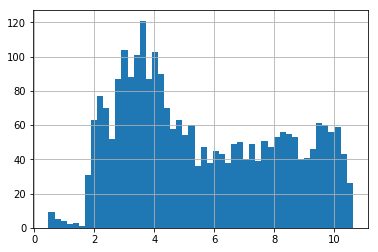


target 3 7.0496431738
30
0.029966614460575747 3.393731000355813 3.4132088770591014



target 4 11.4252837645
30
0.051763815828749754 5.494308048261086 5.531870048760187



target 5 16.5301977869
30
0.07404966620705071 7.952403702203395 8.006983418839582



target 6 9.723645757
30
0.046367501230764184 4.676020890146101 4.708253732283899



target 7 12.6407394841
30
0.058761922647997275 6.079669178607735 6.1206273391244945



target 8 16.5301977869
30
0.07808682201737442 7.956061038349514 8.014736500590809


In [ ]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [ ]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

In [ ]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)